In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np

In [2]:
%matplotlib notebook

/Users/user/anaconda3/lib/python3.5/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
import fnmatch
import os

In [4]:
twd = "/Users/user/Downloads/rpd acq/"

In [5]:
files = [twd + x for x in os.listdir(twd)][1:]
#print files

In [13]:
d = {}
for f in files:
    k = f.split('/')[-1].split('.')[0]
    sbjnum, date, ind = k.split("_")
    ts = np.array(pd.read_csv(f)['x'])
    d[k] = sbjnum, date, ind, len(ts), ts

In [14]:
data = d.values()

In [32]:
rpeaksdf = pd.DataFrame(list(data), columns=["sbjnum", "date", "ind", "length", "rpeaks"])

In [33]:
rpds = rpeaksdf[rpeaksdf.ind=="rpd"].sort(['sbjnum', 'date'])

/Users/user/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [34]:
acqs = rpeaksdf[rpeaksdf.ind=="acq"].sort(['sbjnum', 'date'])

/Users/user/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [35]:
rpds.head()

,sbjnum,date,ind,length,rpeaks
85,sbj001,20161114,rpd,5455,"[0.339, 1.038, 1.8375, 2.639, 3.388, 3.9965, 4..."
179,sbj002,20161114,rpd,5084,"[0.7585, 1.494, 2.279, 3.059, 3.819, 4.553, 5...."
141,sbj003,20161114,rpd,4952,"[0.3205, 1.034, 1.7235, 2.3895, 3.0505, 3.73, ..."
121,sbj004,20161108,rpd,4784,"[0.559, 1.347, 2.1955, 3.303, 4.2275, 5.2165, ..."
46,sbj004,20161115,rpd,4612,"[0.678, 1.6075, 2.506, 3.4715, 4.2745, 5.039, ..."


In [36]:
acqs.head()

,sbjnum,date,ind,length,rpeaks
171,sbj001,20161114,acq,5424,"[7.855, 8.375, 8.96, 9.85, 10.715, 11.385, 12...."
29,sbj002,20161114,acq,5078,"[7.665, 8.15, 8.345, 9.05, 9.71, 10.4, 11.225,..."
108,sbj003,20161114,acq,4940,"[7.835, 8.535, 9.33, 10.175, 11.025, 11.86, 12..."
167,sbj004,20161108,acq,4772,"[8.025, 8.805, 9.6, 10.4, 11.19, 12.005, 12.84..."
142,sbj004,20161115,acq,4586,"[7.915, 8.74, 9.625, 10.58, 11.595, 12.6, 13.4..."


In [37]:
(5321.8131868131868, 5311.6483516483513)

(5321.813186813187, 5311.648351648351)

In [38]:
acqs.length.mean(), rpds.length.mean()

(5321.8131868131868, 5311.6483516483513)

In [39]:
(929.67050210859247, 893.90014820978456)

(929.6705021085925, 893.9001482097846)

In [44]:
acqs.length.std(), rpds.length.std()

(929.67050210859247, 893.90014820978456)

<IPython.core.display.Javascript object>


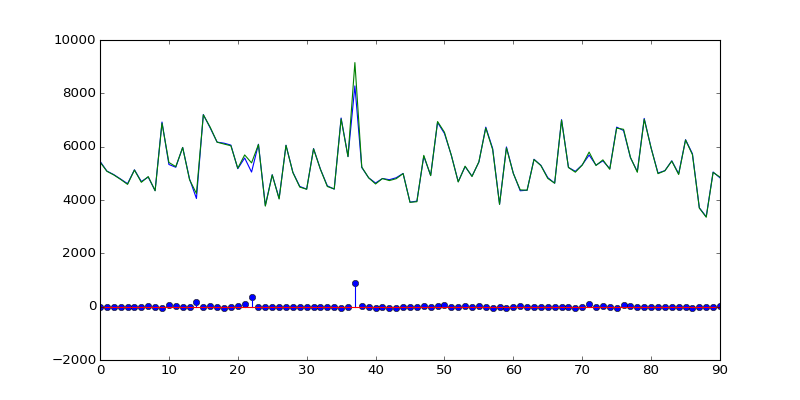

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(91), rpds.length, np.arange(91),acqs.length)
plt.show()

In [51]:
diff = np.array(acqs.length.astype(float)) - np.array(rpds.length.astype(float))

In [52]:
diff.mean(), diff.std()

(10.164835164835164, 103.99949954827434)

In [53]:
sum(diff>0), sum(diff<0), sum(diff==0)

(23, 67, 1)

<IPython.core.display.Javascript object>


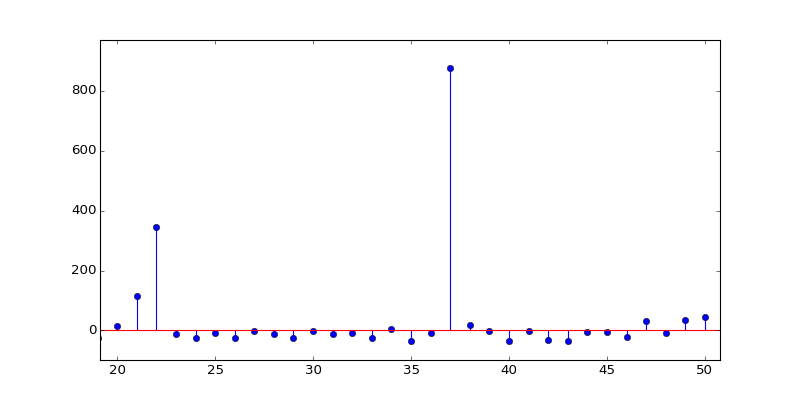

<Container object of 3 artists>

In [66]:
plt.figure(figsize=(10, 5))
plt.stem(np.arange(len(diff)),diff)

In [67]:
rpds.head()

,sbjnum,date,ind,length,rpeaks,new_rpeaks
85,sbj001,20161114,rpd,5455,"[0.339, 1.038, 1.8375, 2.639, 3.388, 3.9965, 4...","[8.391, 8.9685, 9.8555, 10.721, 11.395, 12.121..."
179,sbj002,20161114,rpd,5084,"[0.7585, 1.494, 2.279, 3.059, 3.819, 4.553, 5....","[8.3695, 9.067, 9.7275, 10.402, 11.2305, 12.03..."
141,sbj003,20161114,rpd,4952,"[0.3205, 1.034, 1.7235, 2.3895, 3.0505, 3.73, ...","[8.553, 9.339, 10.193, 11.044, 11.878, 12.685,..."
121,sbj004,20161108,rpd,4784,"[0.559, 1.347, 2.1955, 3.303, 4.2275, 5.2165, ...","[8.0065, 8.8095, 9.6145, 10.414, 11.201, 12.02..."
46,sbj004,20161115,rpd,4612,"[0.678, 1.6075, 2.506, 3.4715, 4.2745, 5.039, ...","[8.741, 9.631, 10.5845, 11.5975, 12.6, 13.4565..."


In [68]:
s = rpds[0:1].rpeaks#> 8

In [69]:
rpds.rpeaks[0][rpds.rpeaks[0]>8]

array([    8.262 ,     8.819 ,     9.3685, ...,  3959.615 ,  3960.208 ,
        3960.8195])

In [70]:
rpds["new_rpeaks"] = rpds["rpeaks"].apply(lambda x: x[x>8])

In [71]:
rpds.head()

,sbjnum,date,ind,length,rpeaks,new_rpeaks
85,sbj001,20161114,rpd,5455,"[0.339, 1.038, 1.8375, 2.639, 3.388, 3.9965, 4...","[8.391, 8.9685, 9.8555, 10.721, 11.395, 12.121..."
179,sbj002,20161114,rpd,5084,"[0.7585, 1.494, 2.279, 3.059, 3.819, 4.553, 5....","[8.3695, 9.067, 9.7275, 10.402, 11.2305, 12.03..."
141,sbj003,20161114,rpd,4952,"[0.3205, 1.034, 1.7235, 2.3895, 3.0505, 3.73, ...","[8.553, 9.339, 10.193, 11.044, 11.878, 12.685,..."
121,sbj004,20161108,rpd,4784,"[0.559, 1.347, 2.1955, 3.303, 4.2275, 5.2165, ...","[8.0065, 8.8095, 9.6145, 10.414, 11.201, 12.02..."
46,sbj004,20161115,rpd,4612,"[0.678, 1.6075, 2.506, 3.4715, 4.2745, 5.039, ...","[8.741, 9.631, 10.5845, 11.5975, 12.6, 13.4565..."


In [72]:
acqs.head()

,sbjnum,date,ind,length,rpeaks,new_rpeaks
171,sbj001,20161114,acq,5424,"[7.855, 8.375, 8.96, 9.85, 10.715, 11.385, 12....","[8.375, 8.96, 9.85, 10.715, 11.385, 12.115, 12..."
29,sbj002,20161114,acq,5078,"[7.665, 8.15, 8.345, 9.05, 9.71, 10.4, 11.225,...","[8.15, 8.345, 9.05, 9.71, 10.4, 11.225, 12.06,..."
108,sbj003,20161114,acq,4940,"[7.835, 8.535, 9.33, 10.175, 11.025, 11.86, 12...","[8.535, 9.33, 10.175, 11.025, 11.86, 12.665, 1..."
167,sbj004,20161108,acq,4772,"[8.025, 8.805, 9.6, 10.4, 11.19, 12.005, 12.84...","[8.025, 8.805, 9.6, 10.4, 11.19, 12.005, 12.84..."
142,sbj004,20161115,acq,4586,"[7.915, 8.74, 9.625, 10.58, 11.595, 12.6, 13.4...","[8.74, 9.625, 10.58, 11.595, 12.6, 13.455, 14...."


In [73]:
acqs["new_rpeaks"] = acqs["rpeaks"].apply(lambda x: x[x>8])

In [74]:
acqs.head()

,sbjnum,date,ind,length,rpeaks,new_rpeaks
171,sbj001,20161114,acq,5424,"[7.855, 8.375, 8.96, 9.85, 10.715, 11.385, 12....","[8.375, 8.96, 9.85, 10.715, 11.385, 12.115, 12..."
29,sbj002,20161114,acq,5078,"[7.665, 8.15, 8.345, 9.05, 9.71, 10.4, 11.225,...","[8.15, 8.345, 9.05, 9.71, 10.4, 11.225, 12.06,..."
108,sbj003,20161114,acq,4940,"[7.835, 8.535, 9.33, 10.175, 11.025, 11.86, 12...","[8.535, 9.33, 10.175, 11.025, 11.86, 12.665, 1..."
167,sbj004,20161108,acq,4772,"[8.025, 8.805, 9.6, 10.4, 11.19, 12.005, 12.84...","[8.025, 8.805, 9.6, 10.4, 11.19, 12.005, 12.84..."
142,sbj004,20161115,acq,4586,"[7.915, 8.74, 9.625, 10.58, 11.595, 12.6, 13.4...","[8.74, 9.625, 10.58, 11.595, 12.6, 13.455, 14...."


### Graph per subj_date

In [75]:
sbjnum = "sbj004"
date = "20161115"
n = 200

In [76]:
r=rpds[(rpds["sbjnum"]==sbjnum) & (rpds["date"]==date)]
a=acqs[(acqs["sbjnum"]==sbjnum) & (acqs["date"]==date)]

4603 4585


<IPython.core.display.Javascript object>


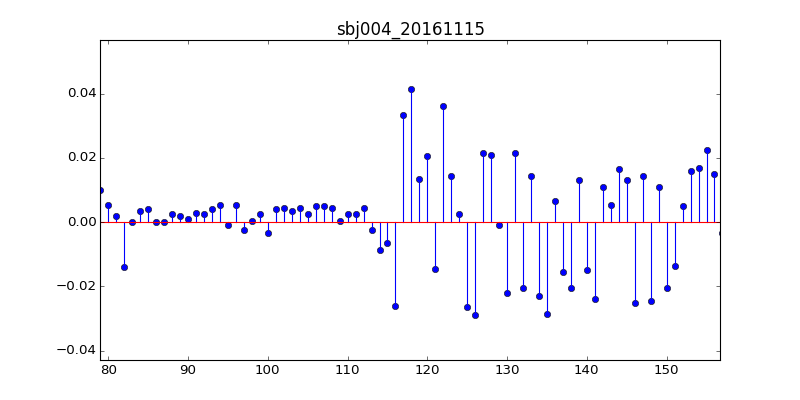

<Container object of 3 artists>

In [80]:
print (len(r.values[0][5]), len(a.values[0][5]))
diff = r.values[0][5][:n] - a.values[0][5][:n]
#different lengths
plt.figure(figsize=(10, 5))
plt.title(sbjnum+ "_" +date, size=15)
plt.stem(np.arange(len(diff)),diff)

In [81]:
sd  = np.array(zip(rpds.sbjnum, rpds.date))
n = 200

#### ALL GRAPHS

In [219]:
def showit(s, d, n=100):
    
    sbjnum = s
    date = d
    
    r=rpds[(rpds["sbjnum"]==sbjnum) & (rpds["date"]==date)]
    a=acqs[(acqs["sbjnum"]==sbjnum) & (acqs["date"]==date)]
    
    l = str(len(r.values[0][5])) +","+str (len(a.values[0][5]))
    diff = r.values[0][5][:n] - a.values[0][5][:n]
    #different lengths
    plt.figure(figsize=(30, 9))
    plt.ylim([-1,1])
    plt.title(sbjnum+ "_" +date +" of "+ l, size=20)
    plt.bar(np.arange(len(diff)),diff, color = "#73C6B6")
    plt.show()

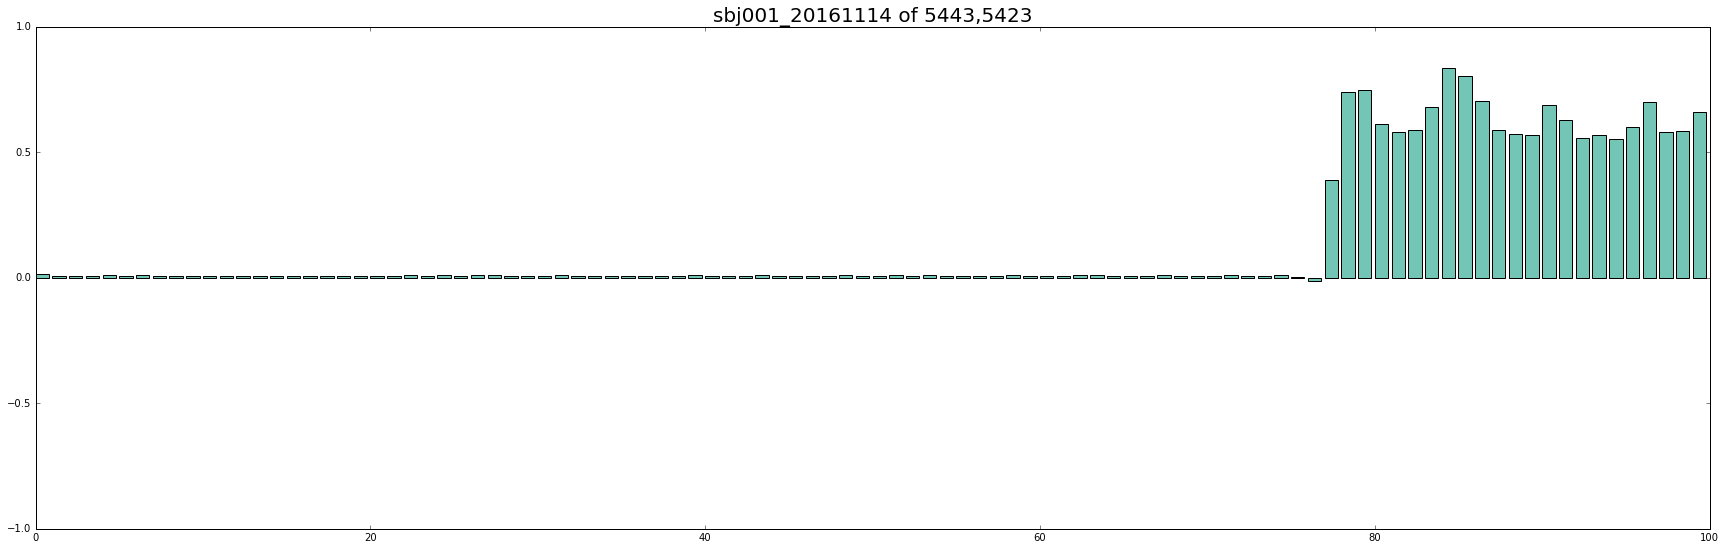

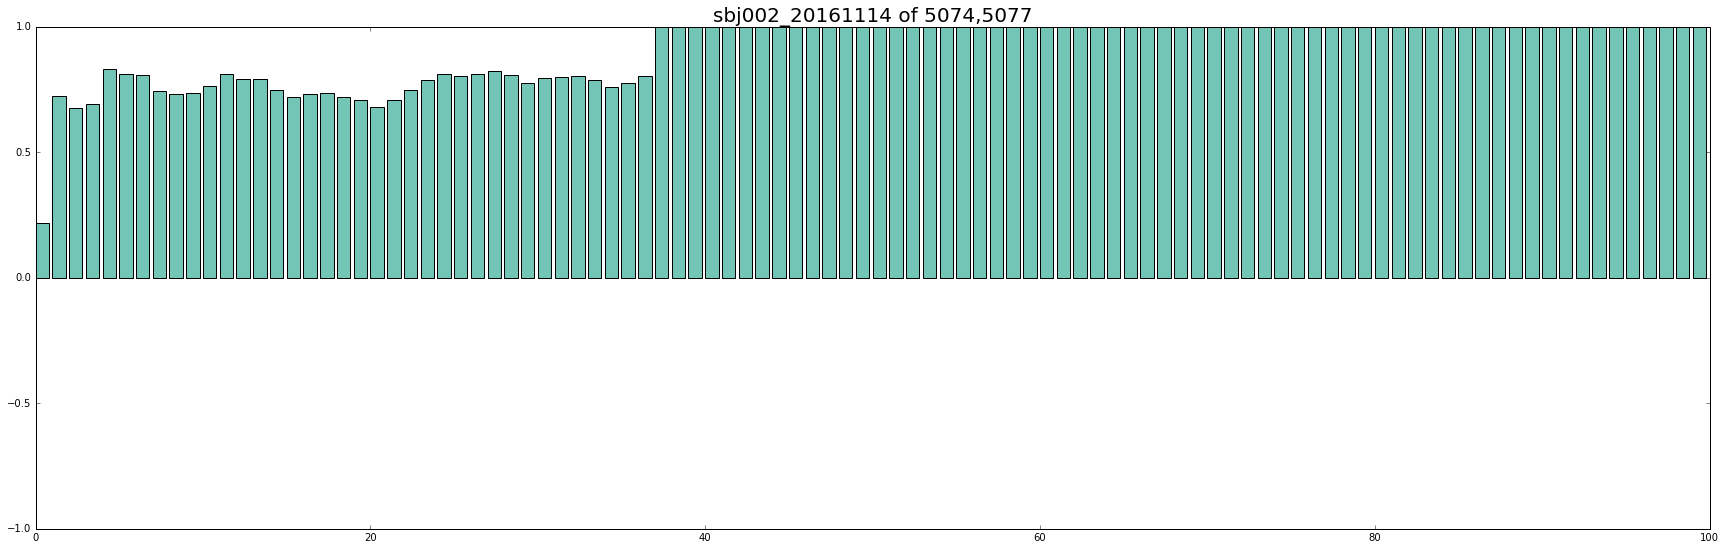

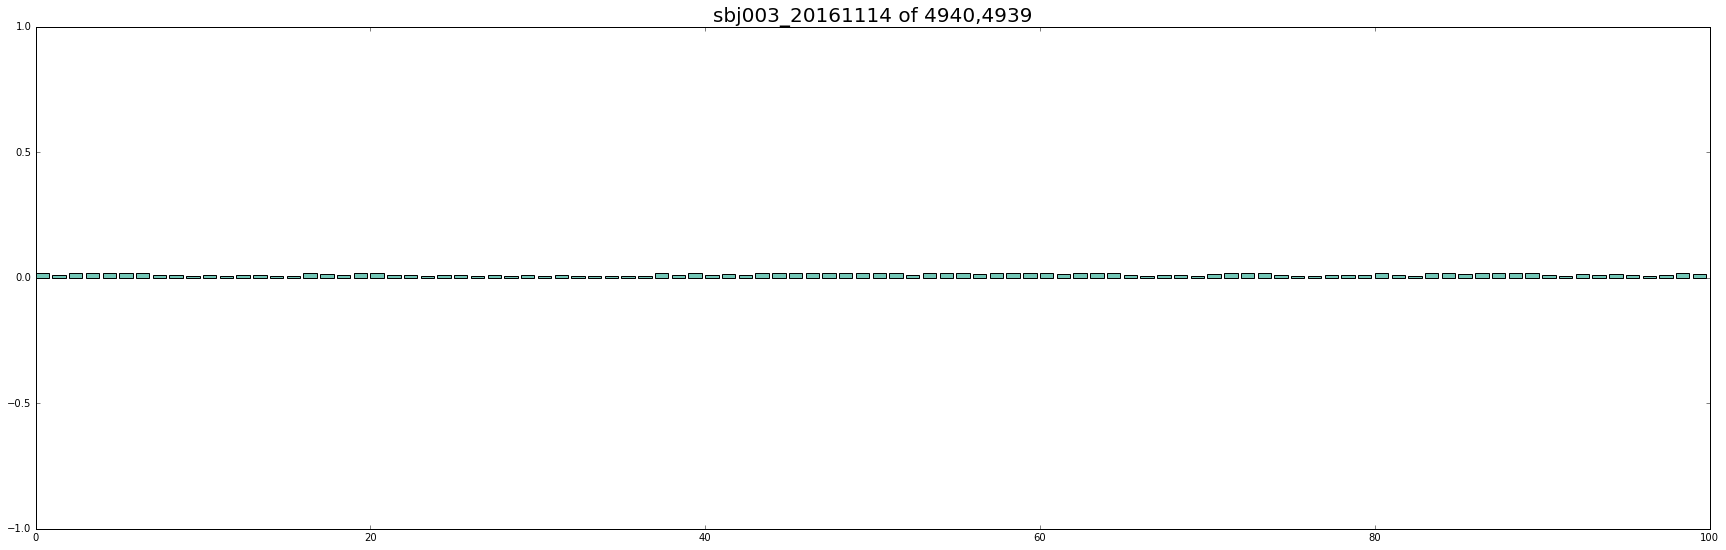

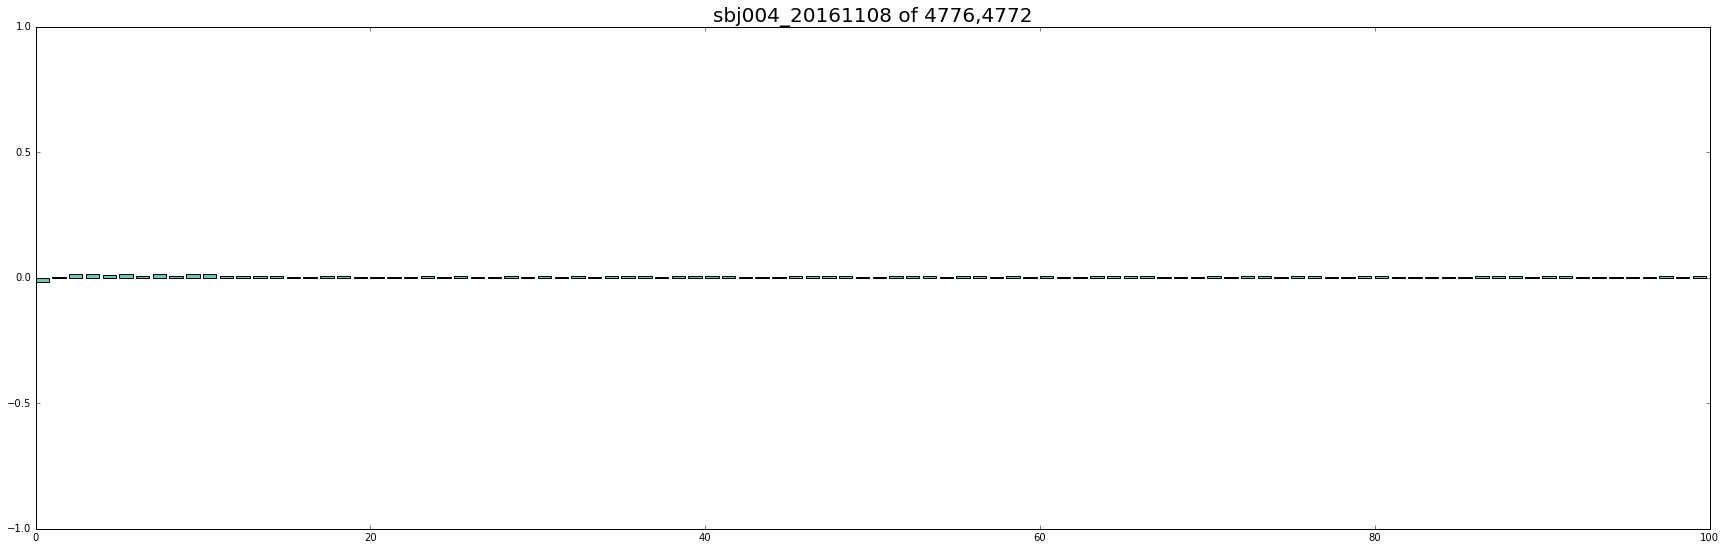

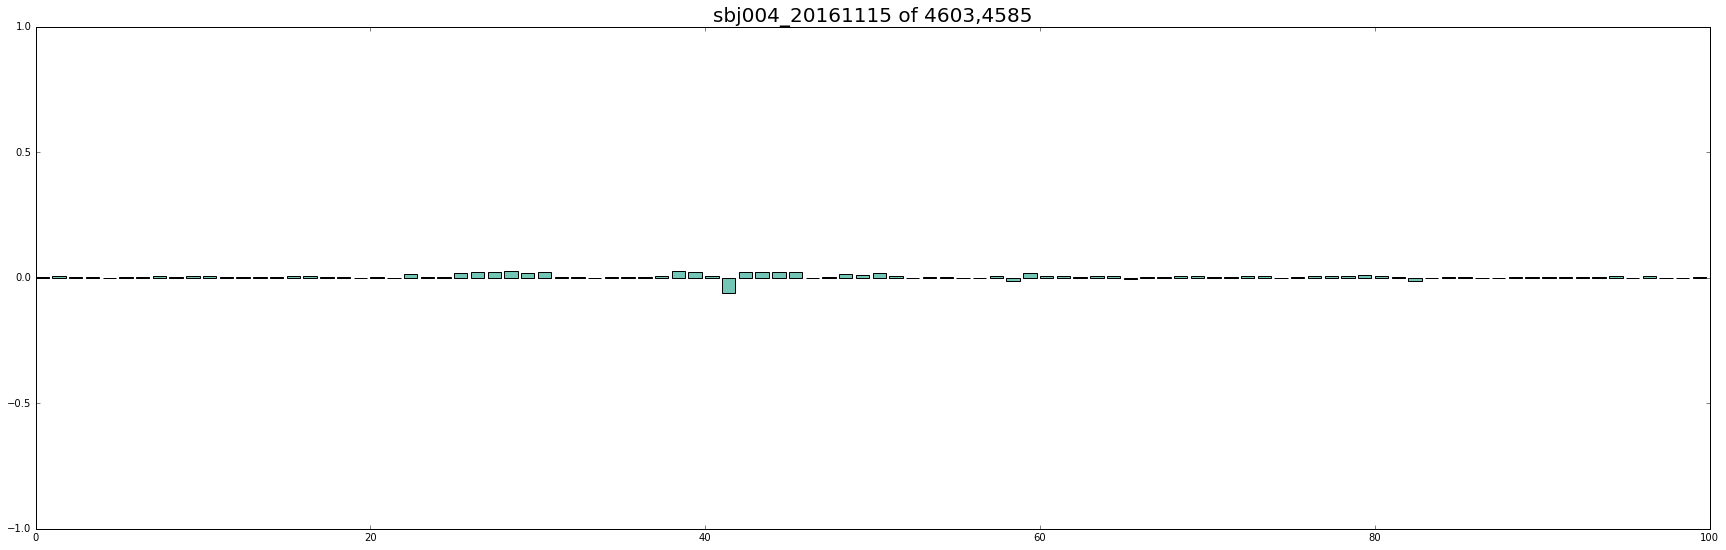

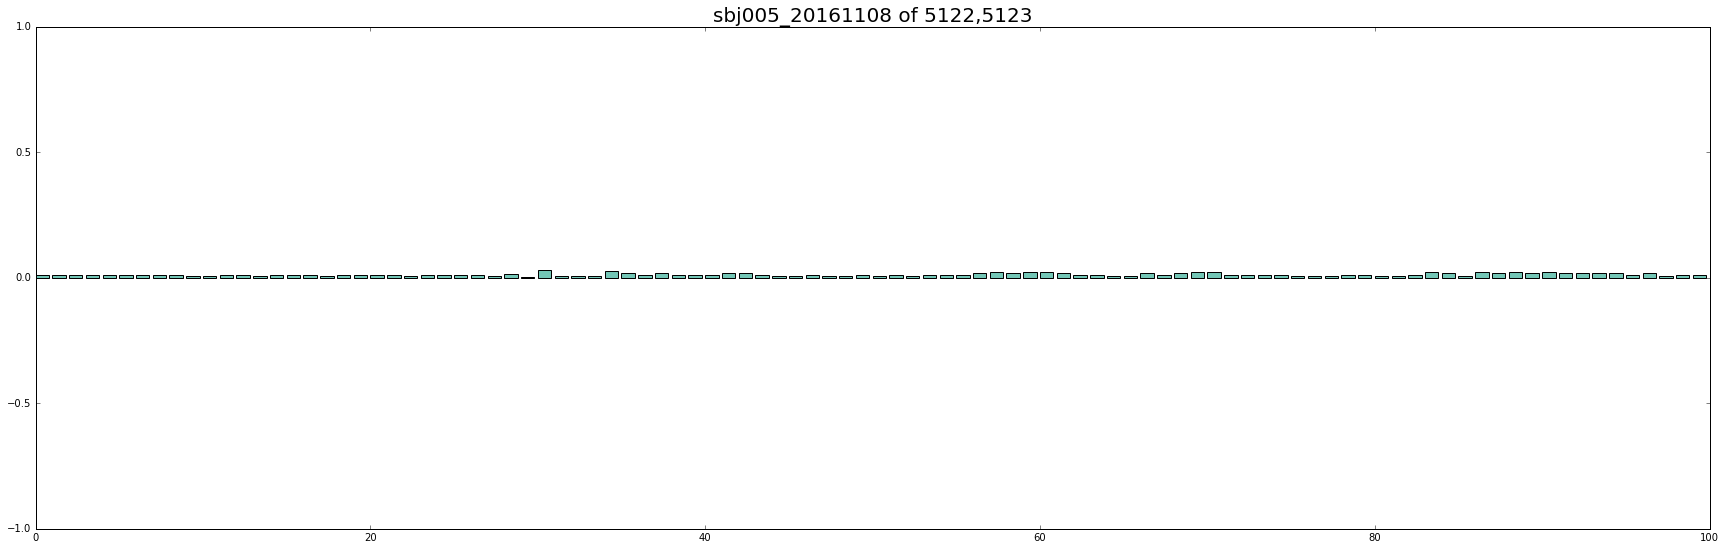

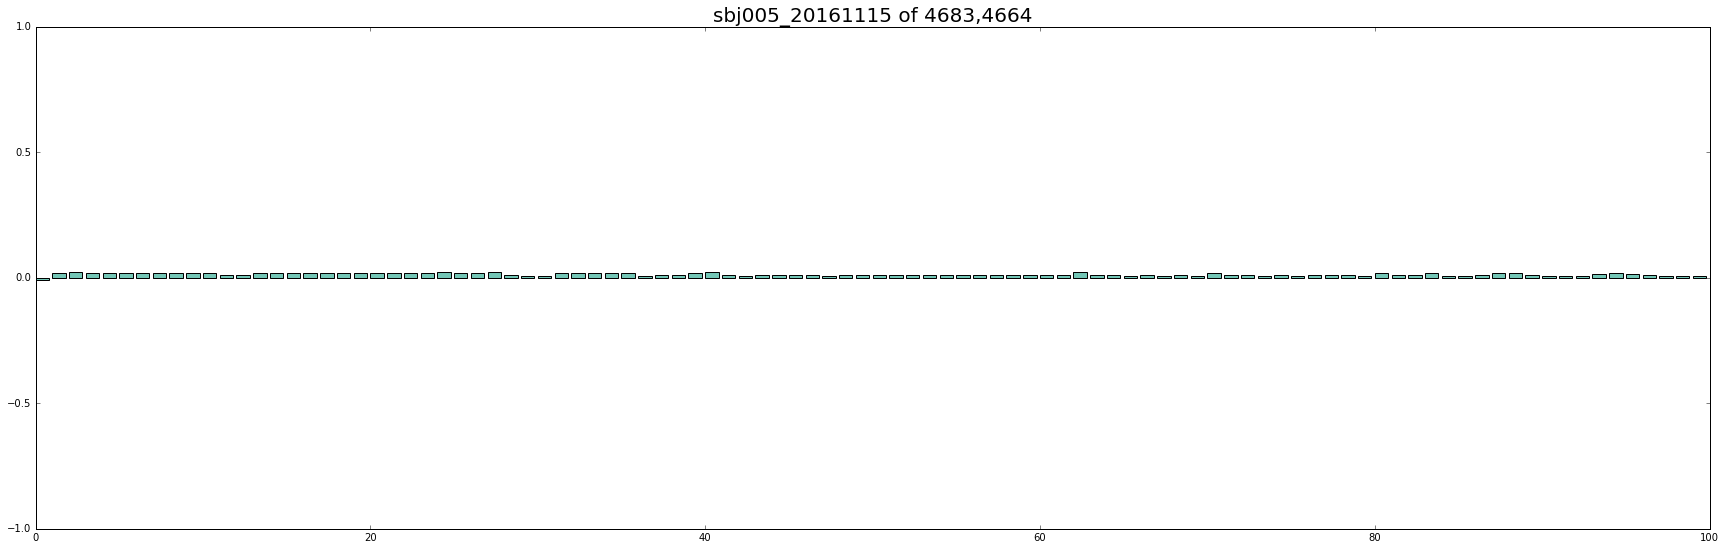

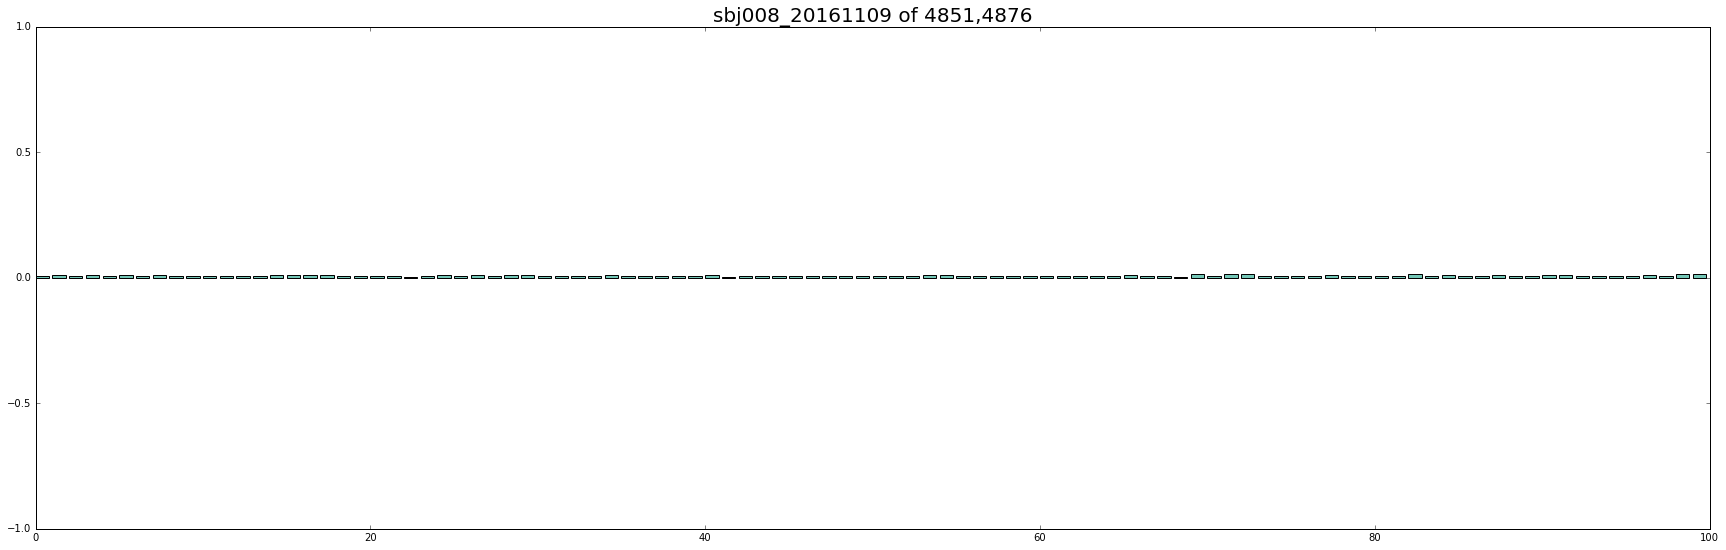

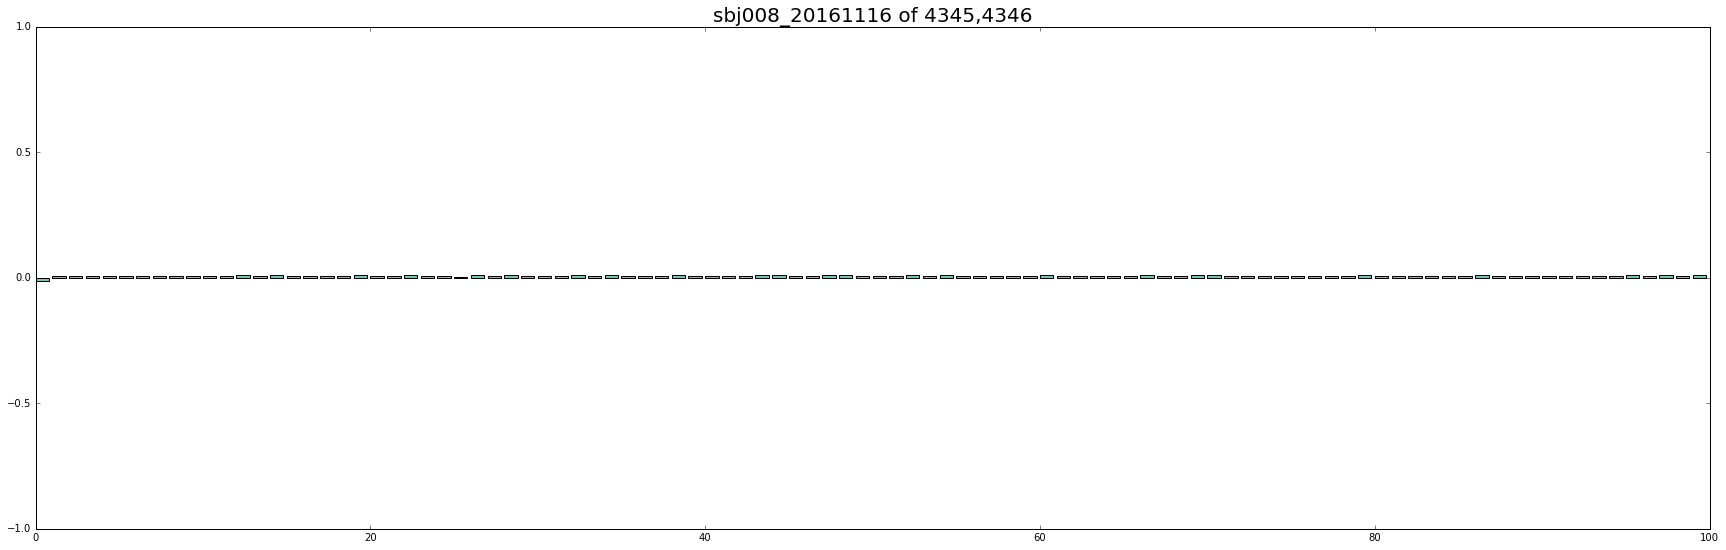

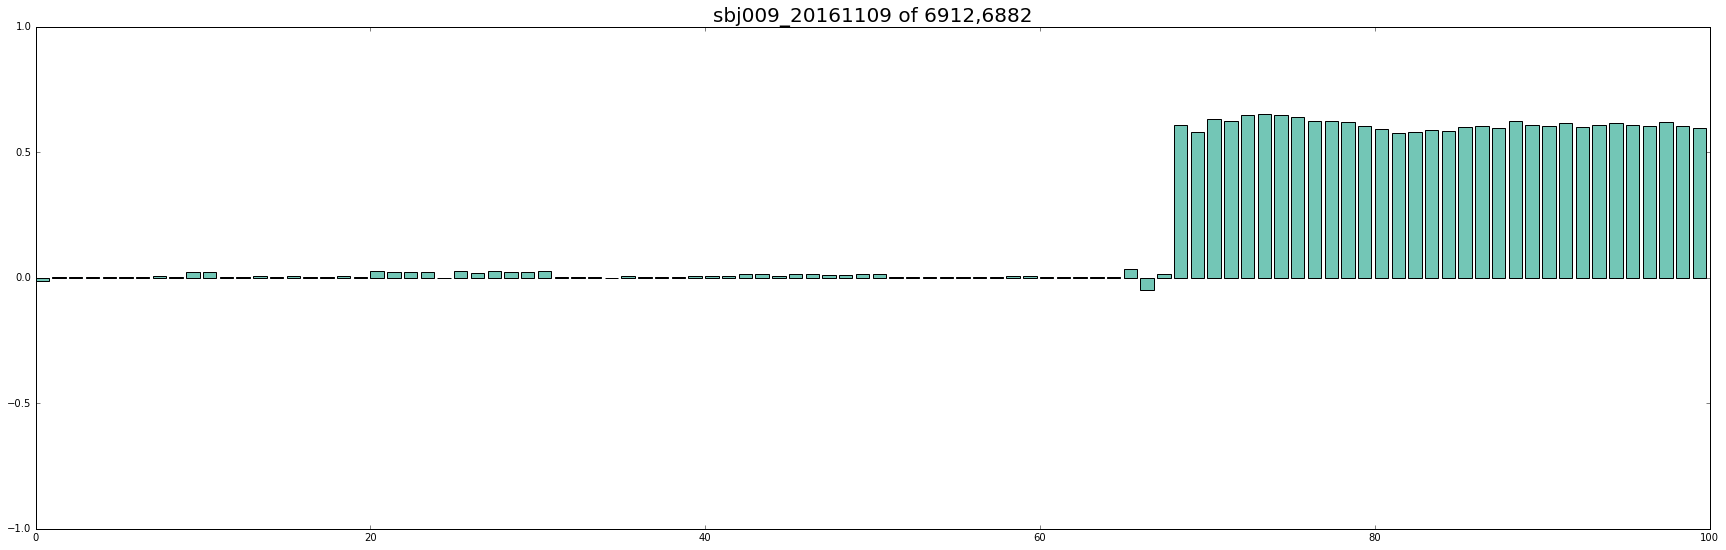

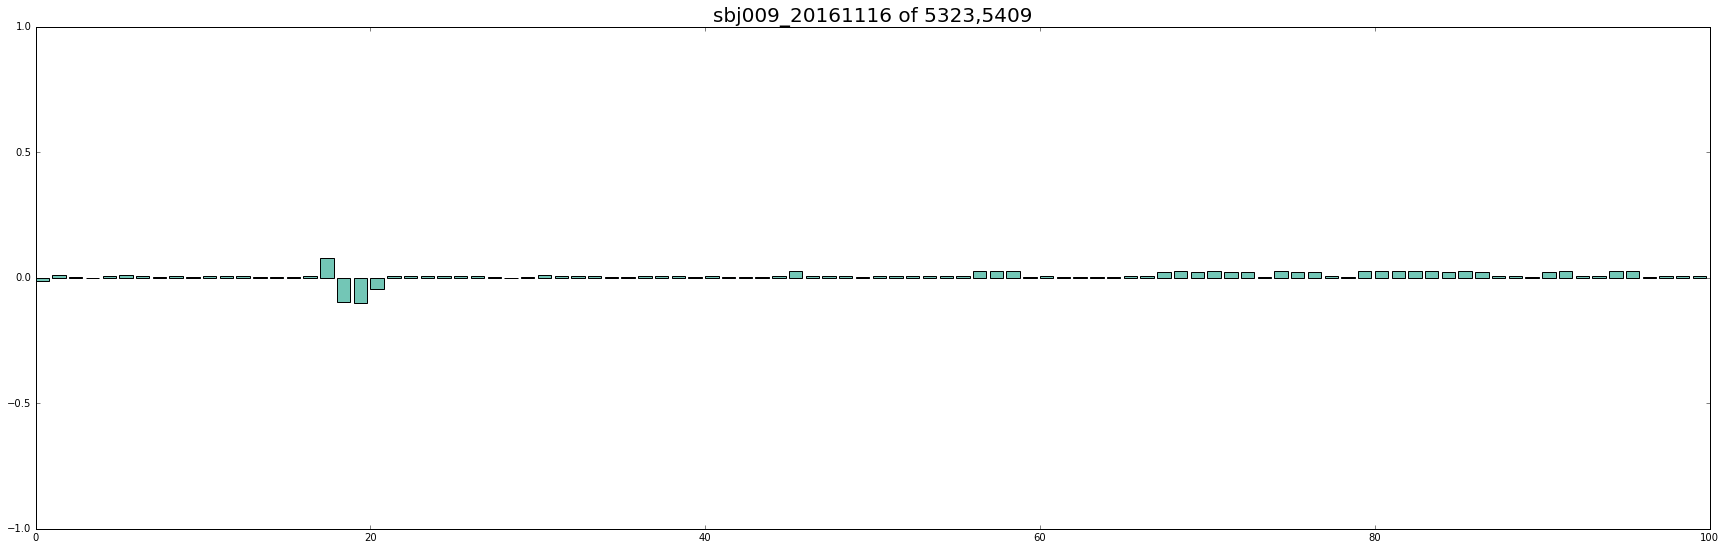

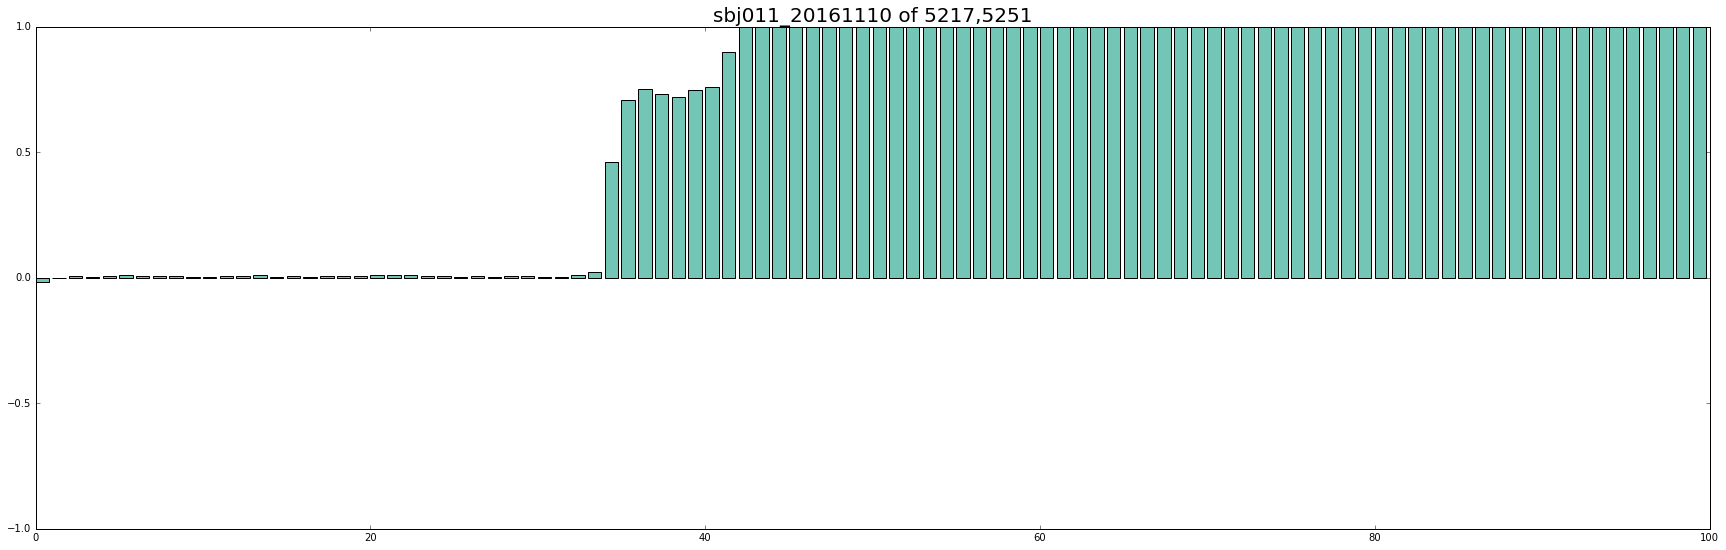

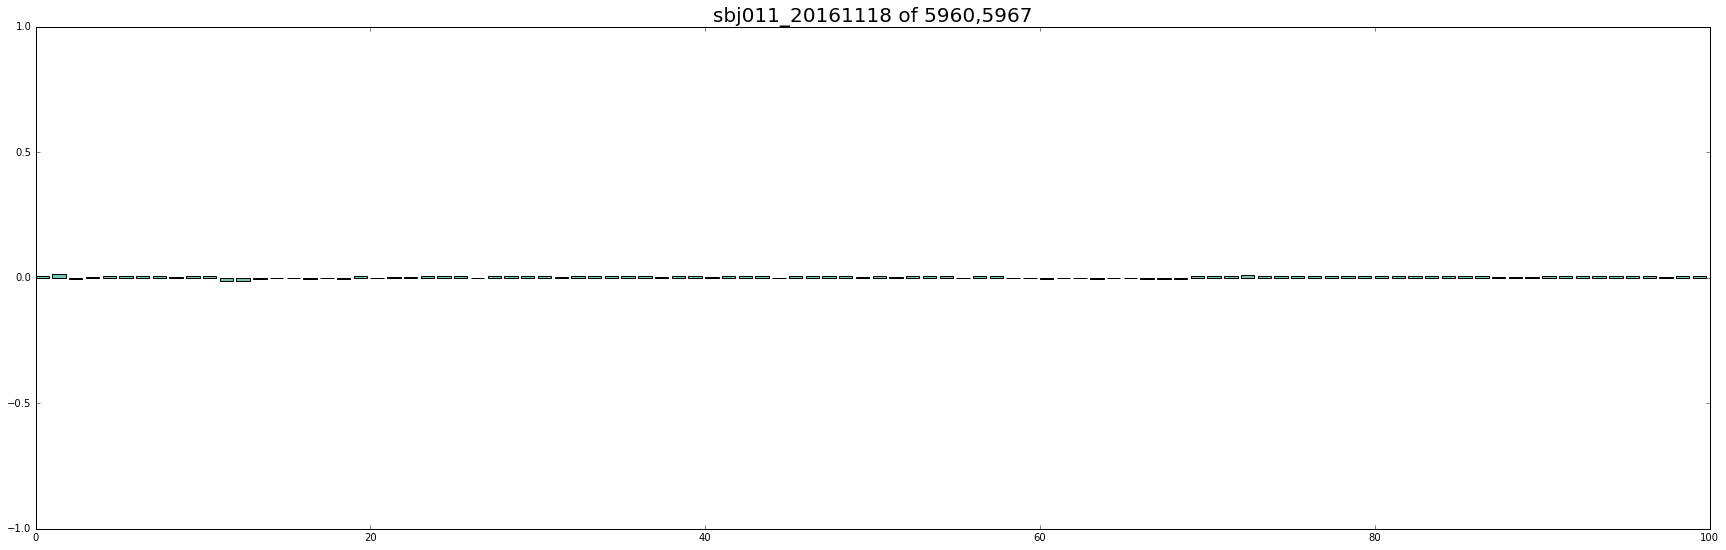

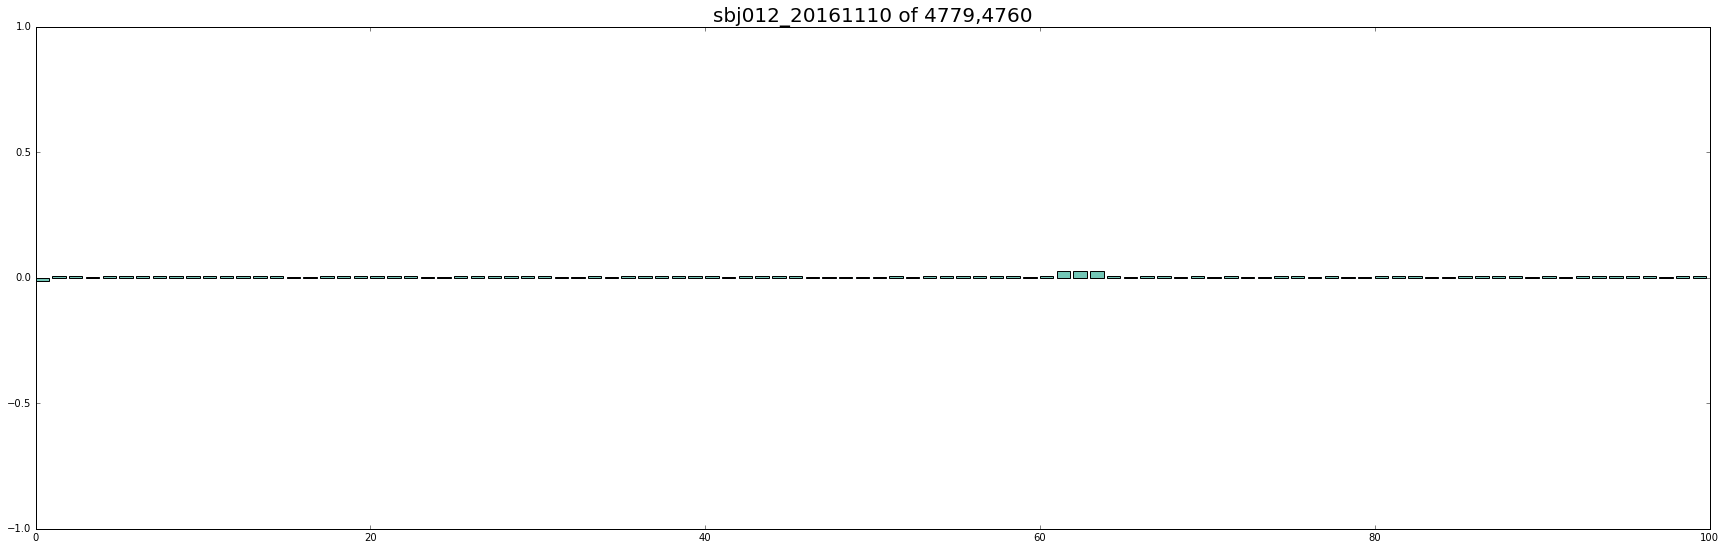

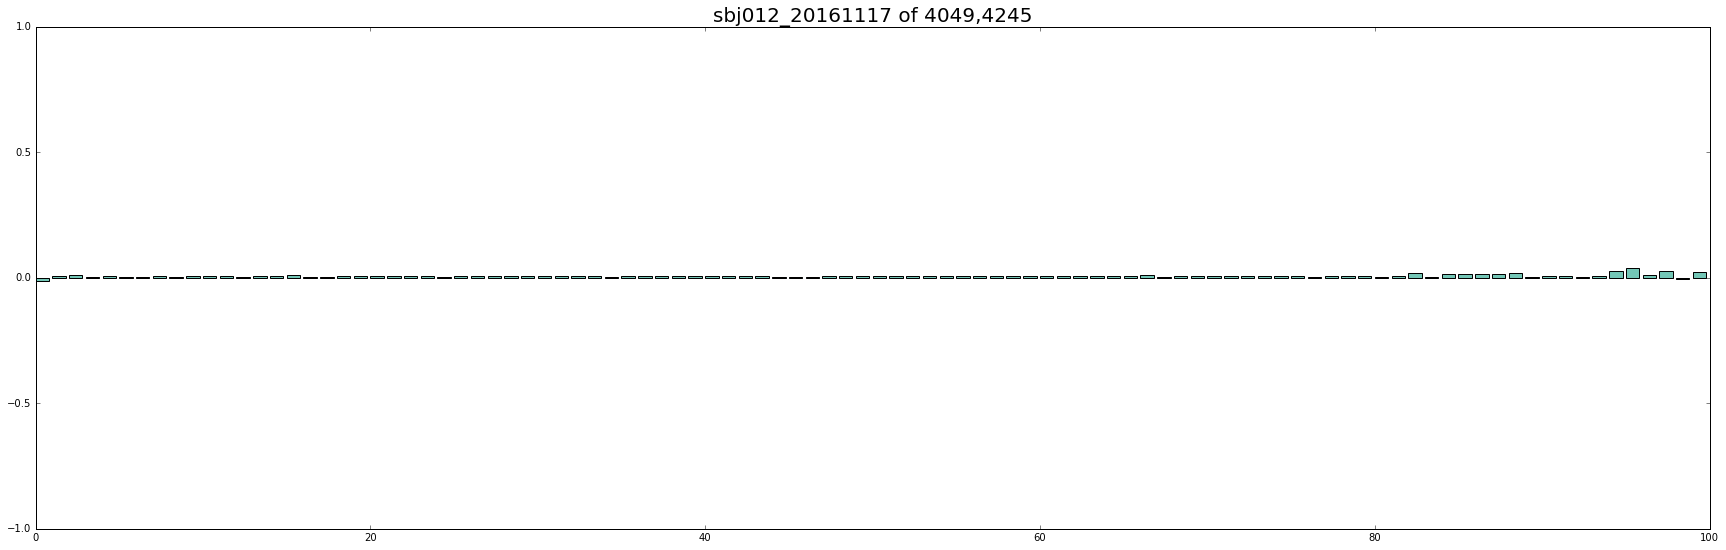

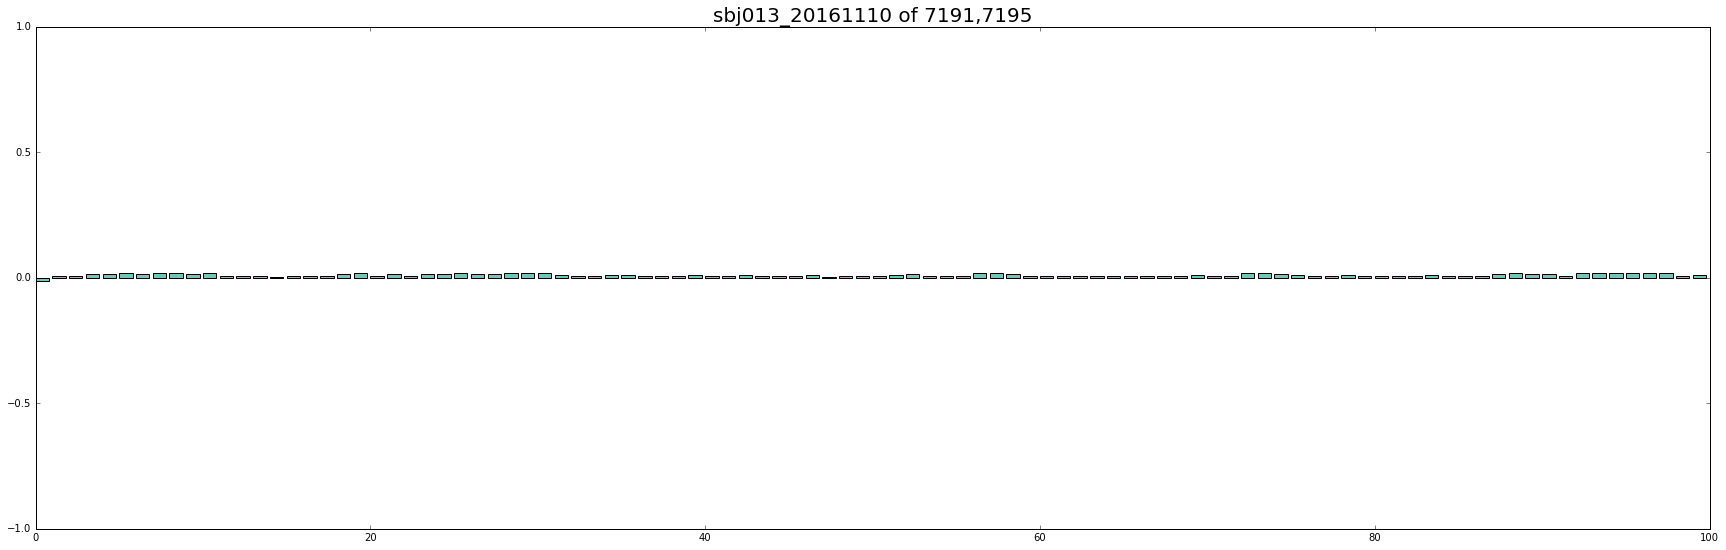

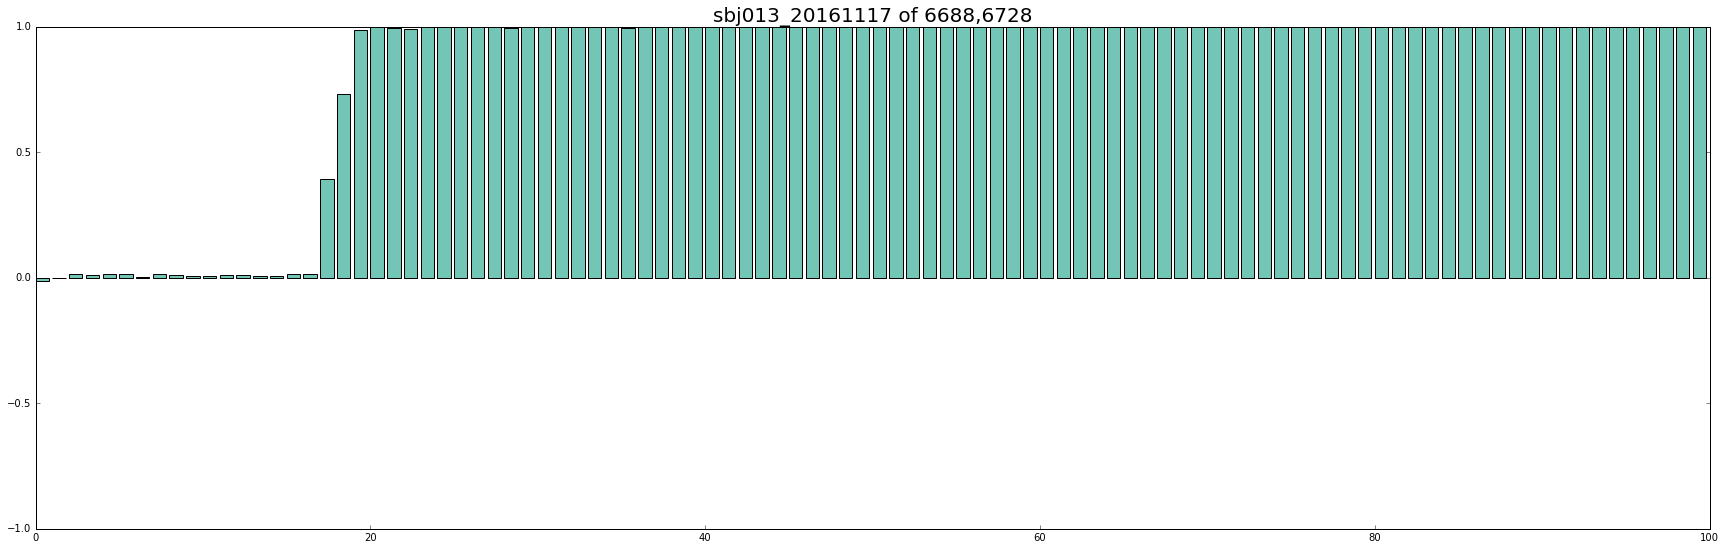

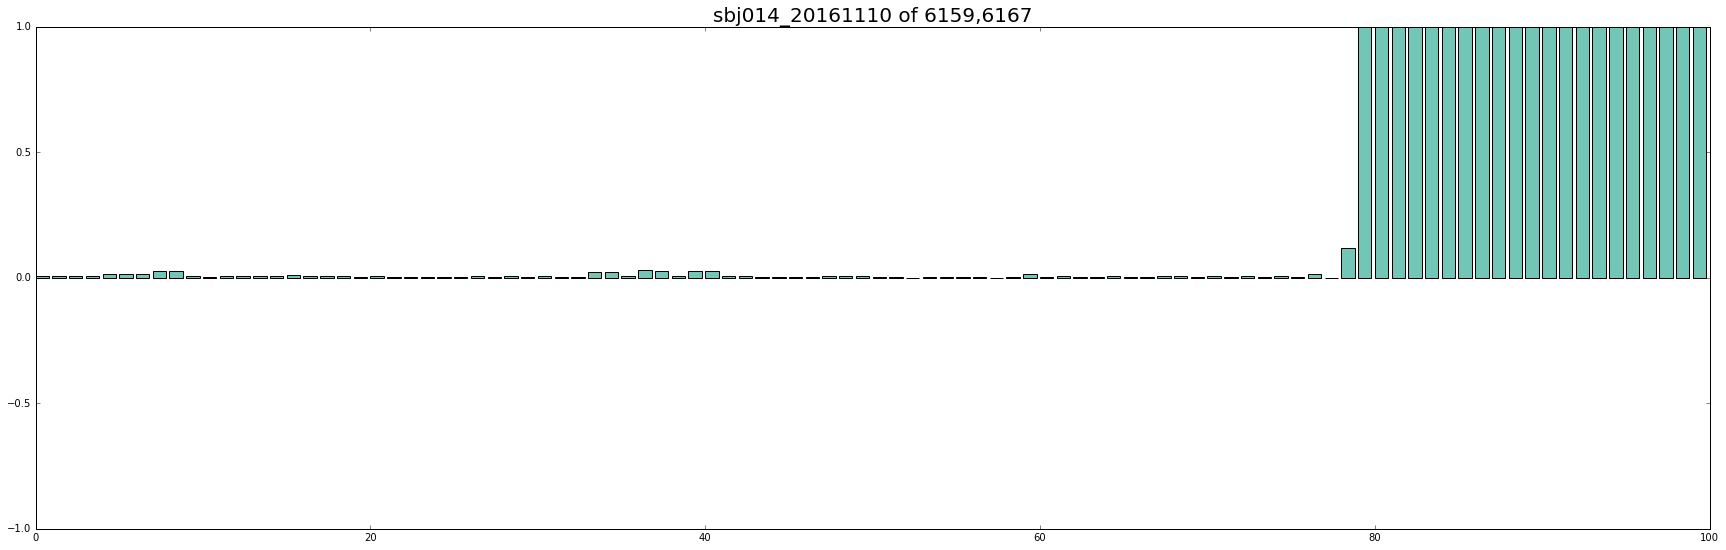

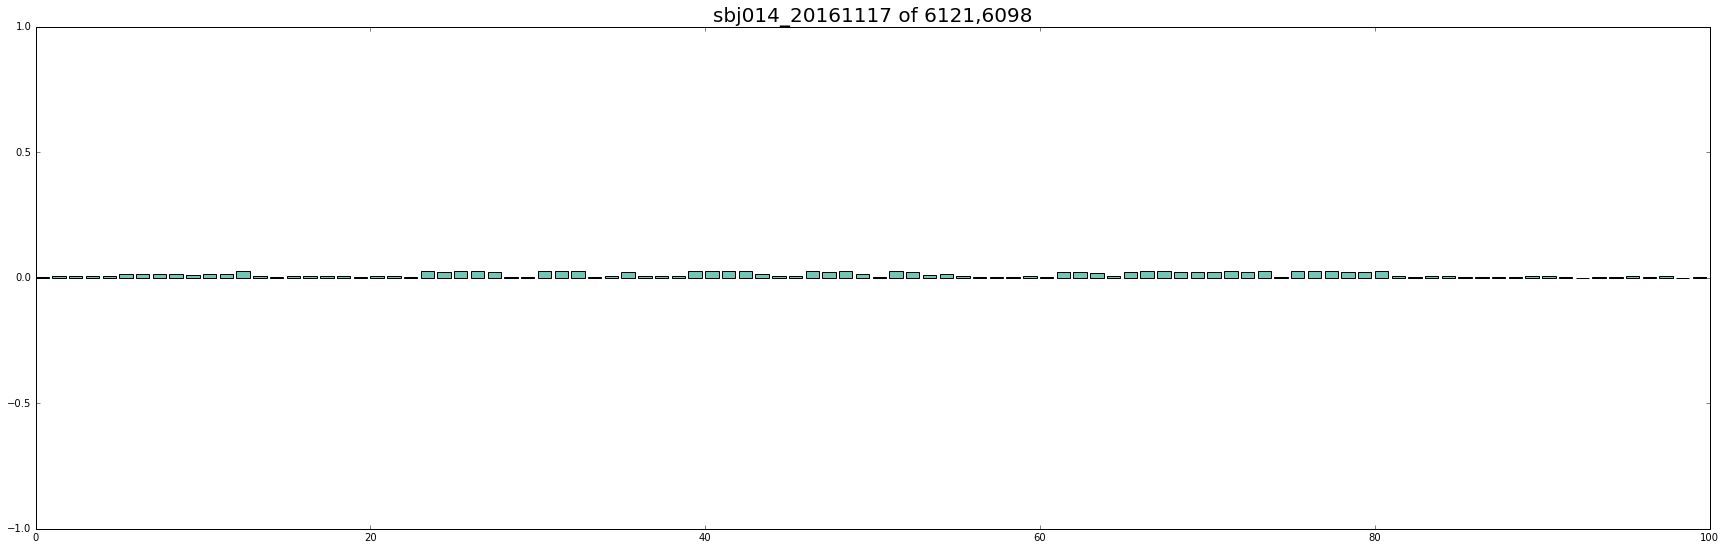

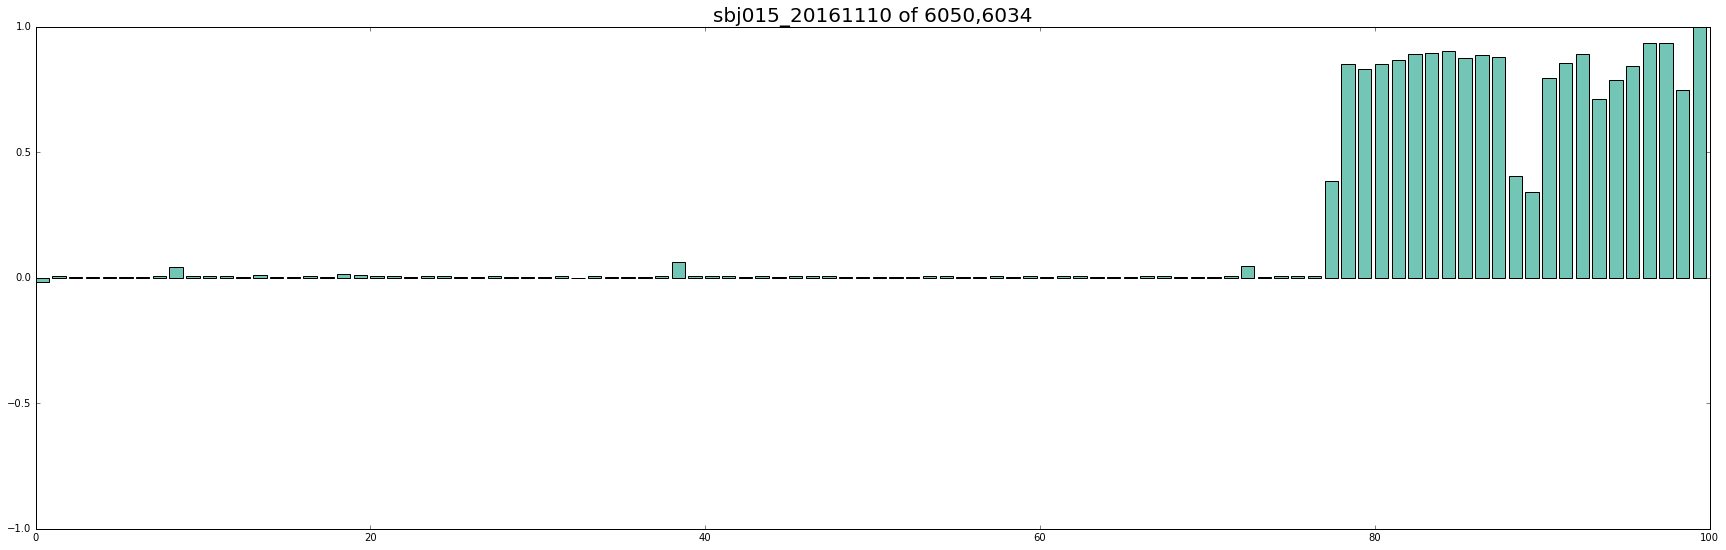

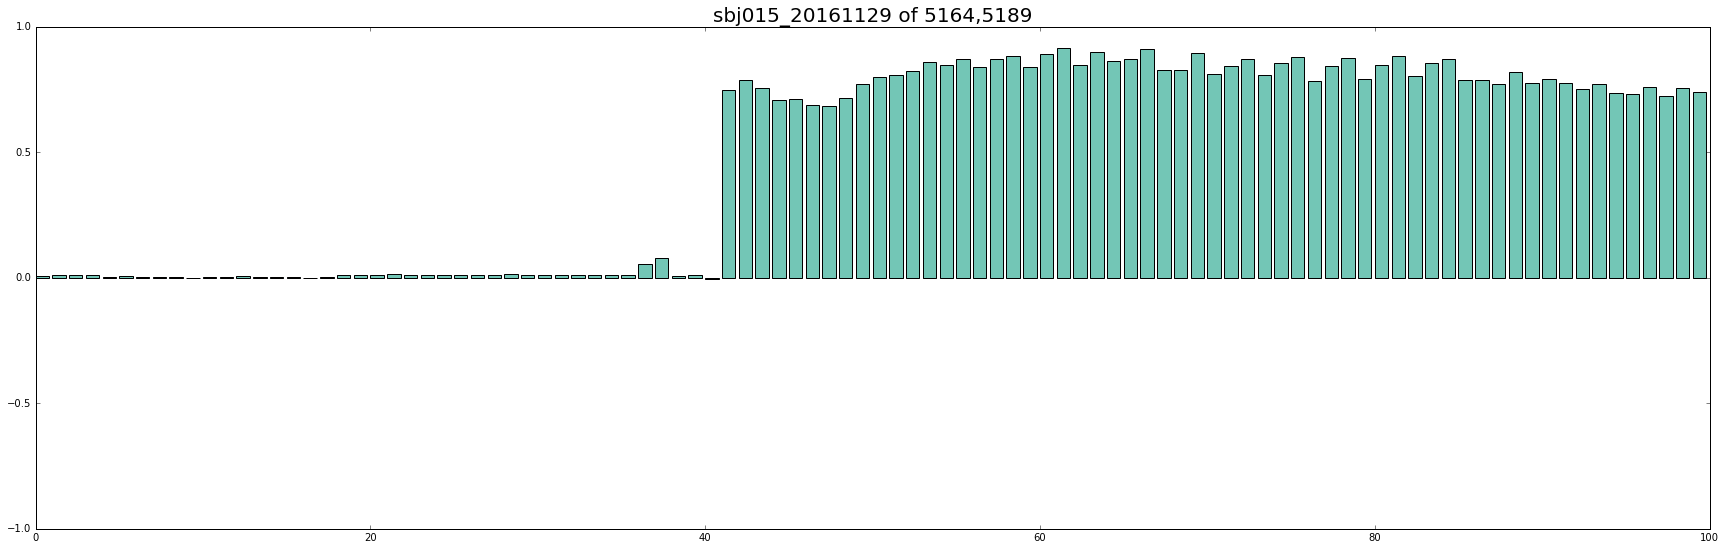

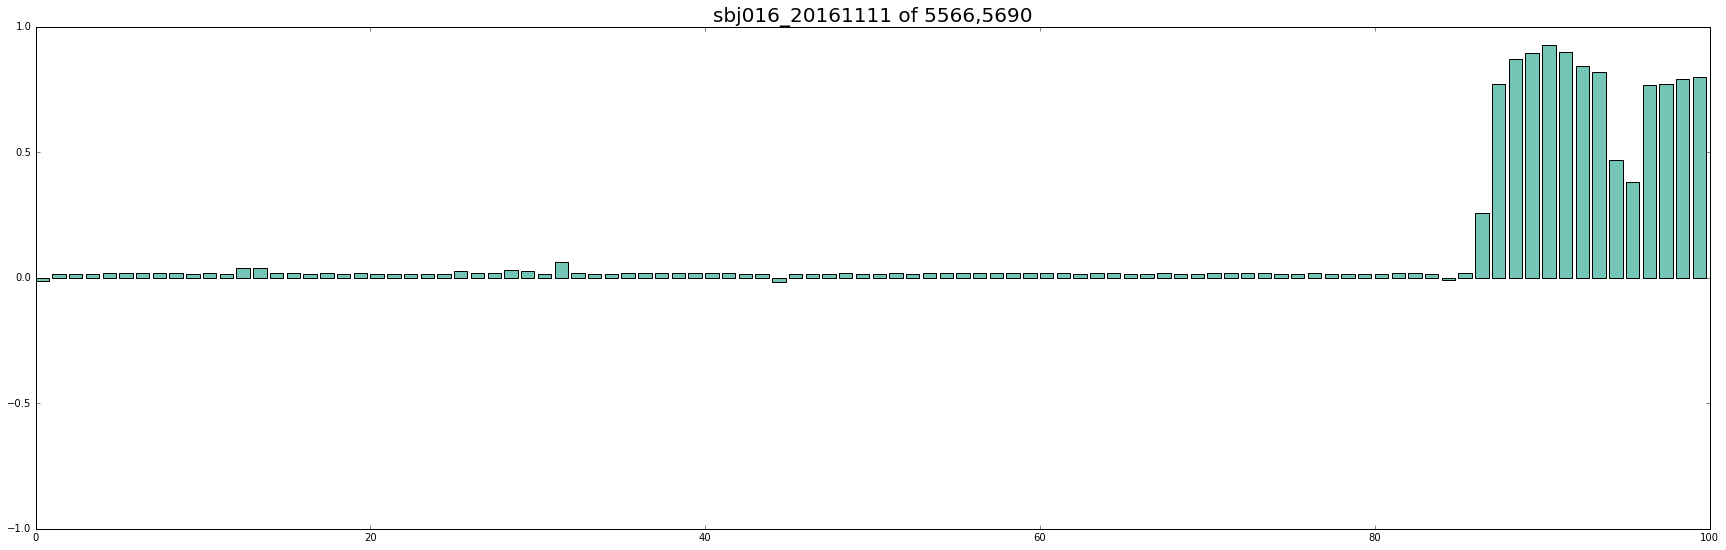

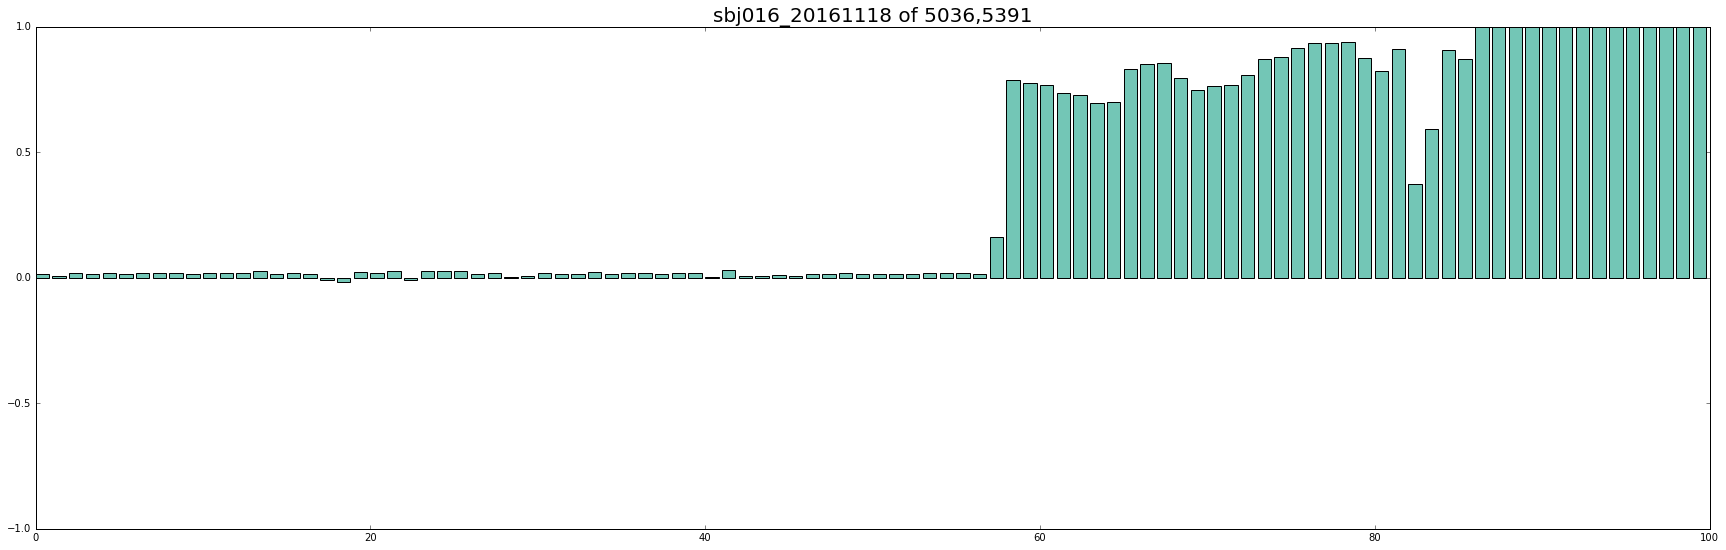

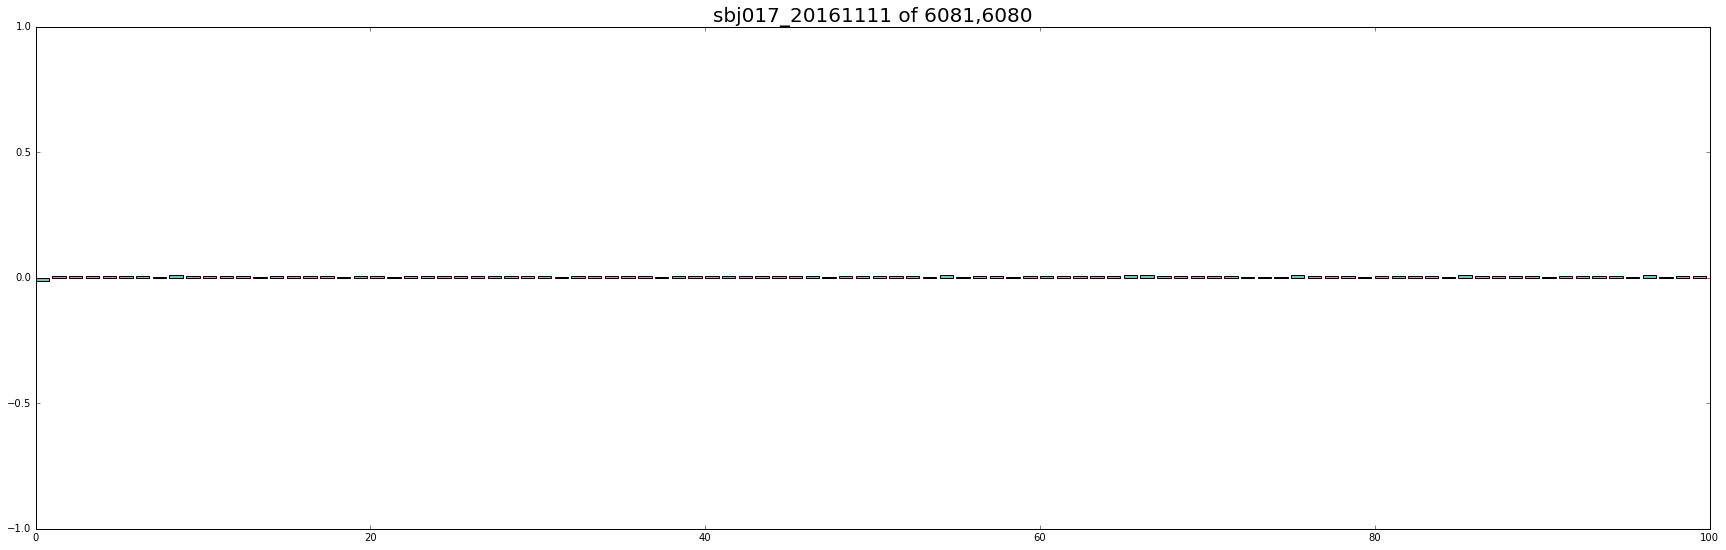

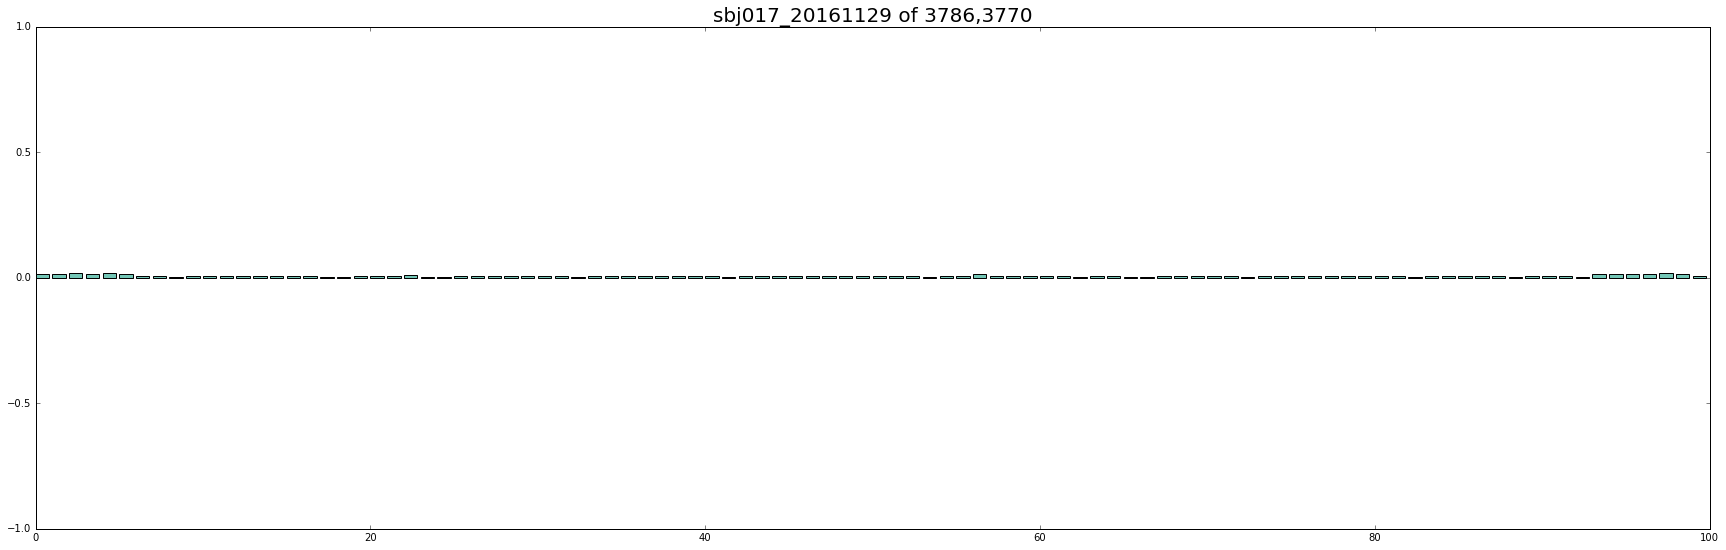

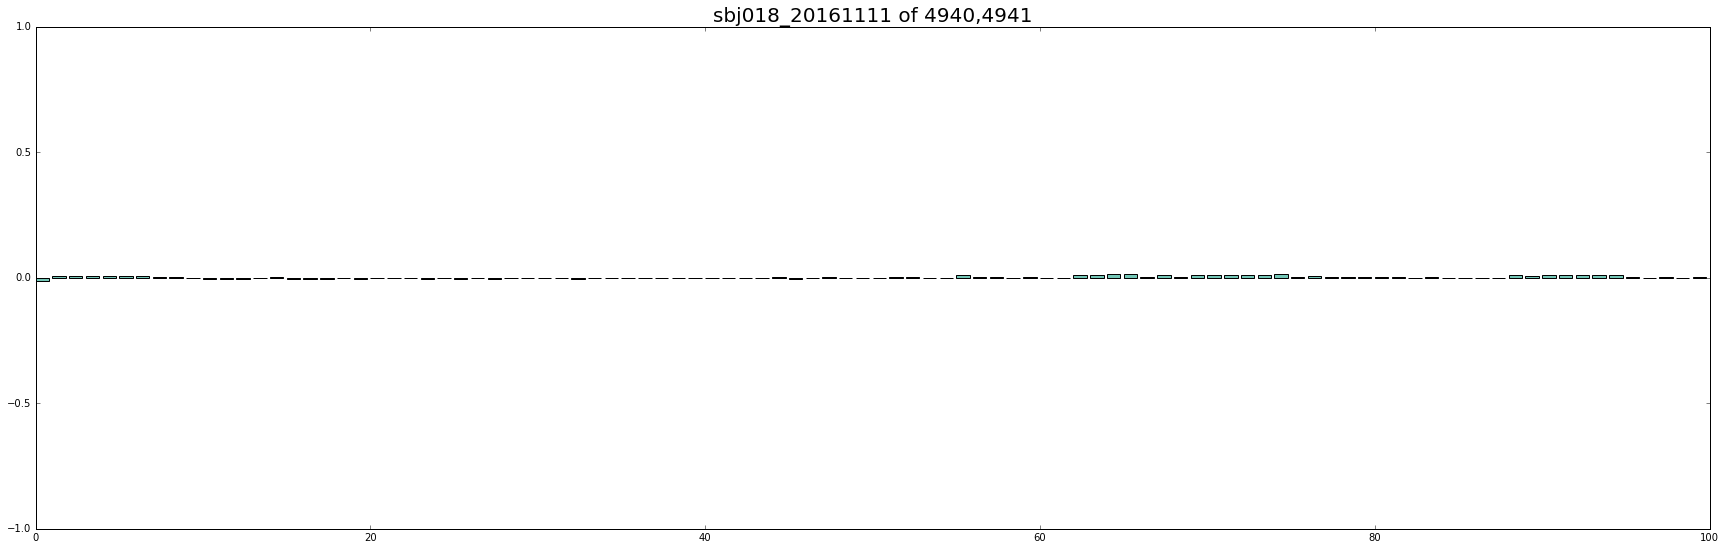

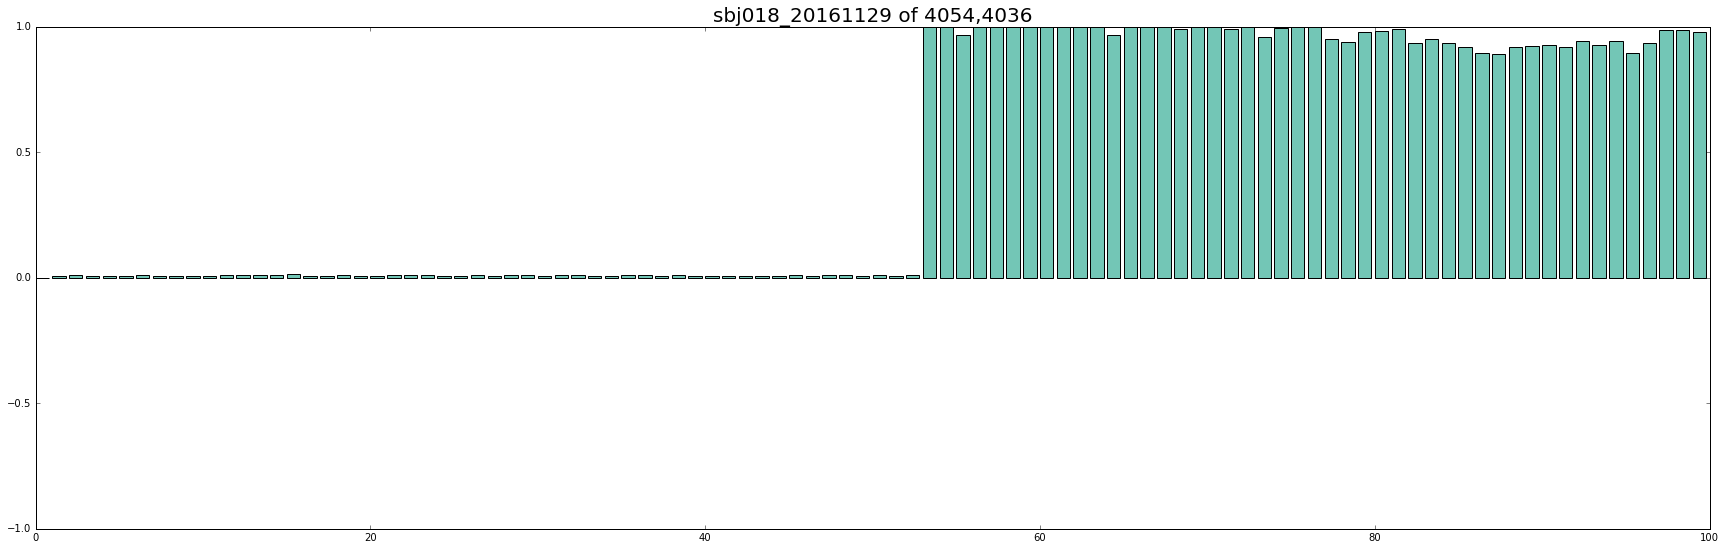

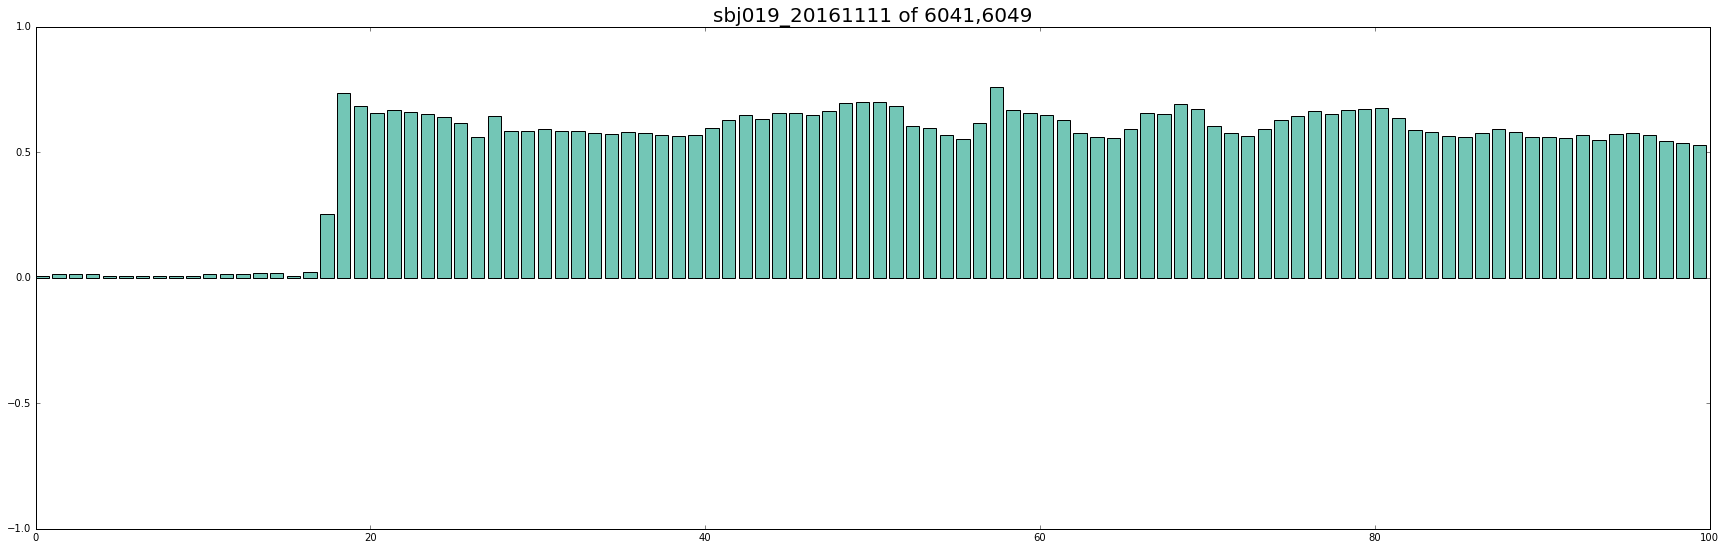

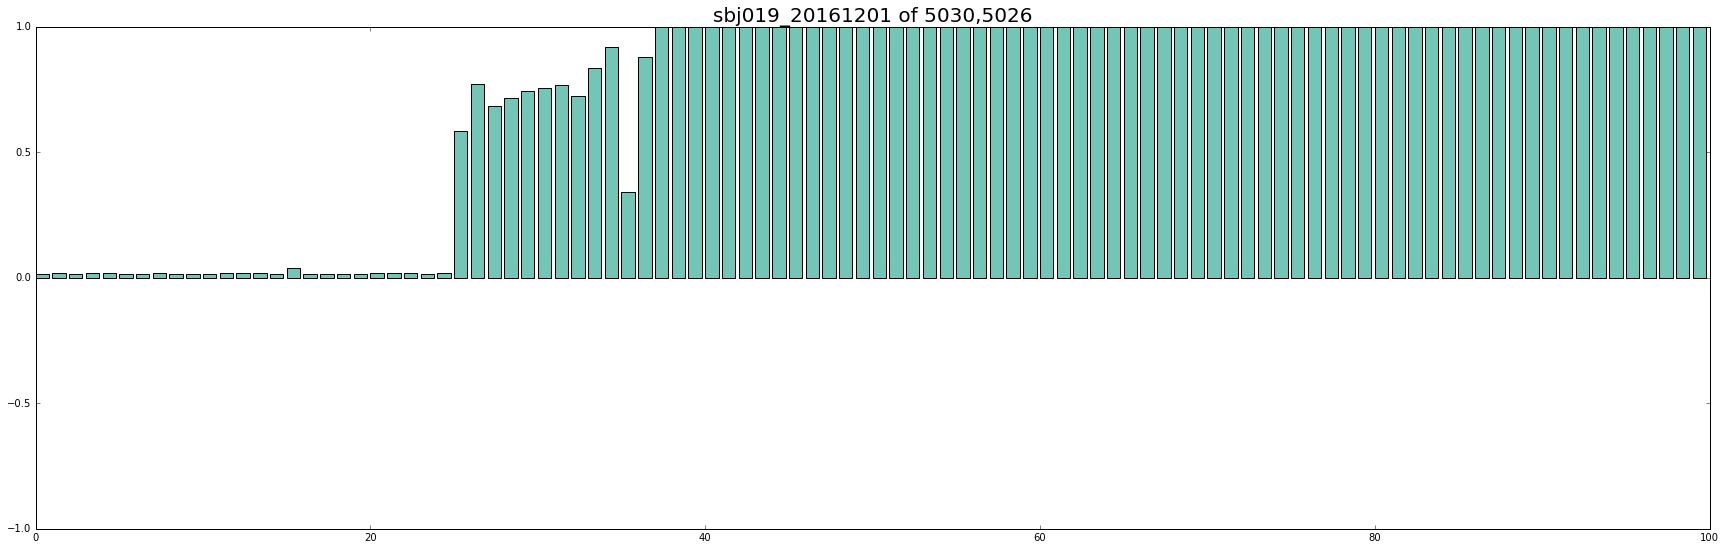

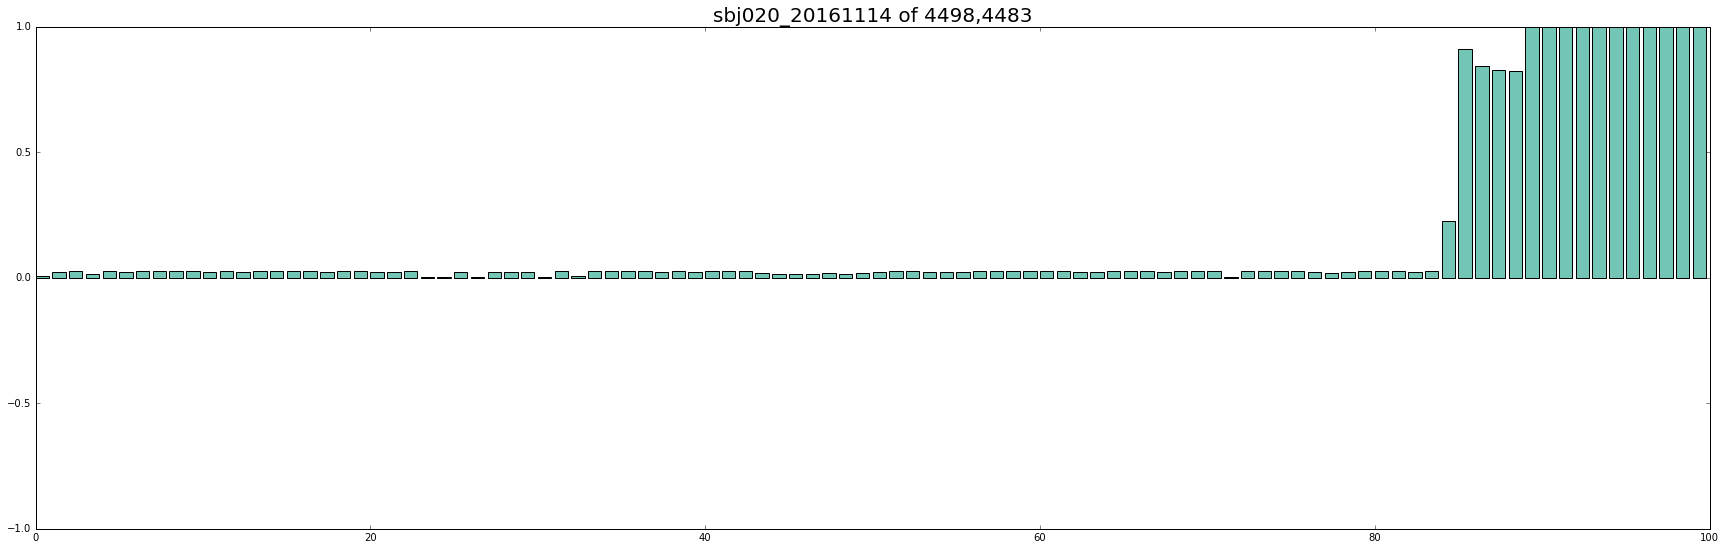

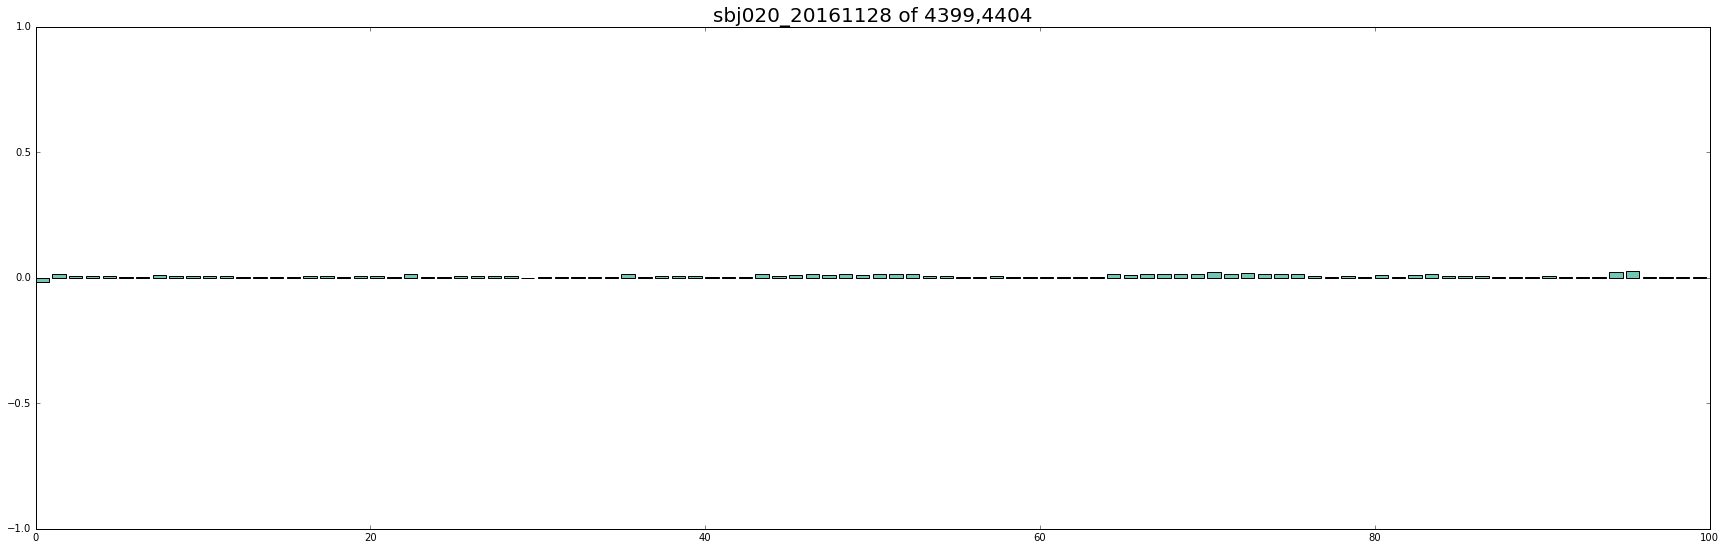

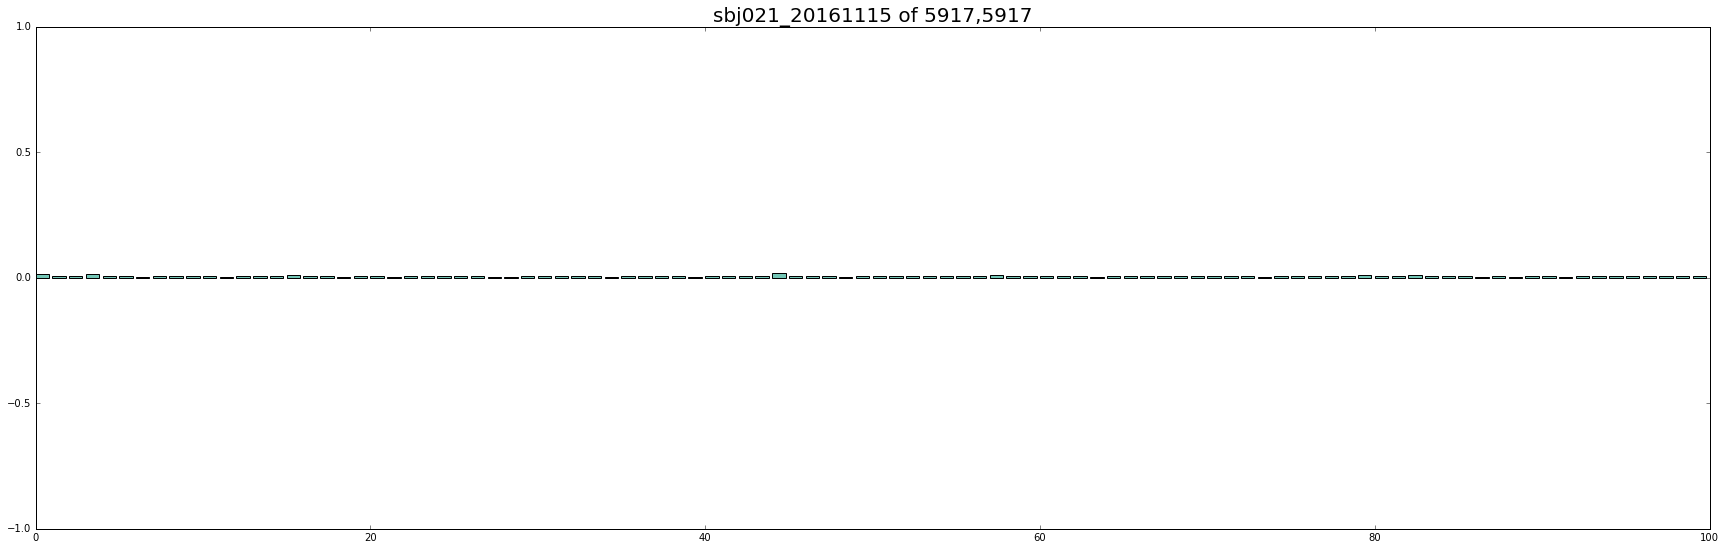

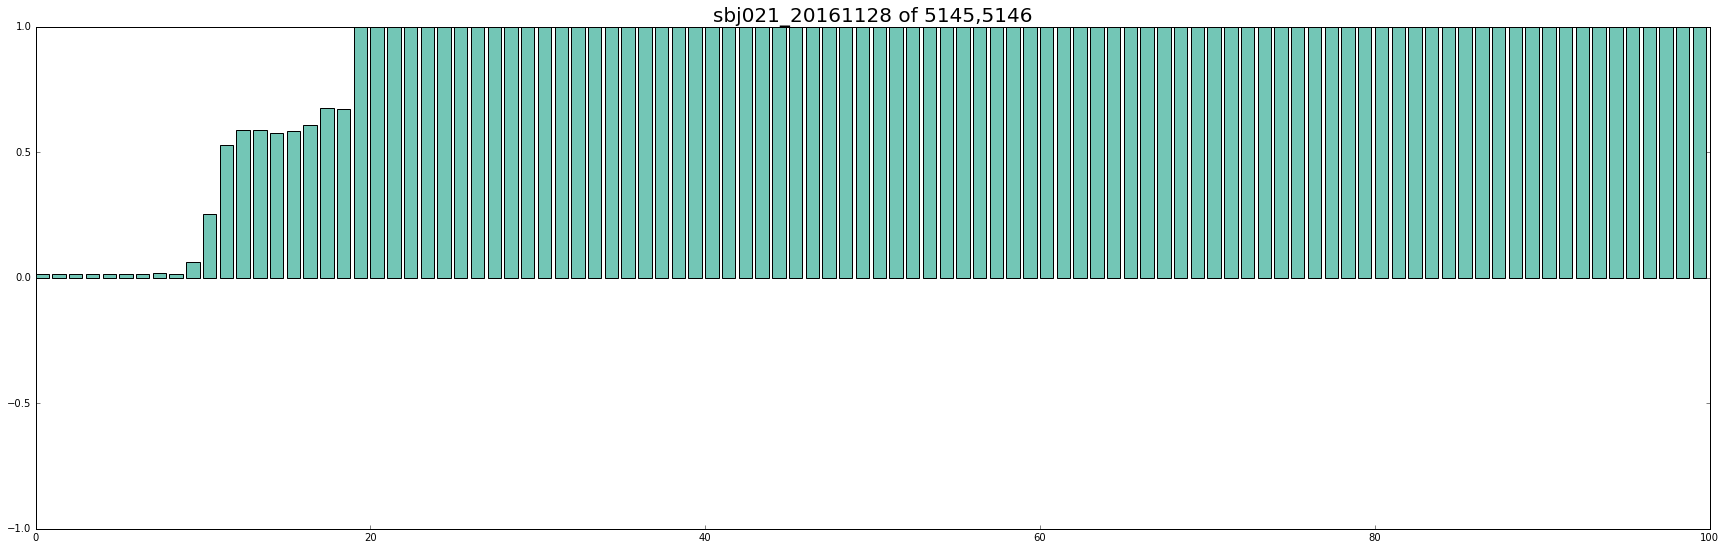

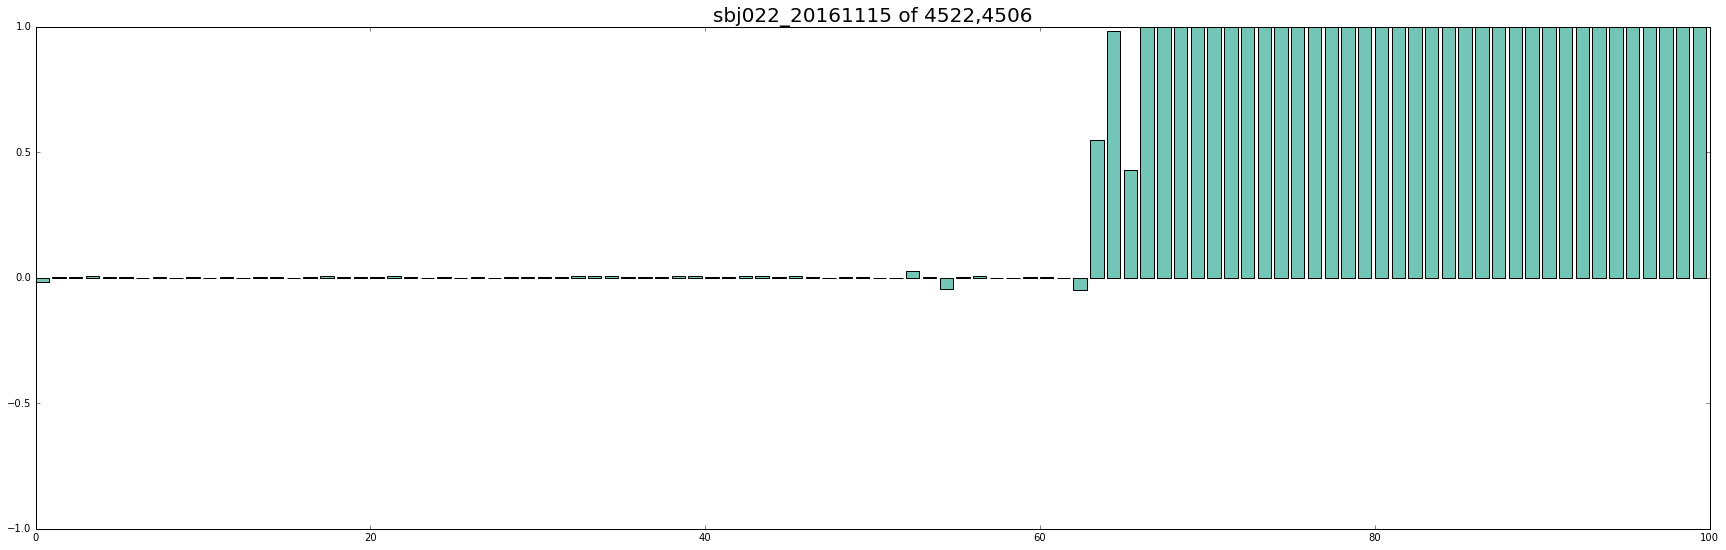

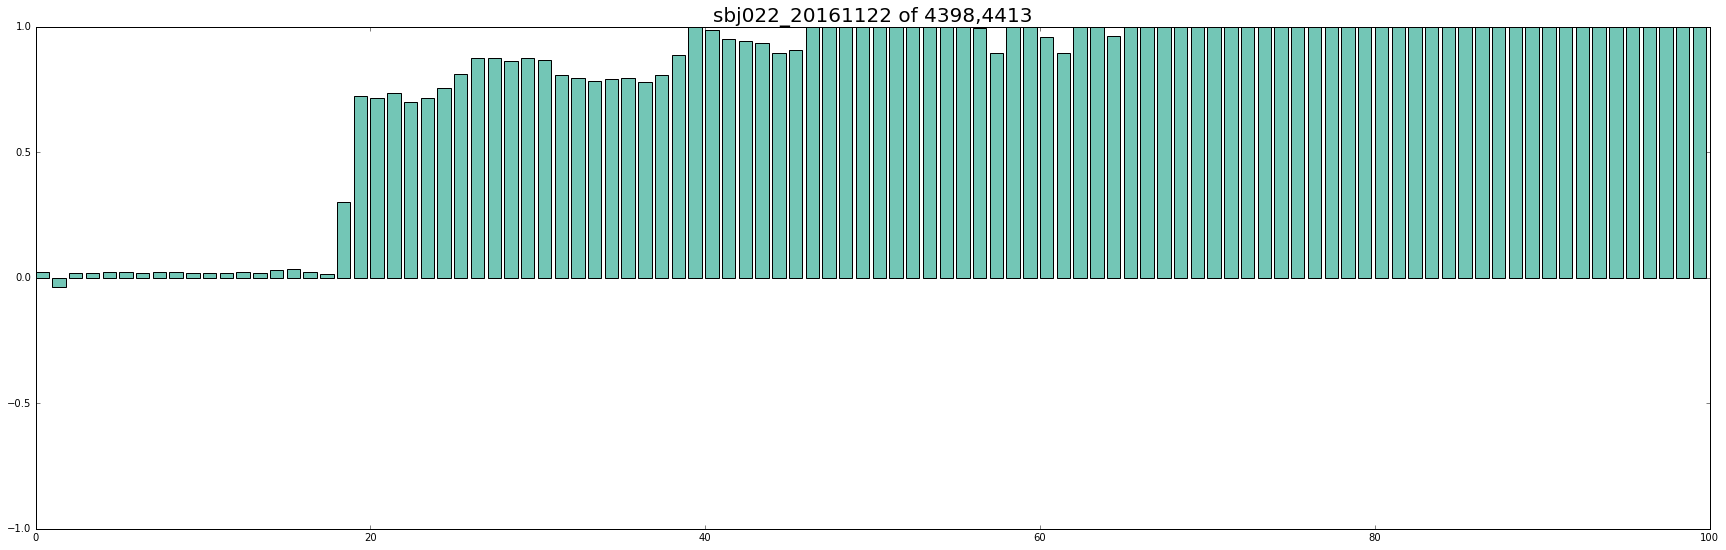

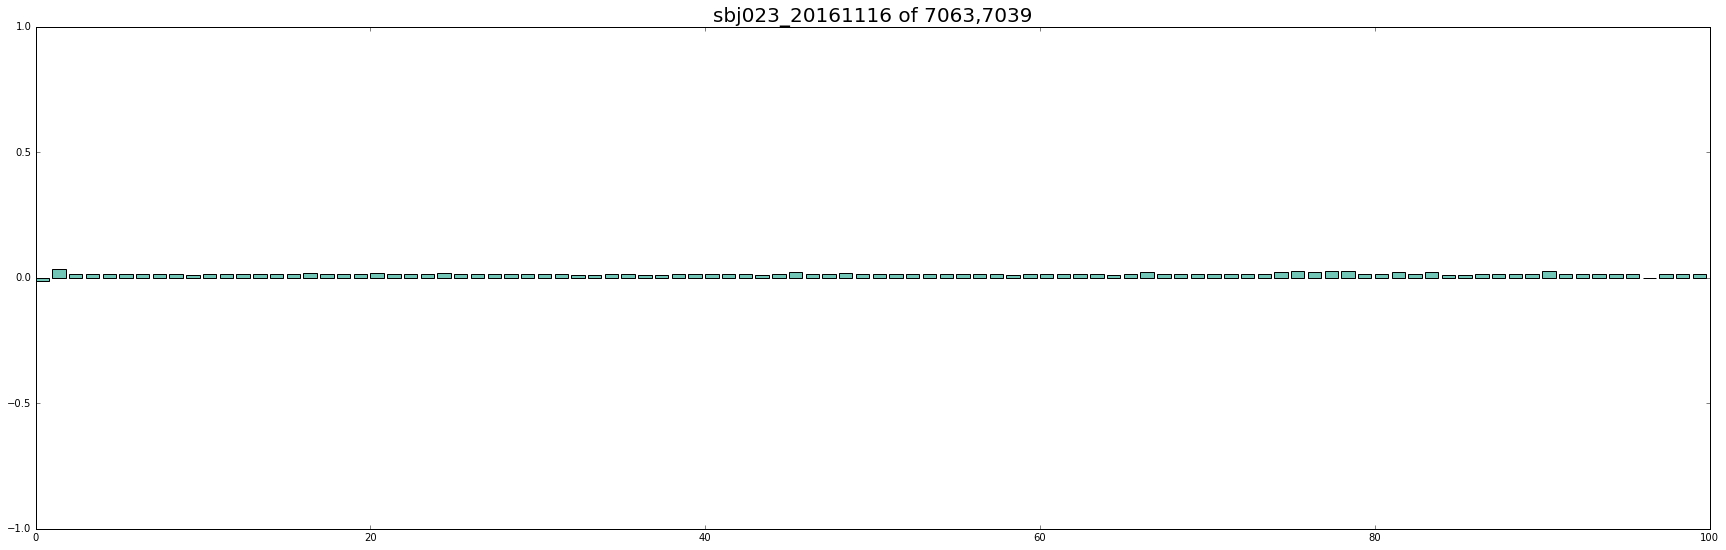

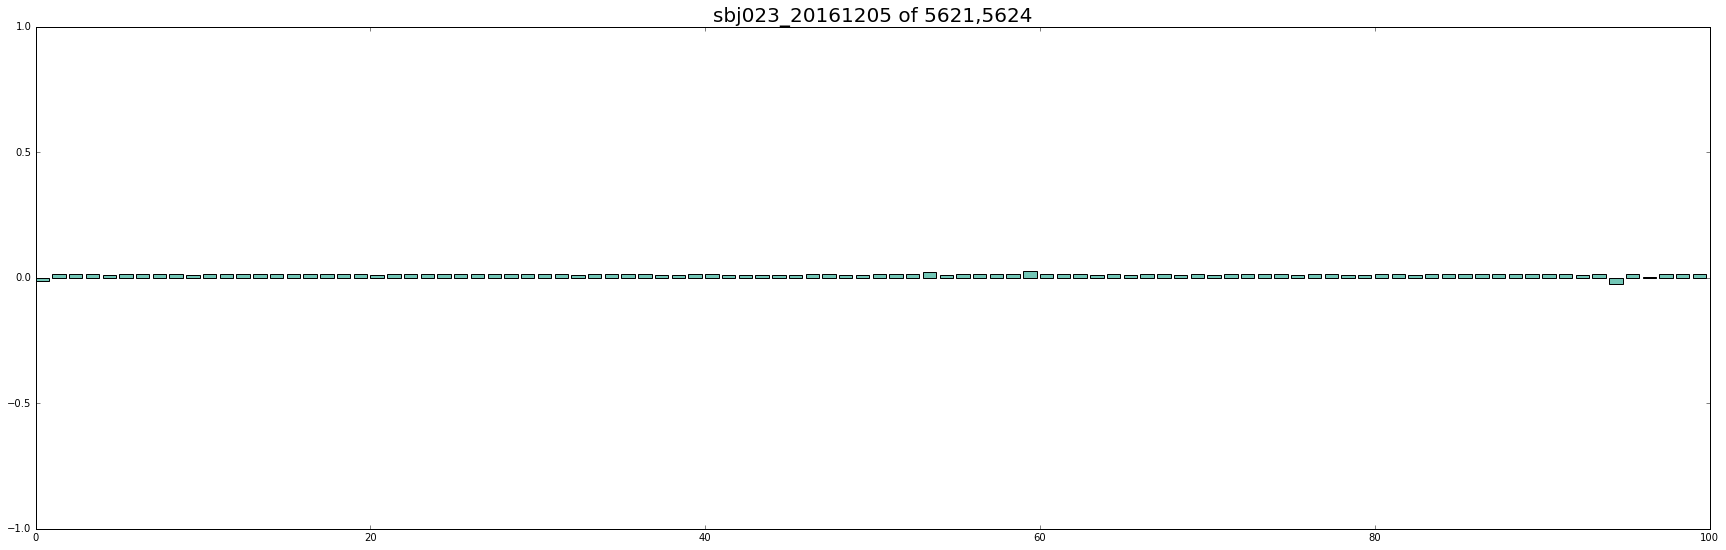

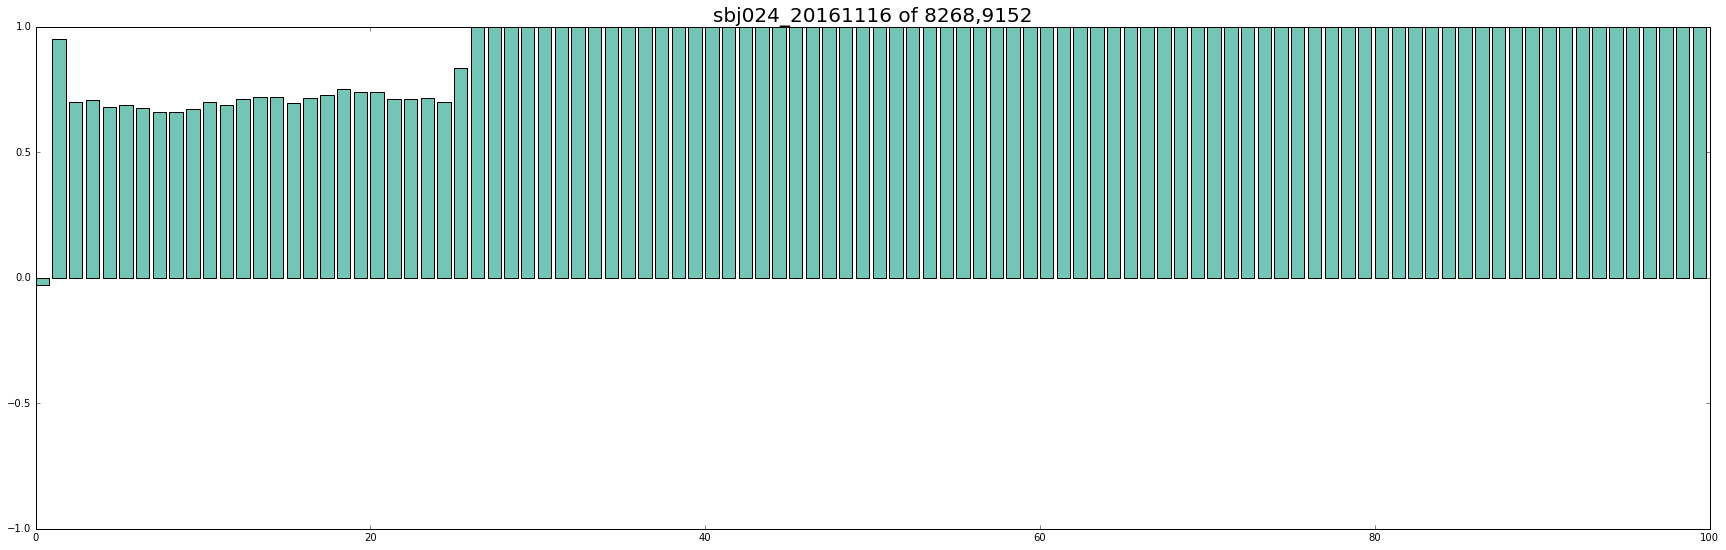

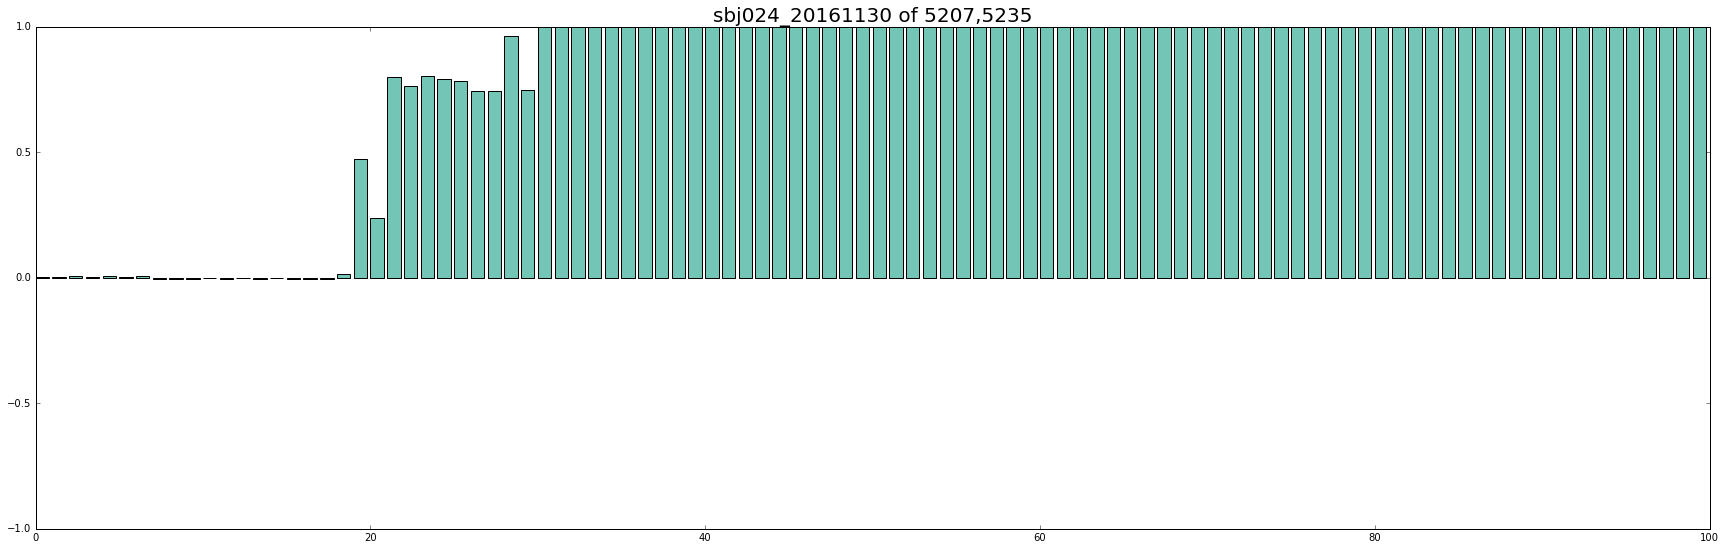

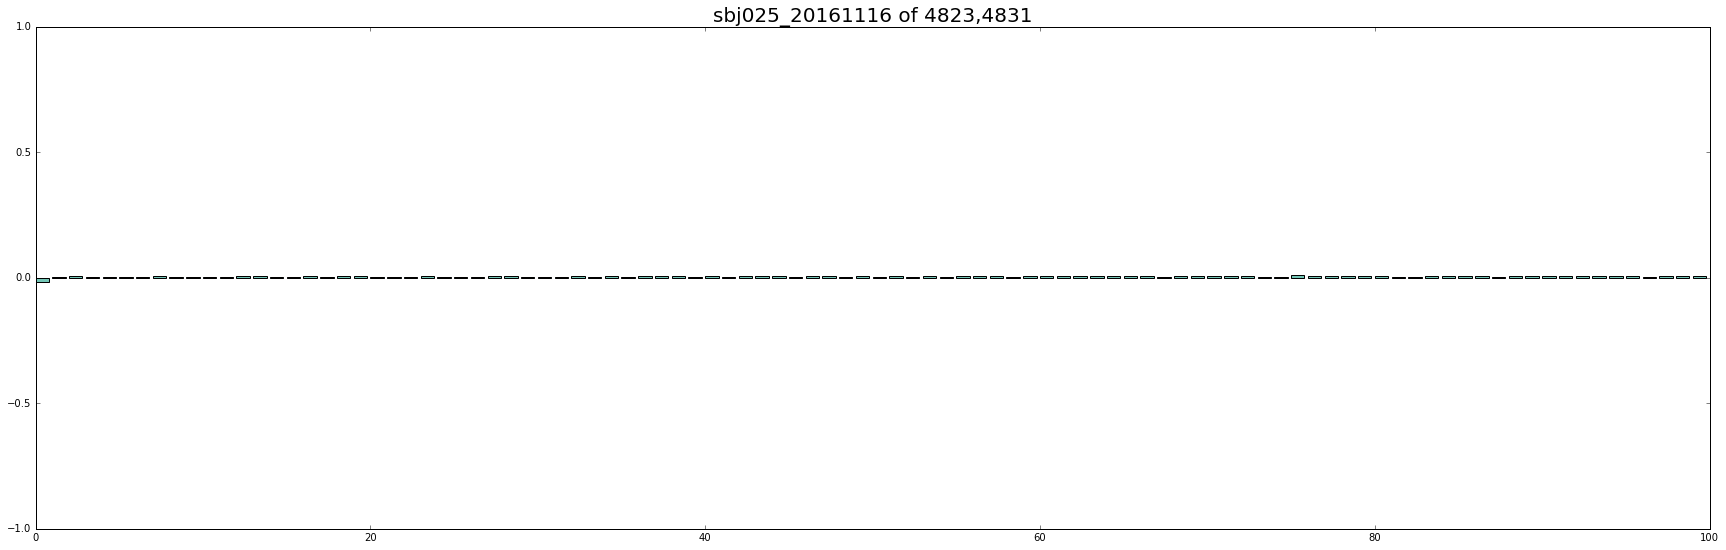

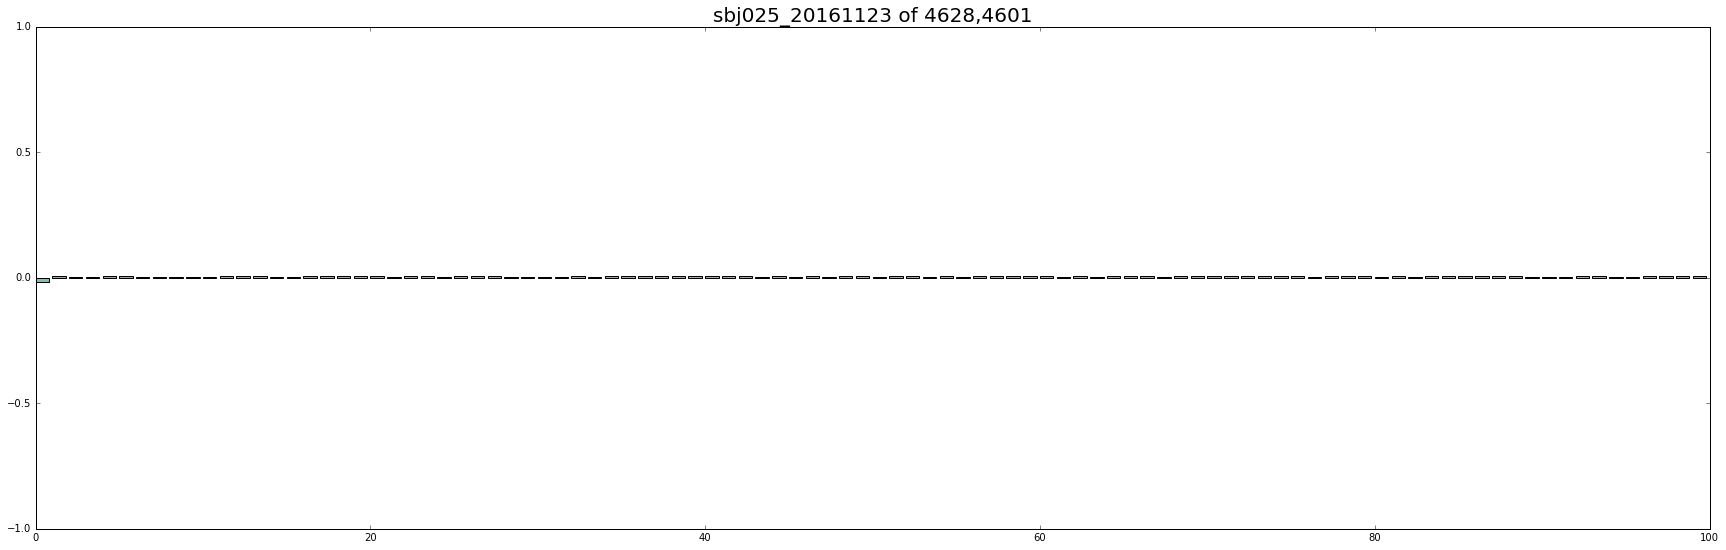

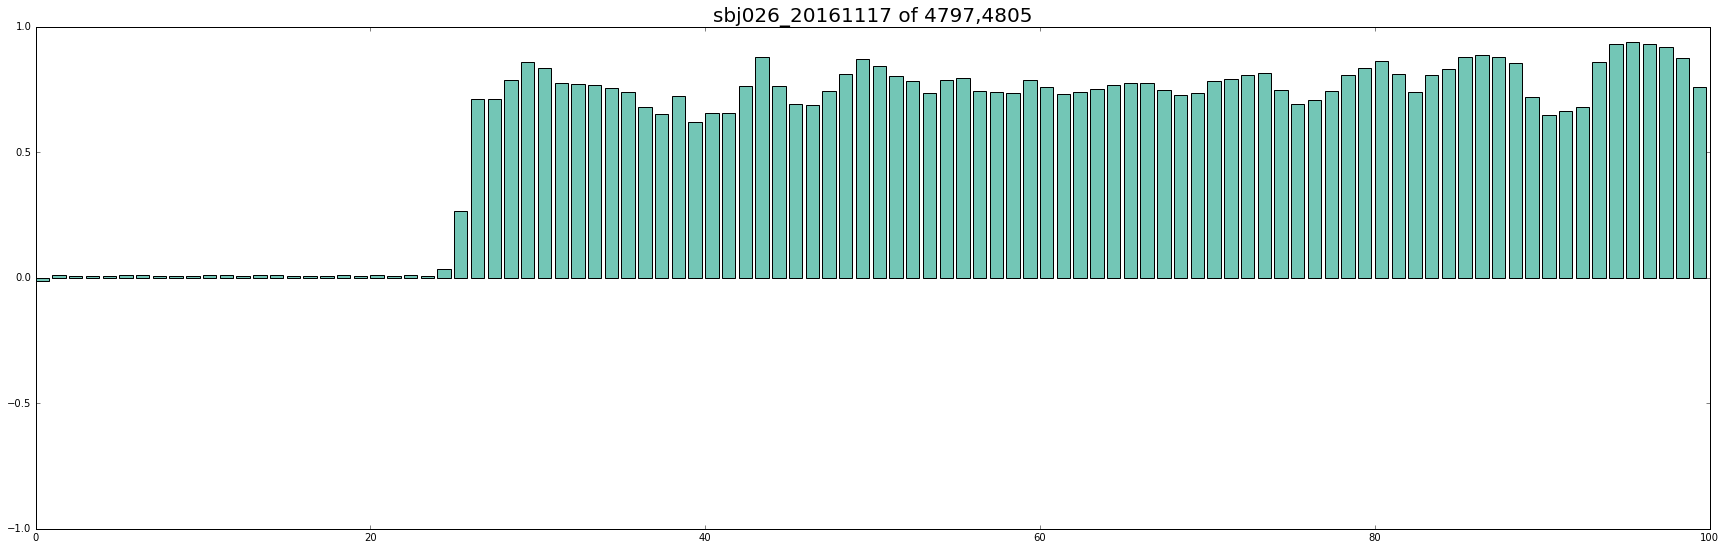

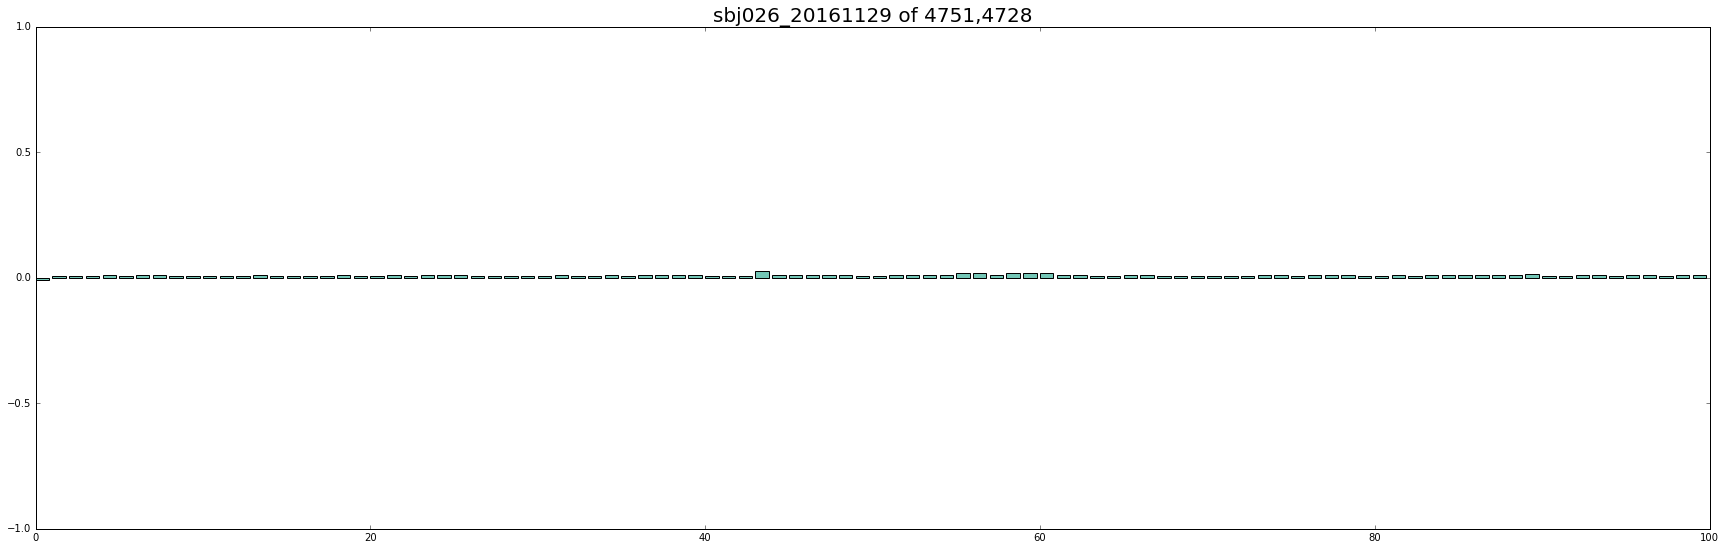

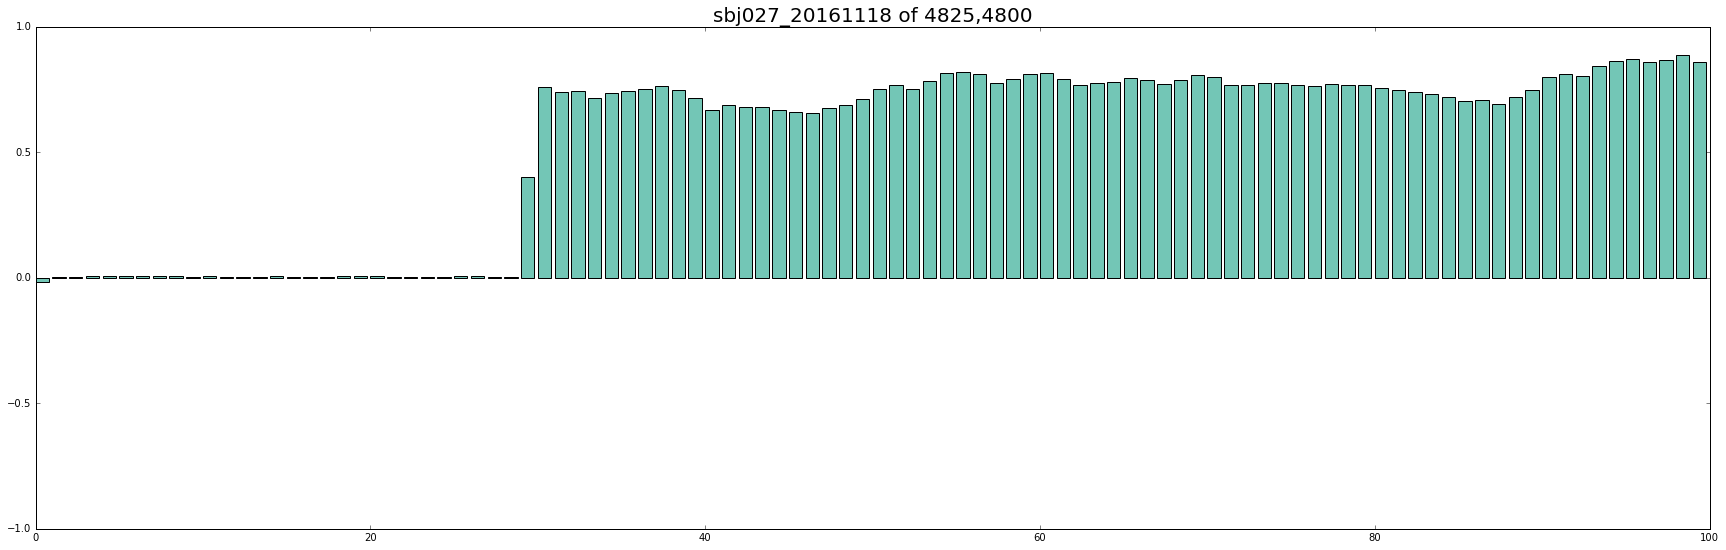

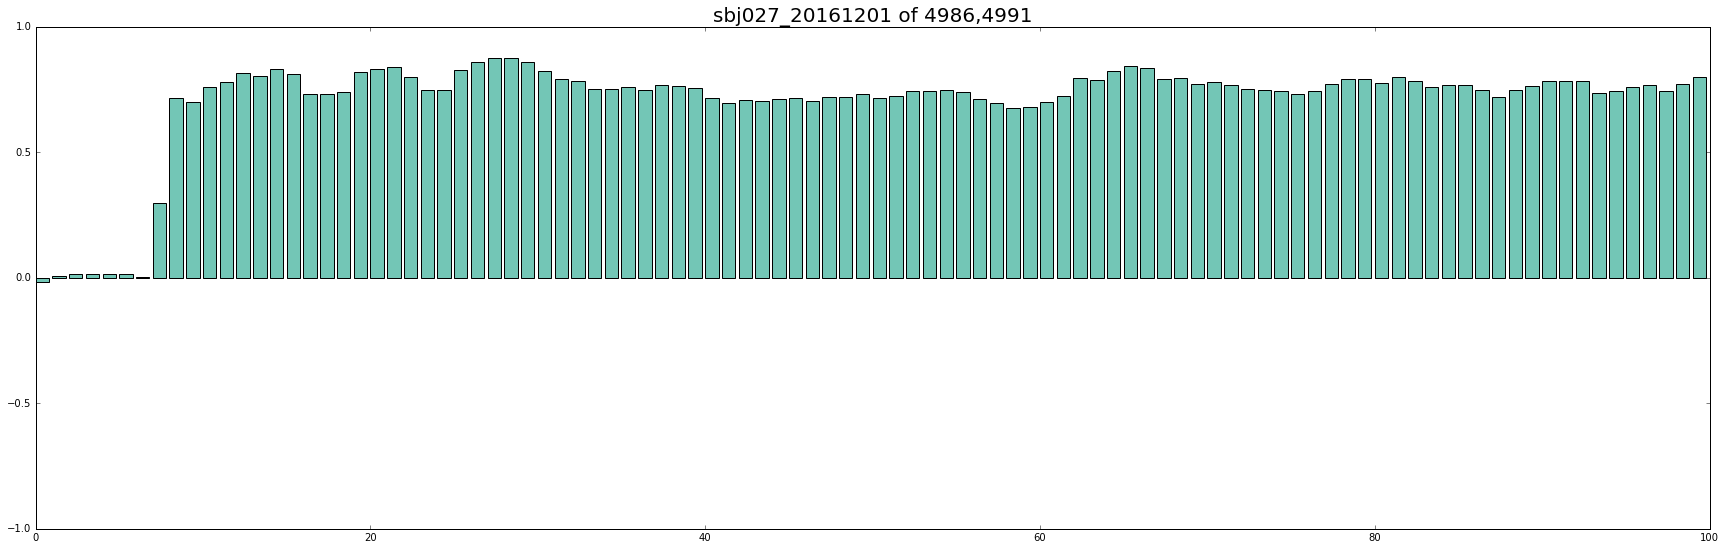

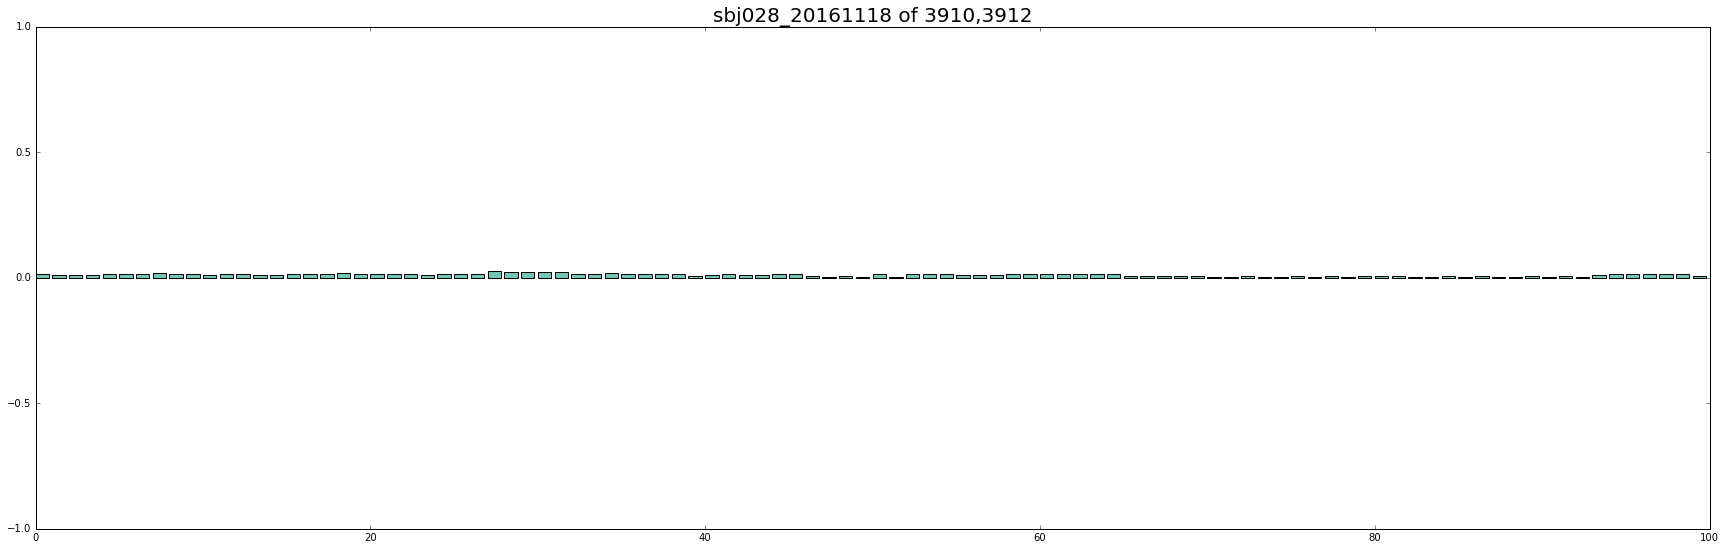

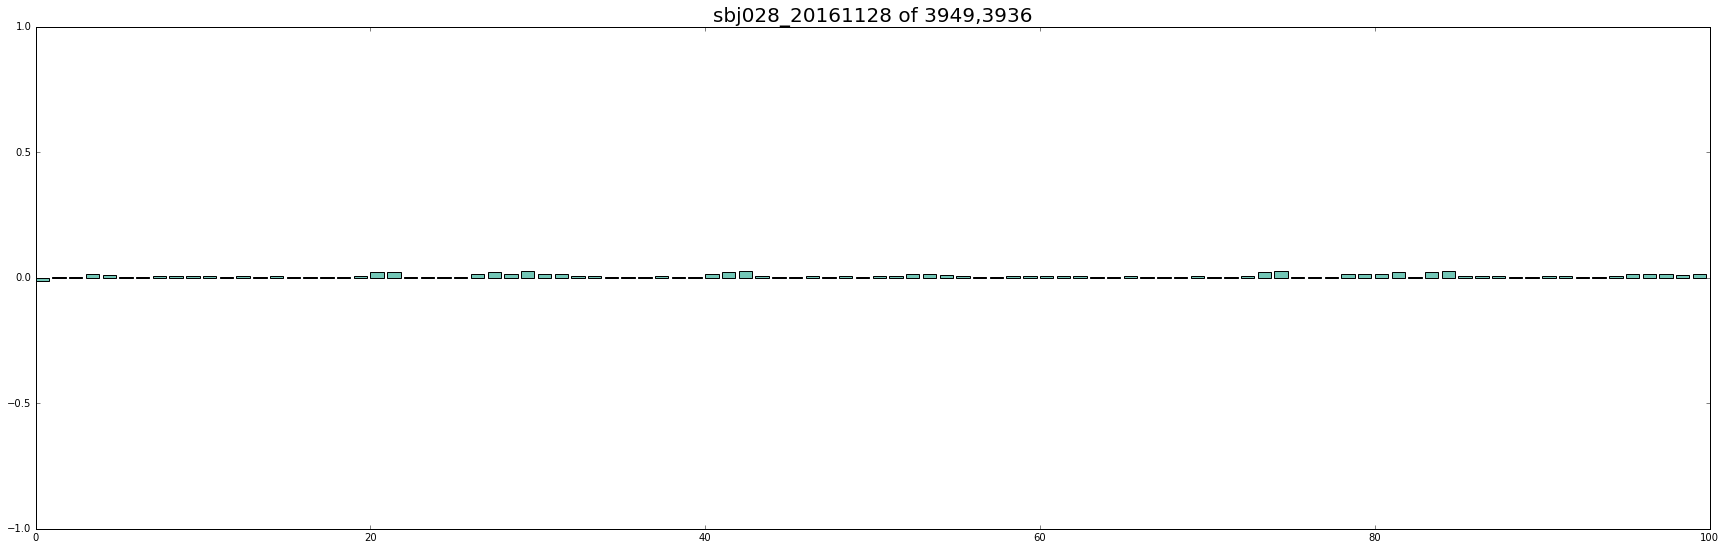

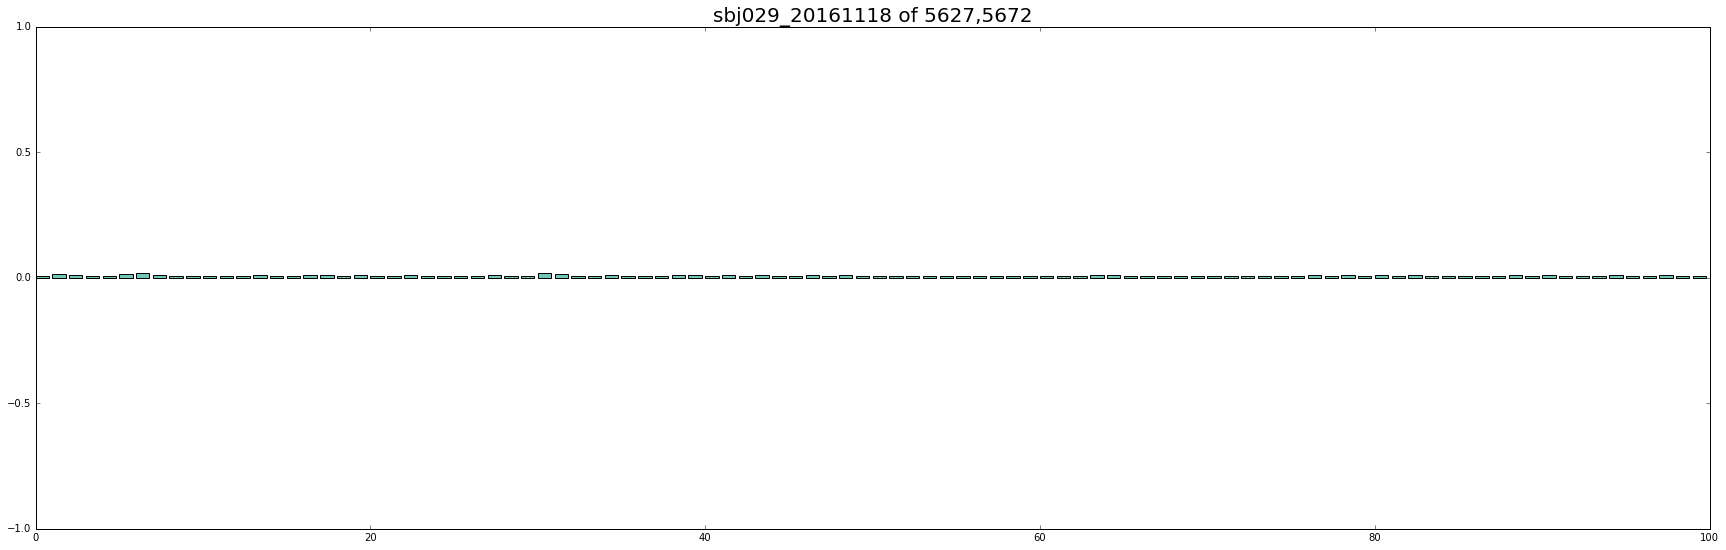

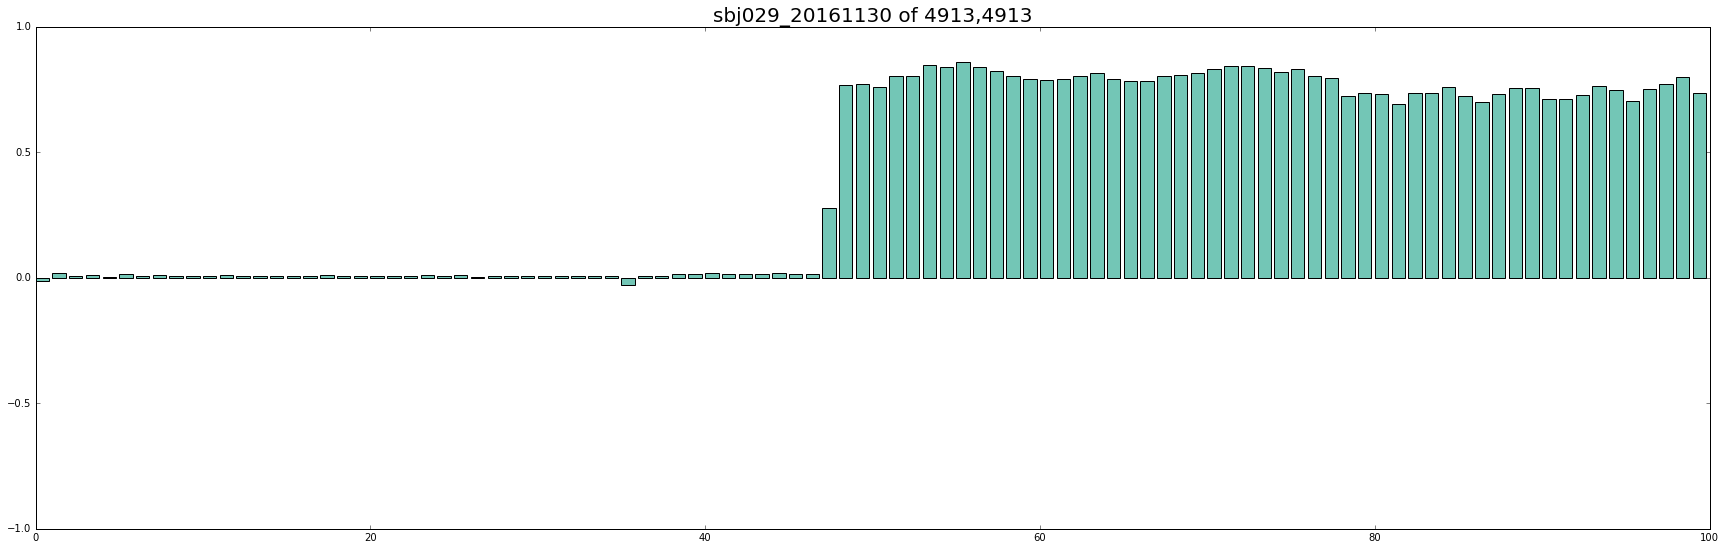

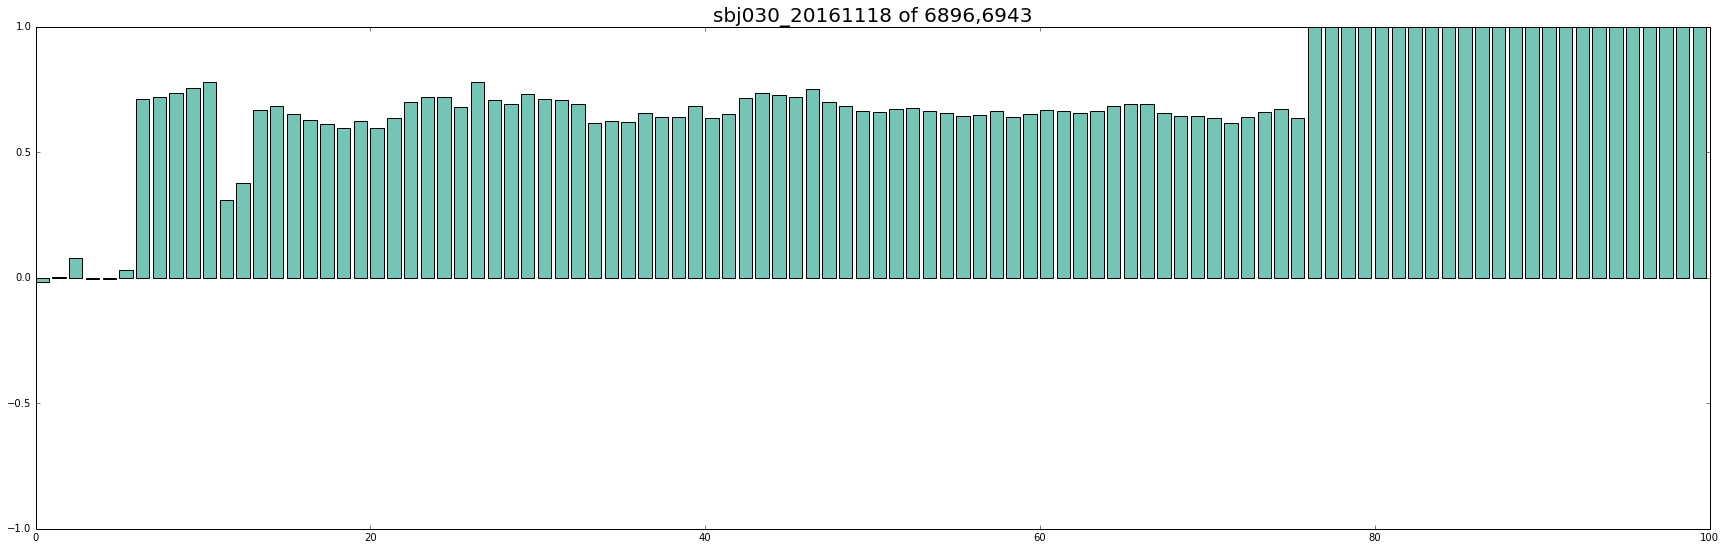

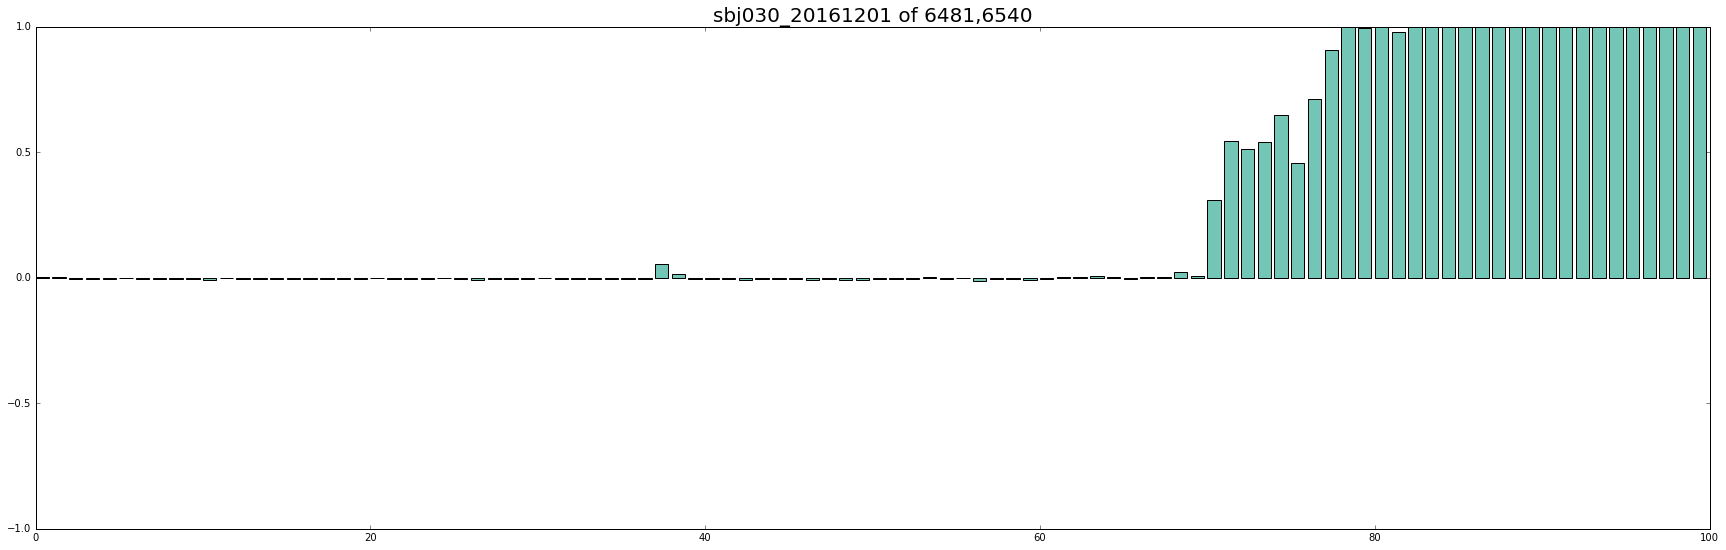

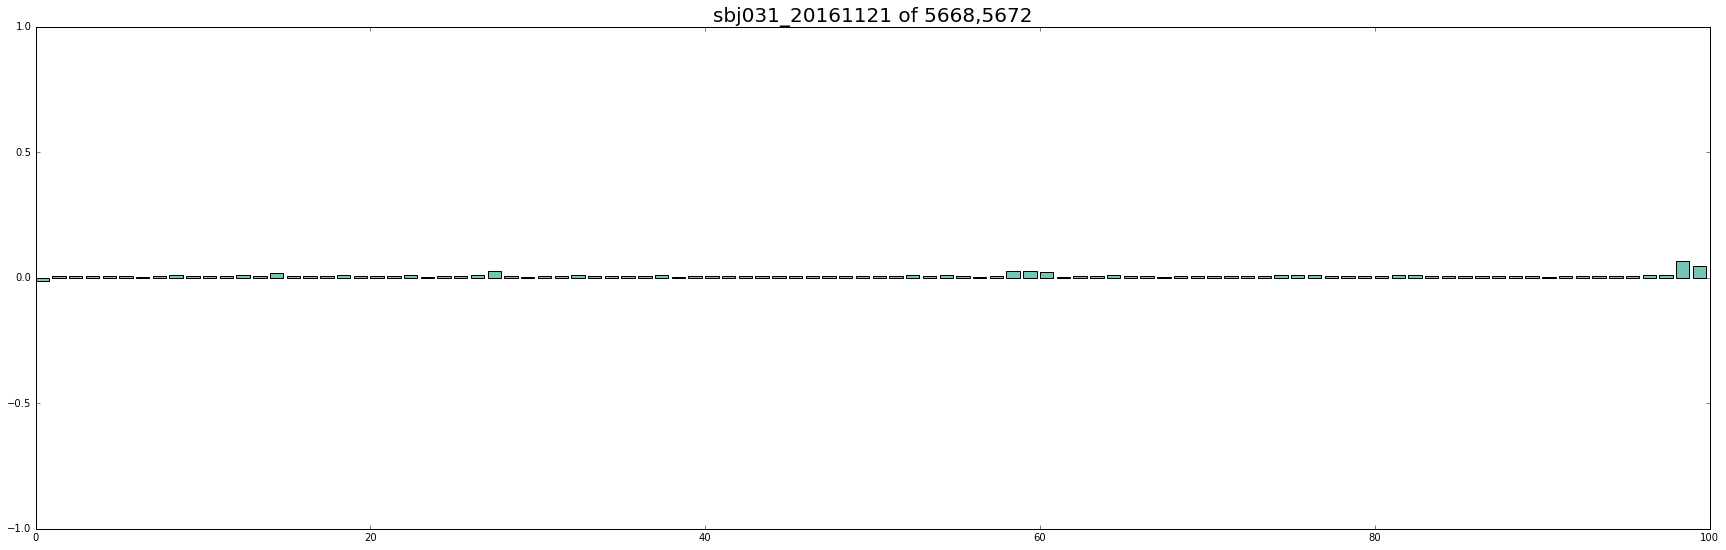

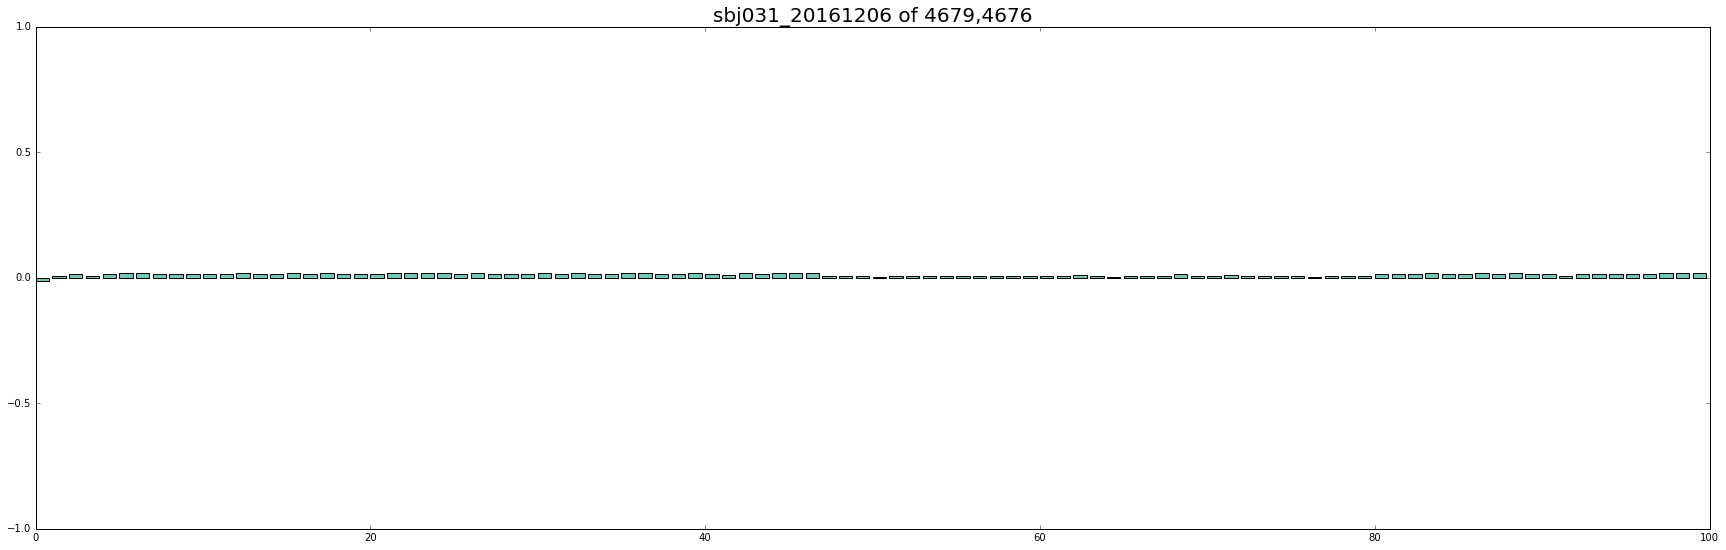

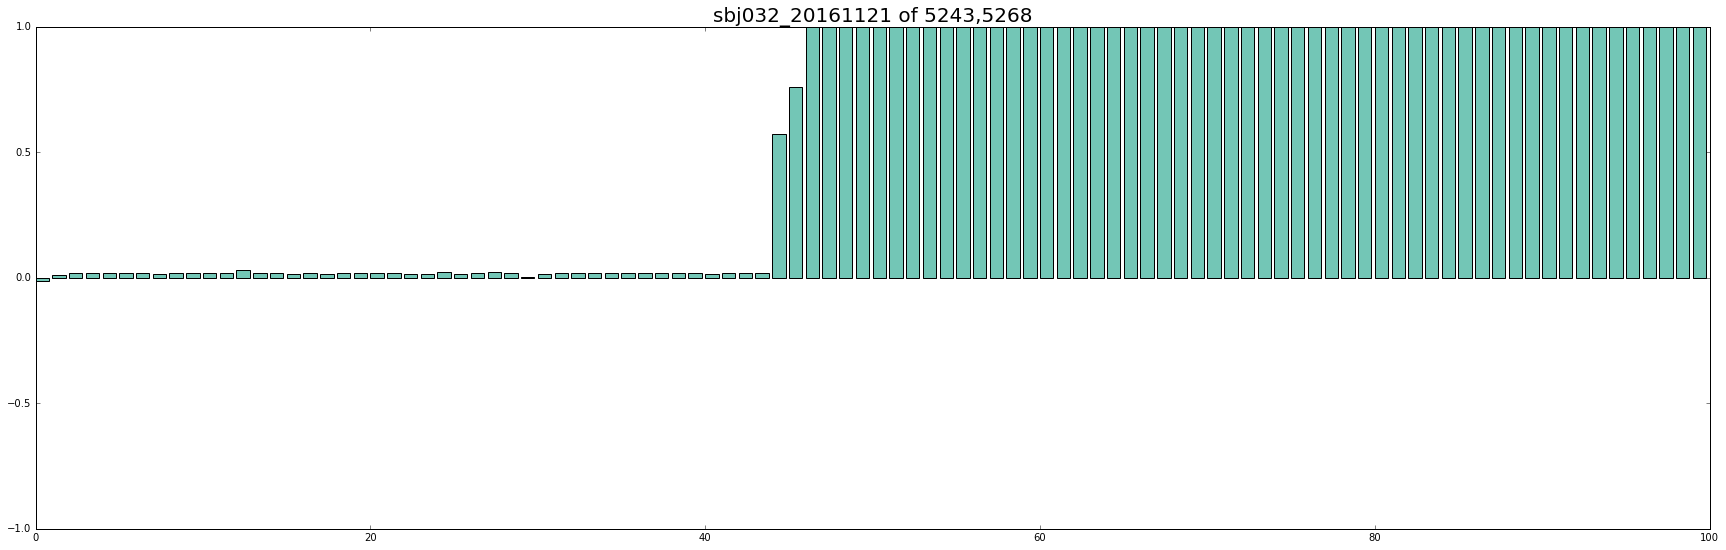

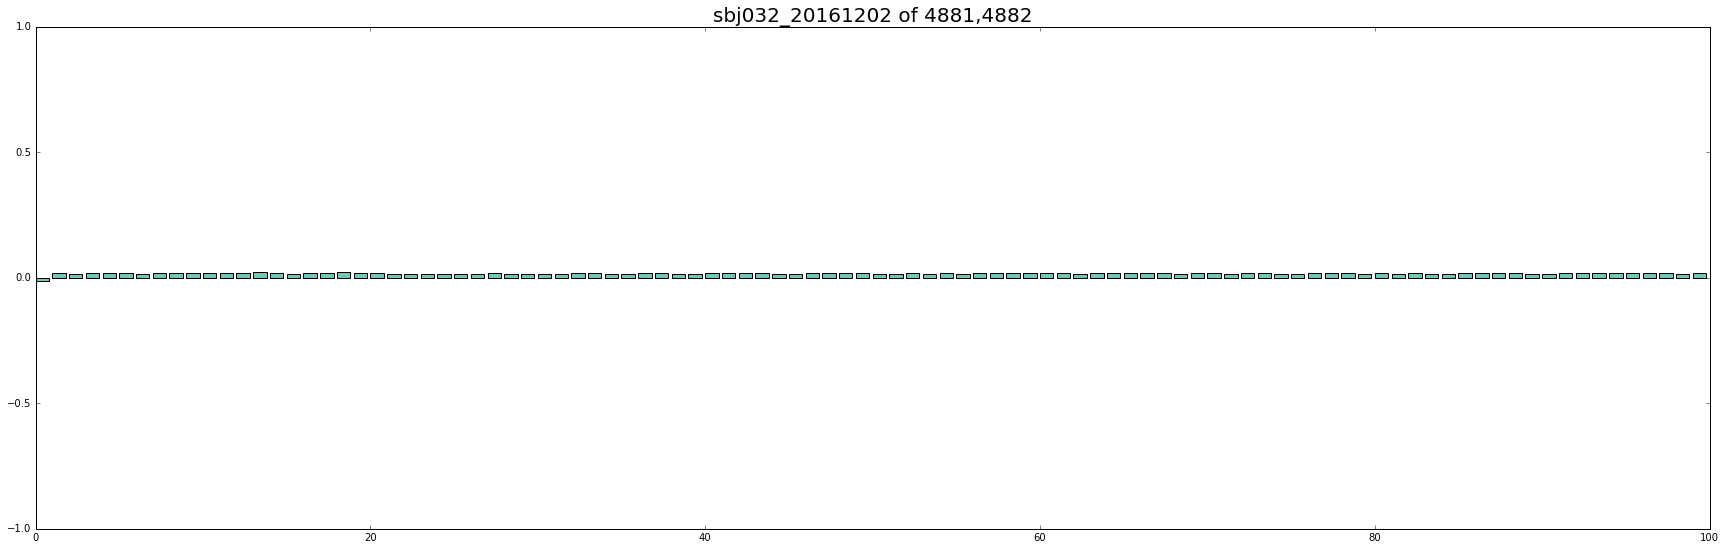

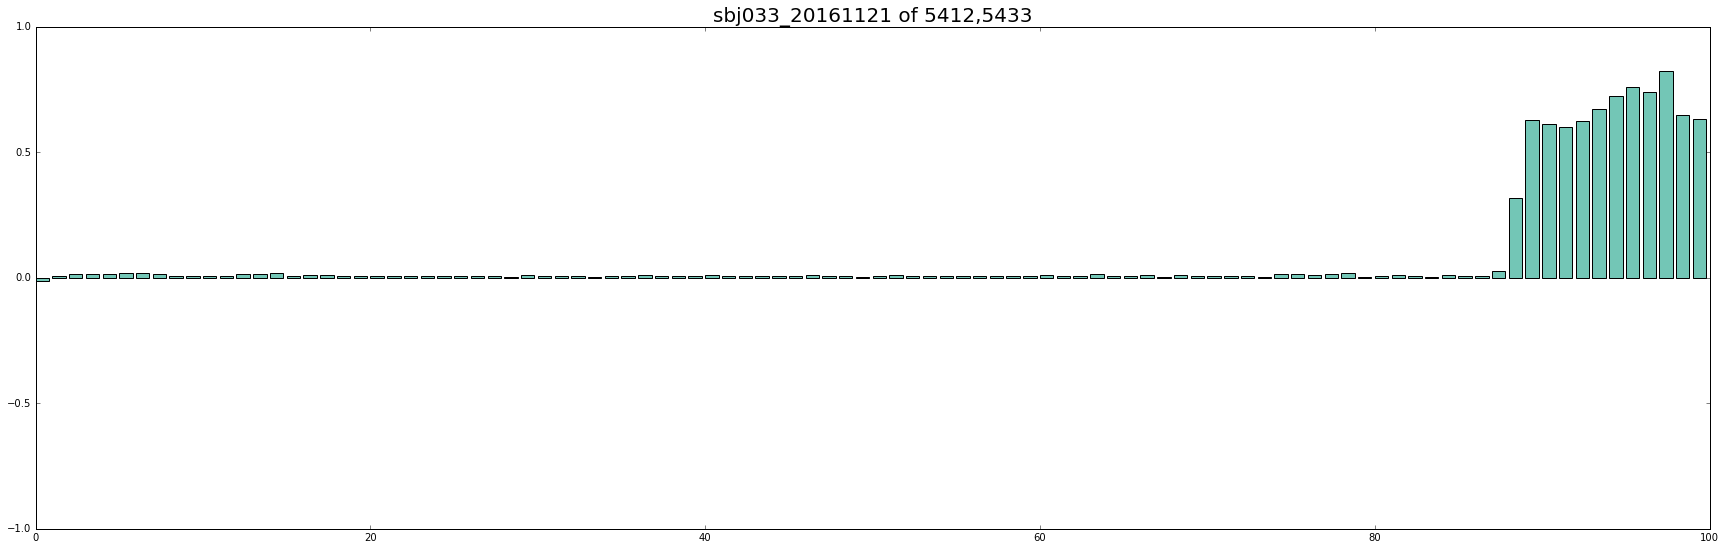

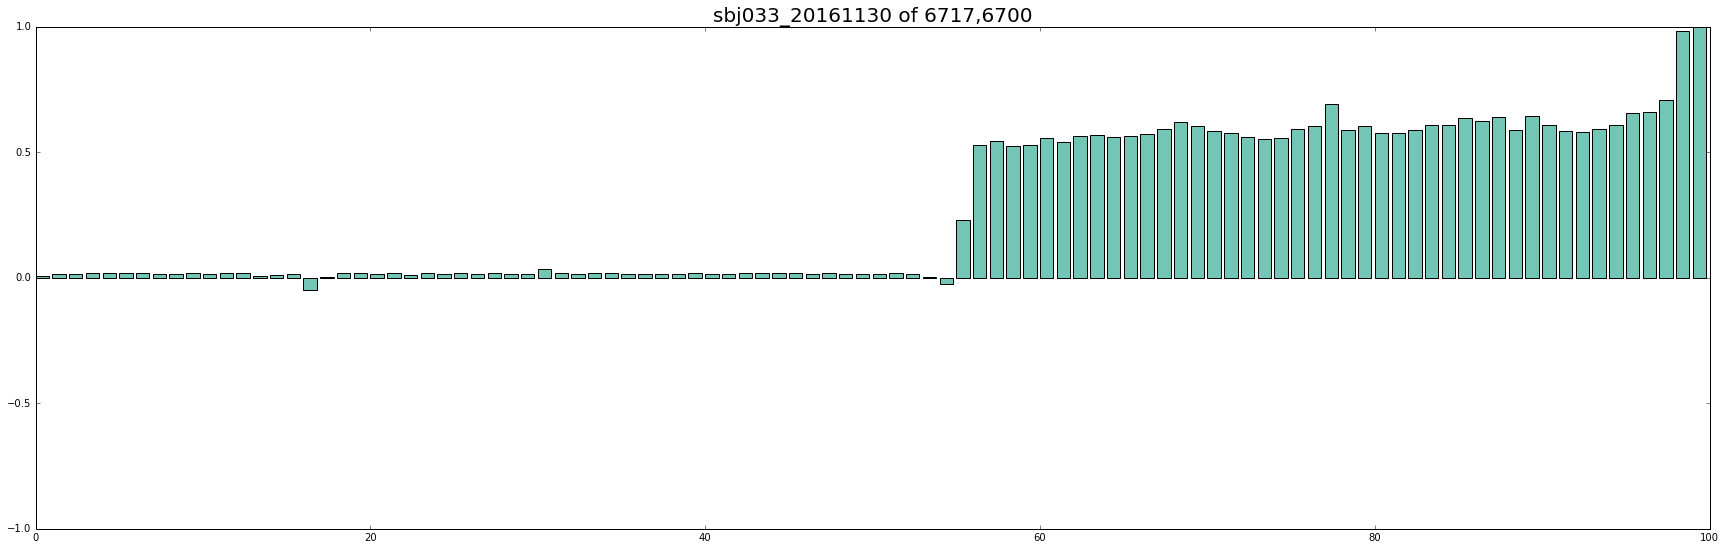

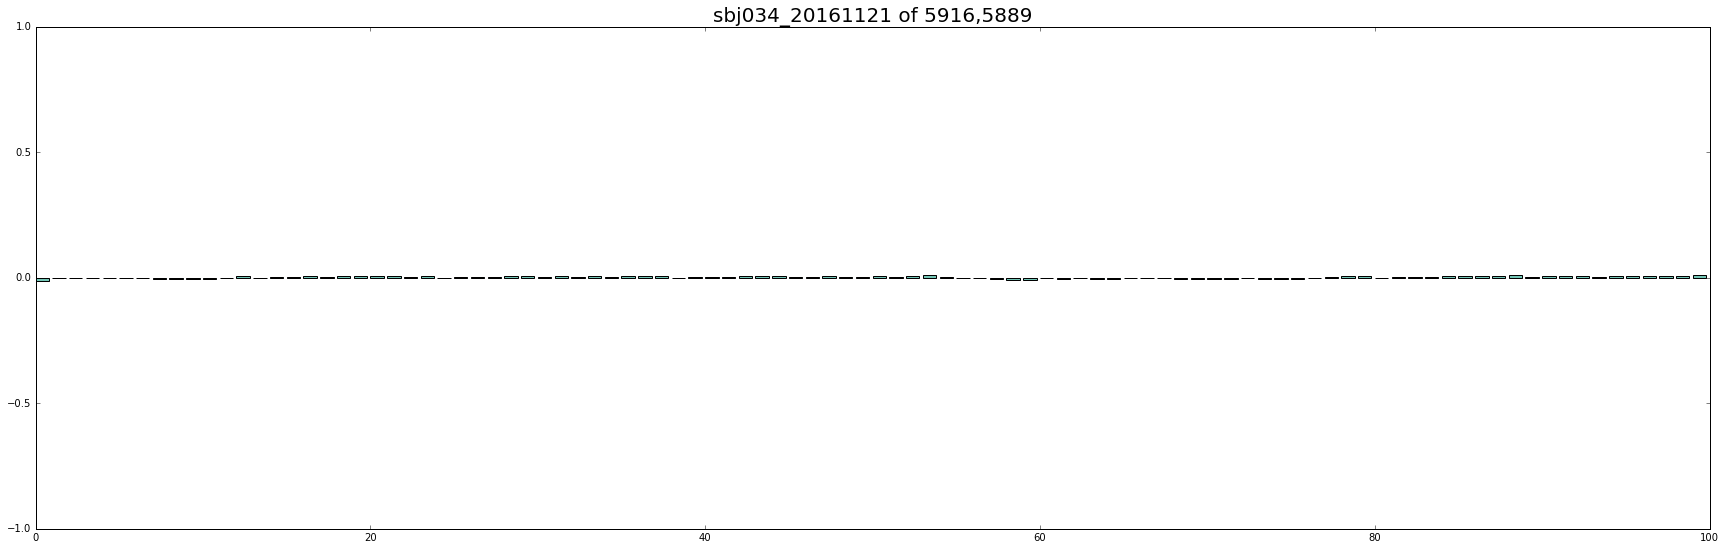

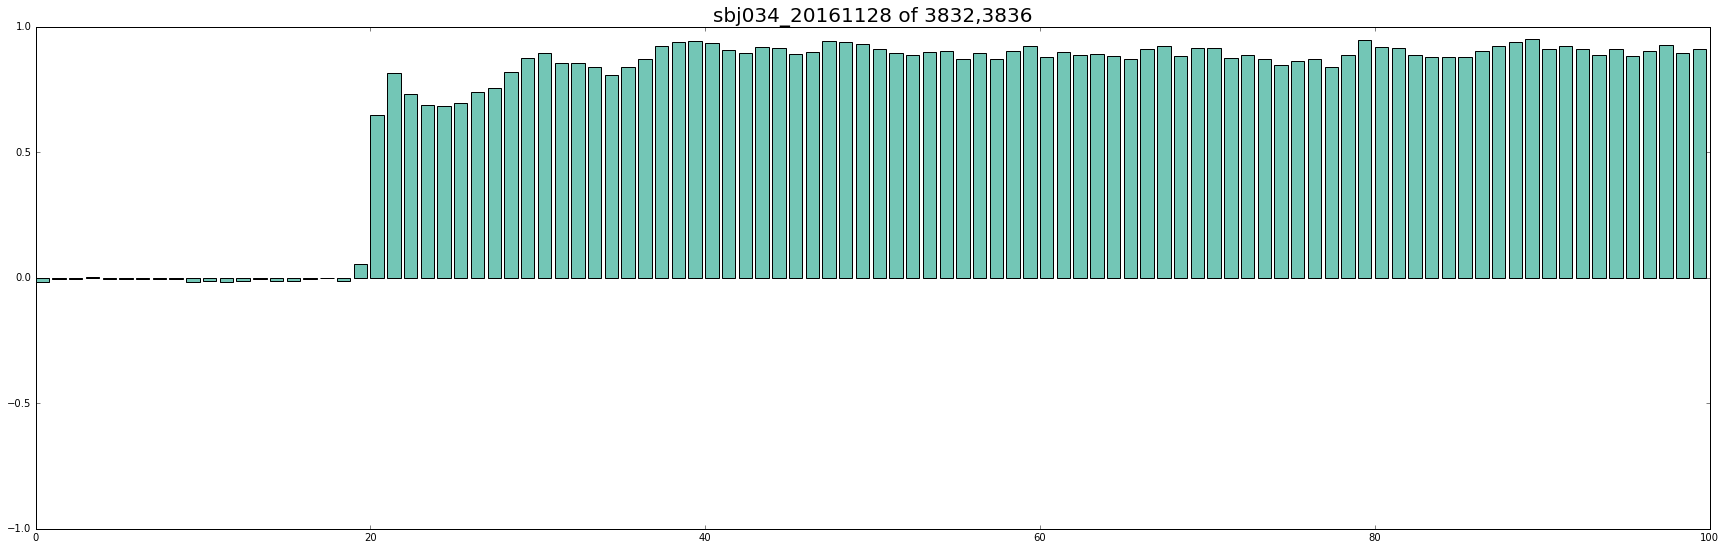

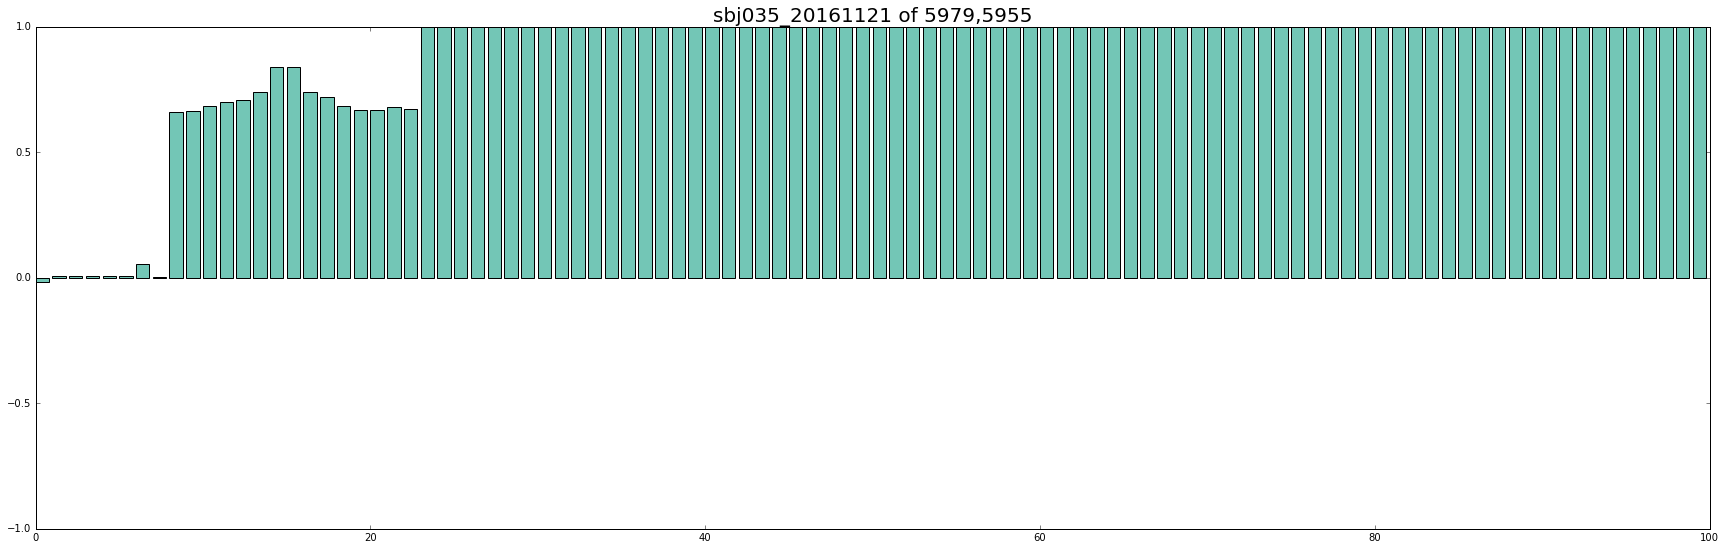

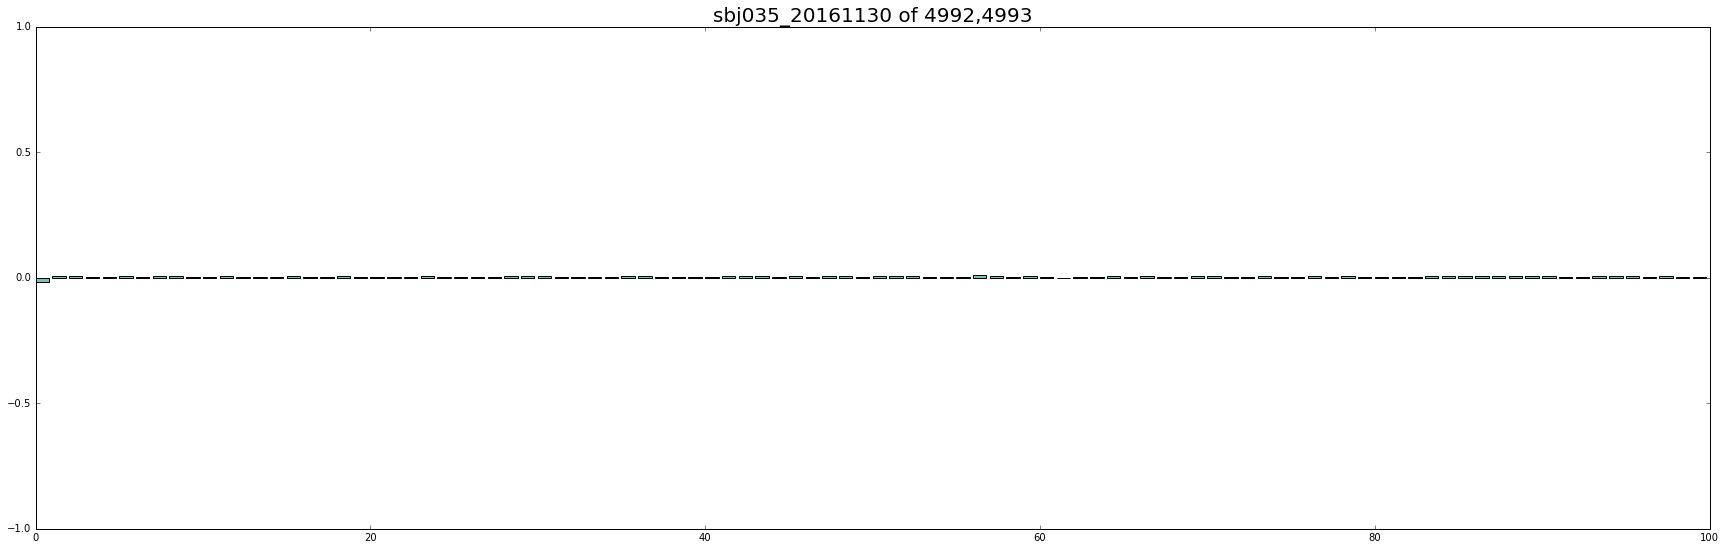

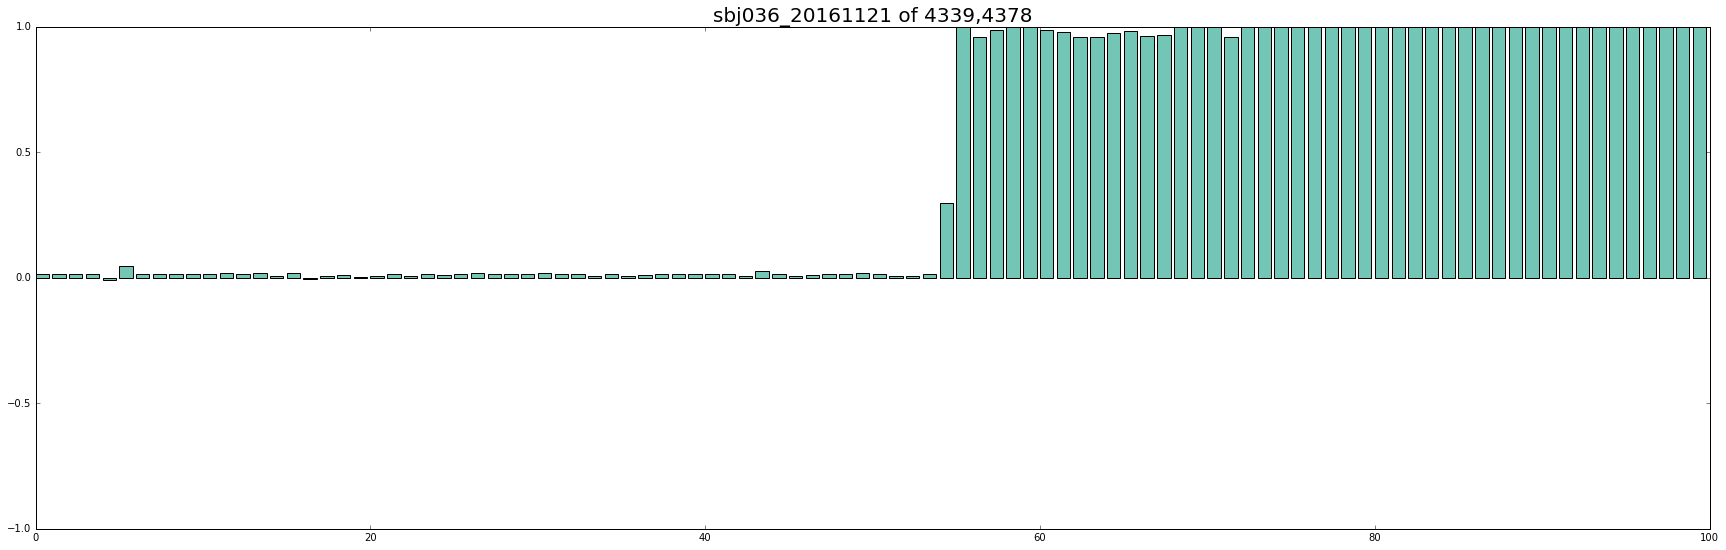

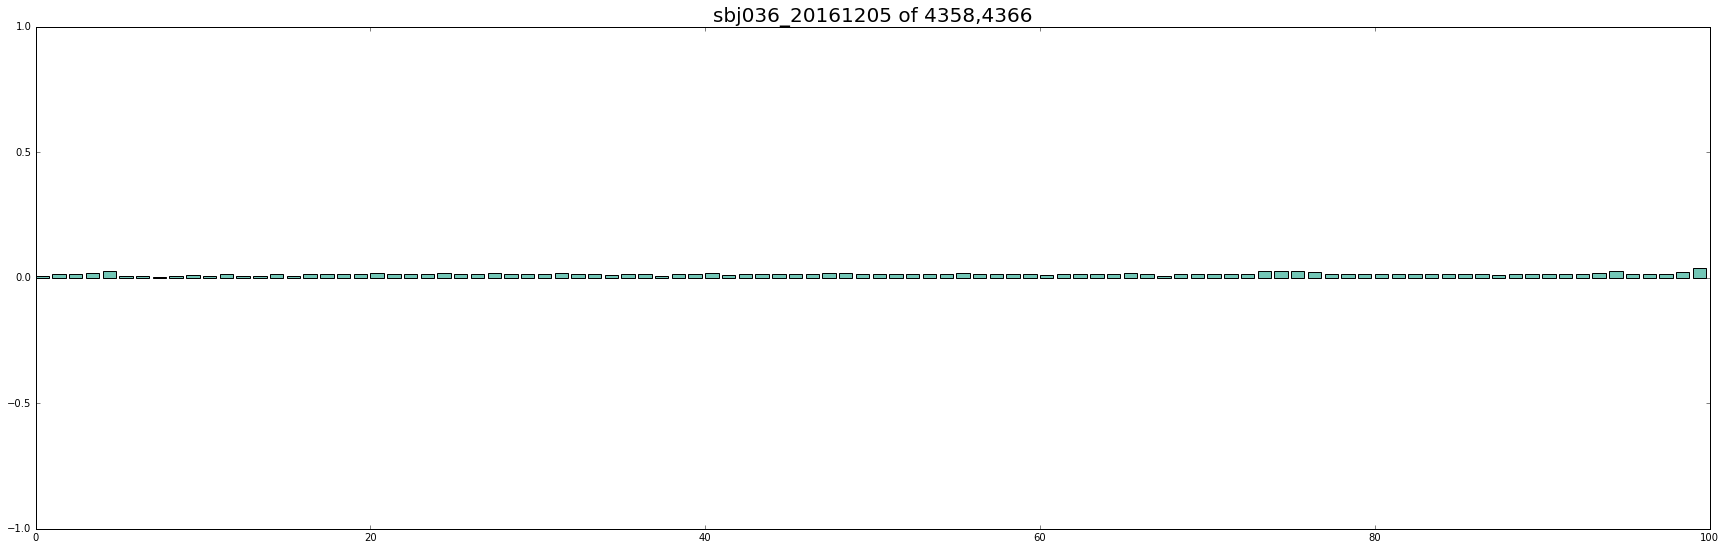

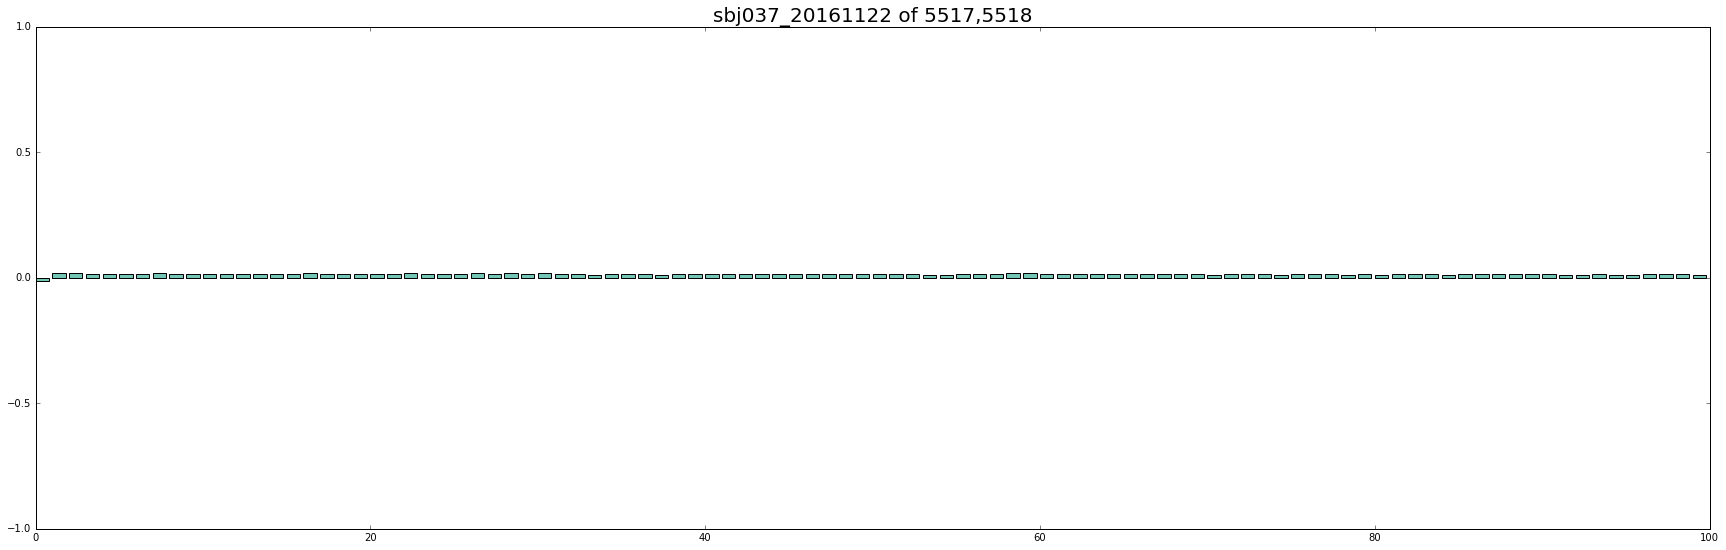

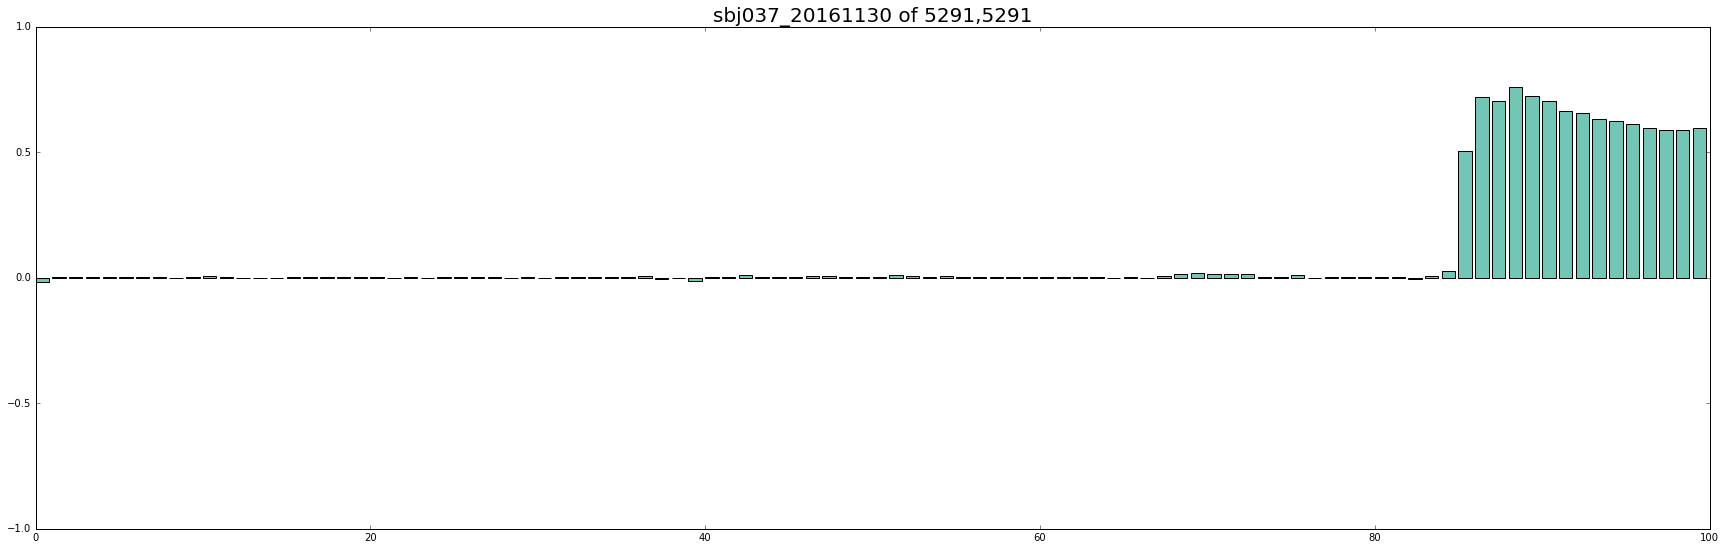

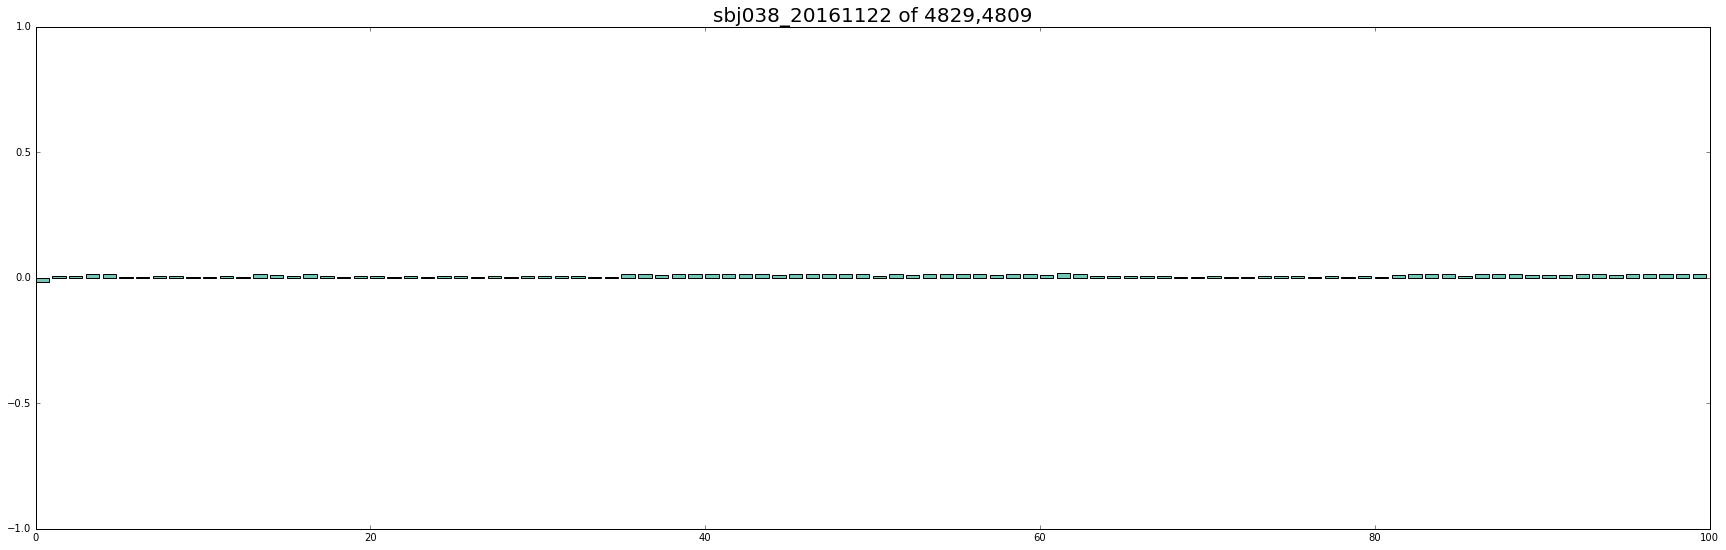

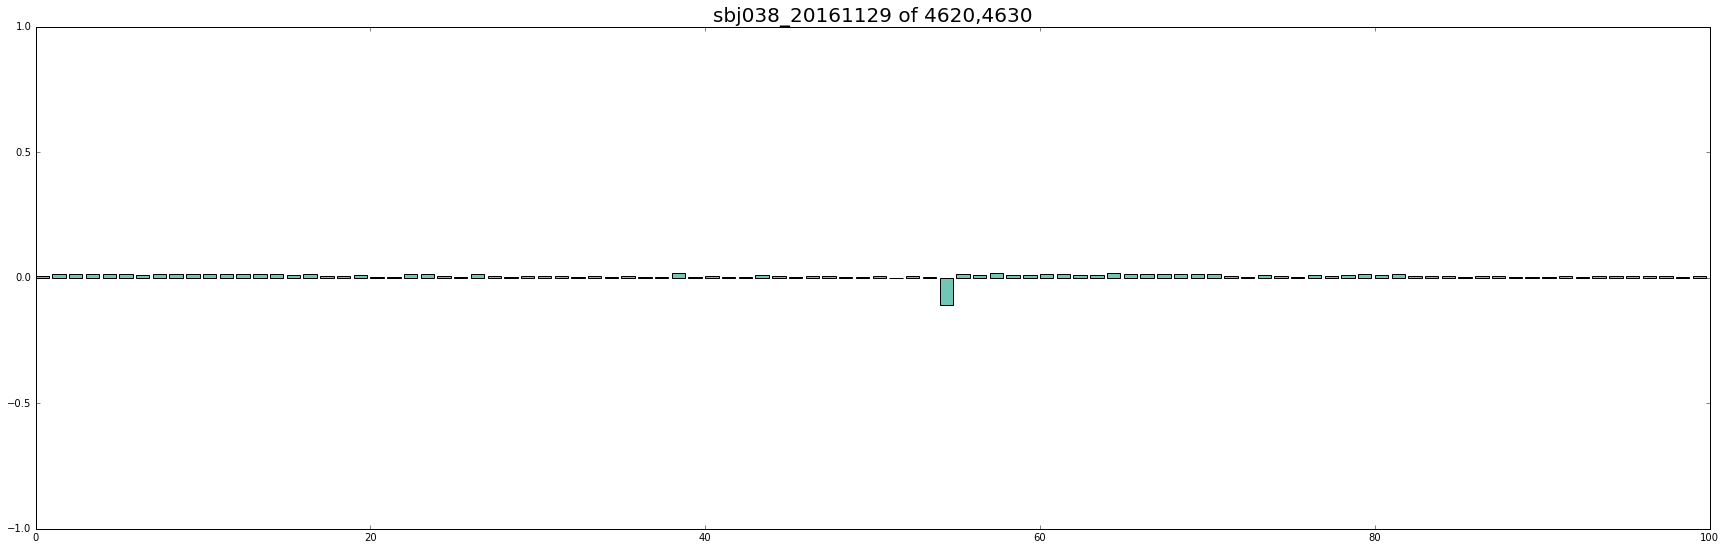

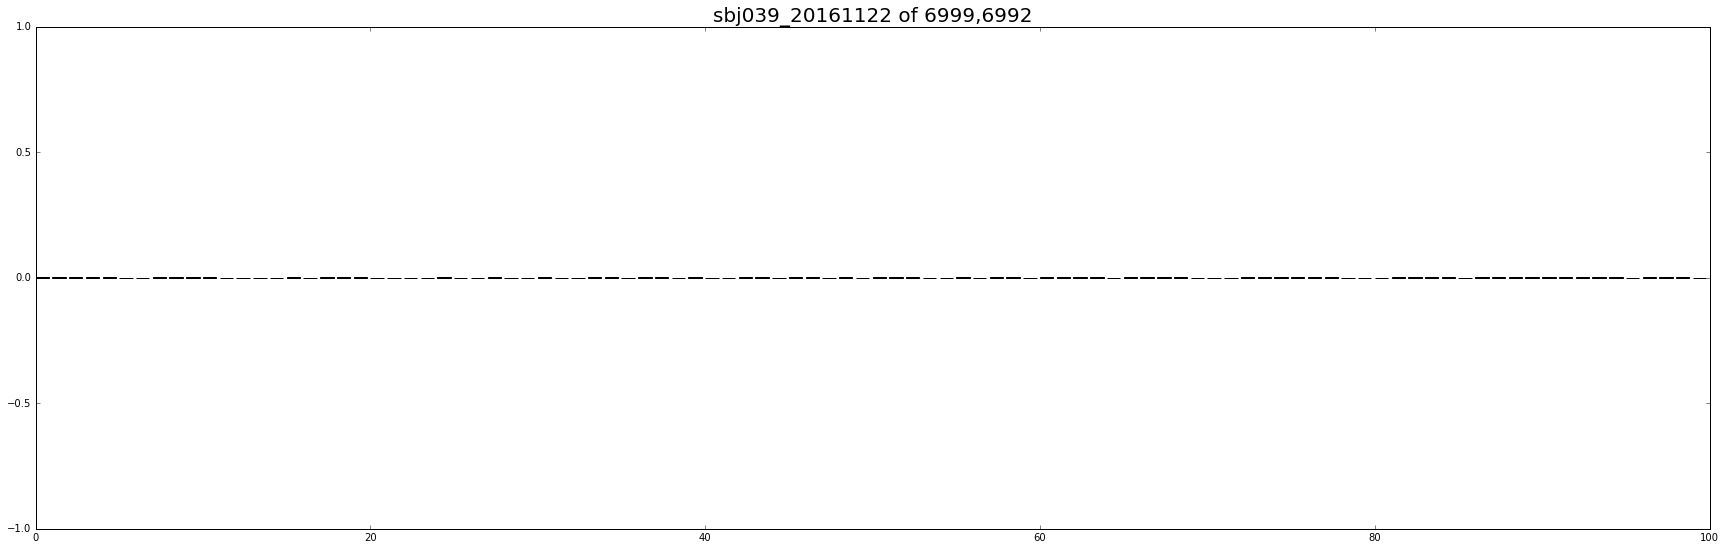

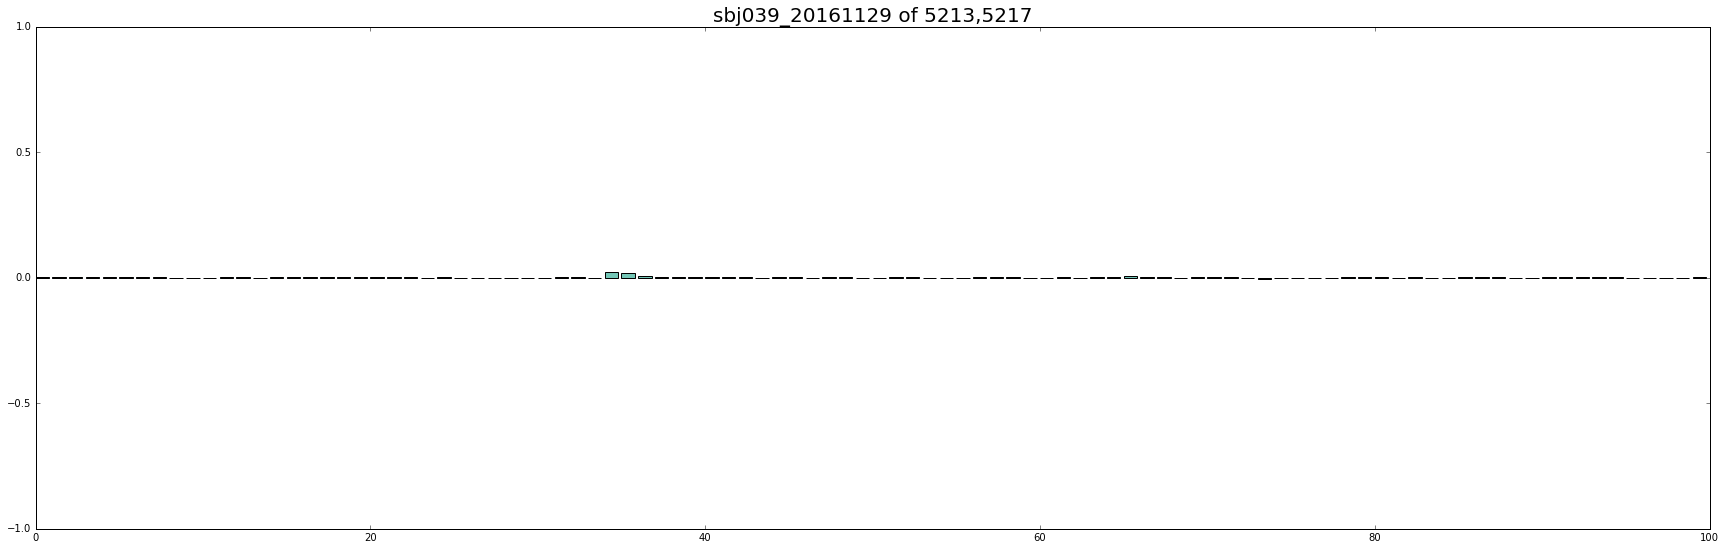

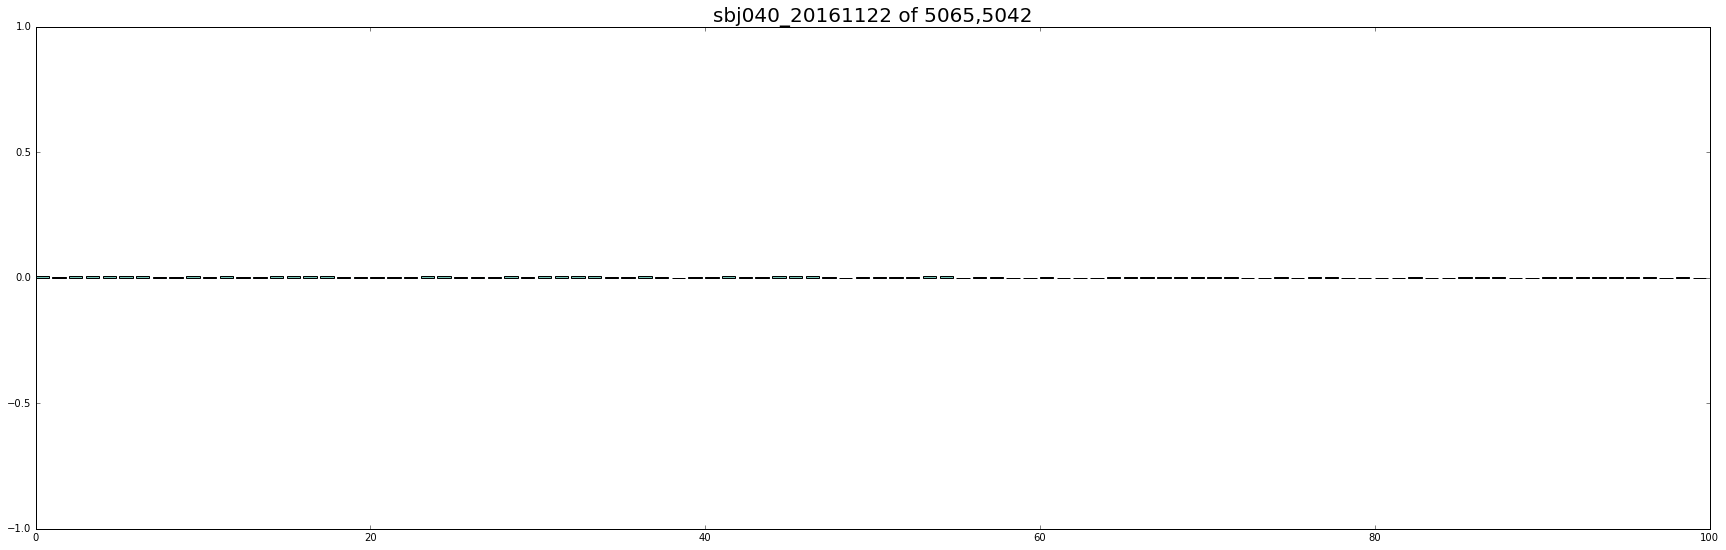

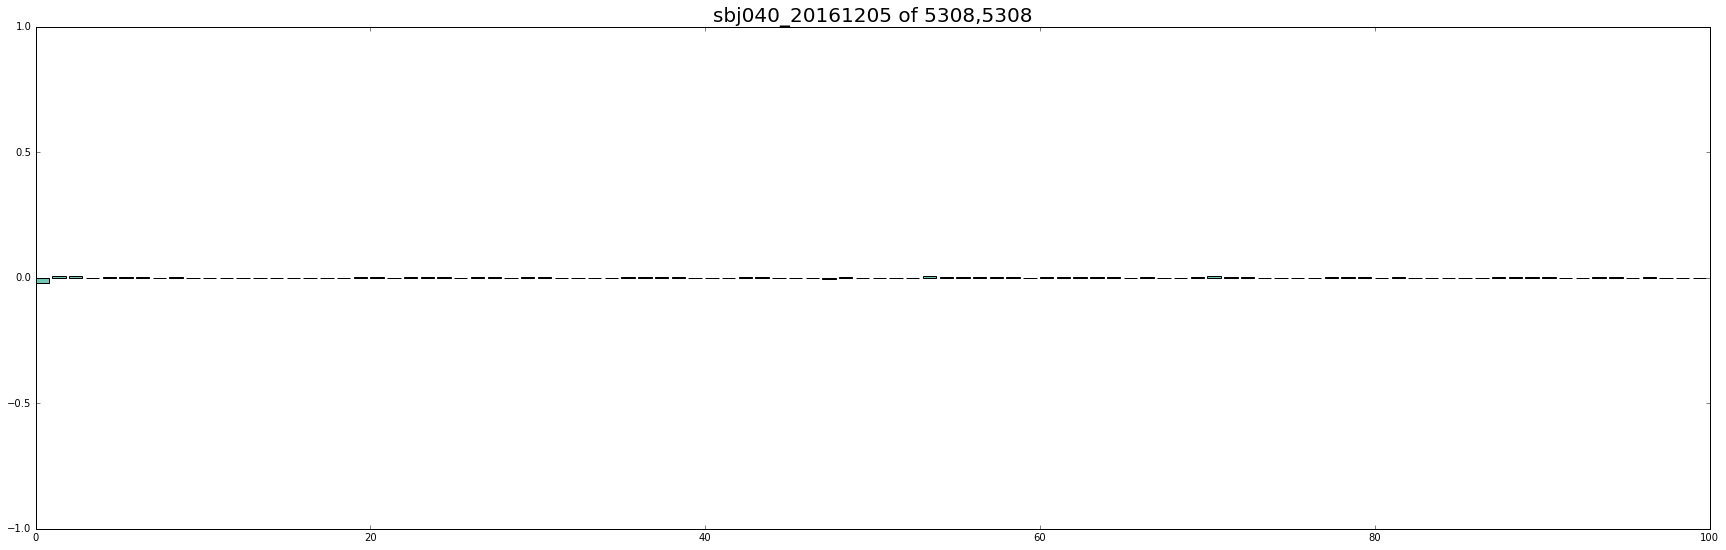

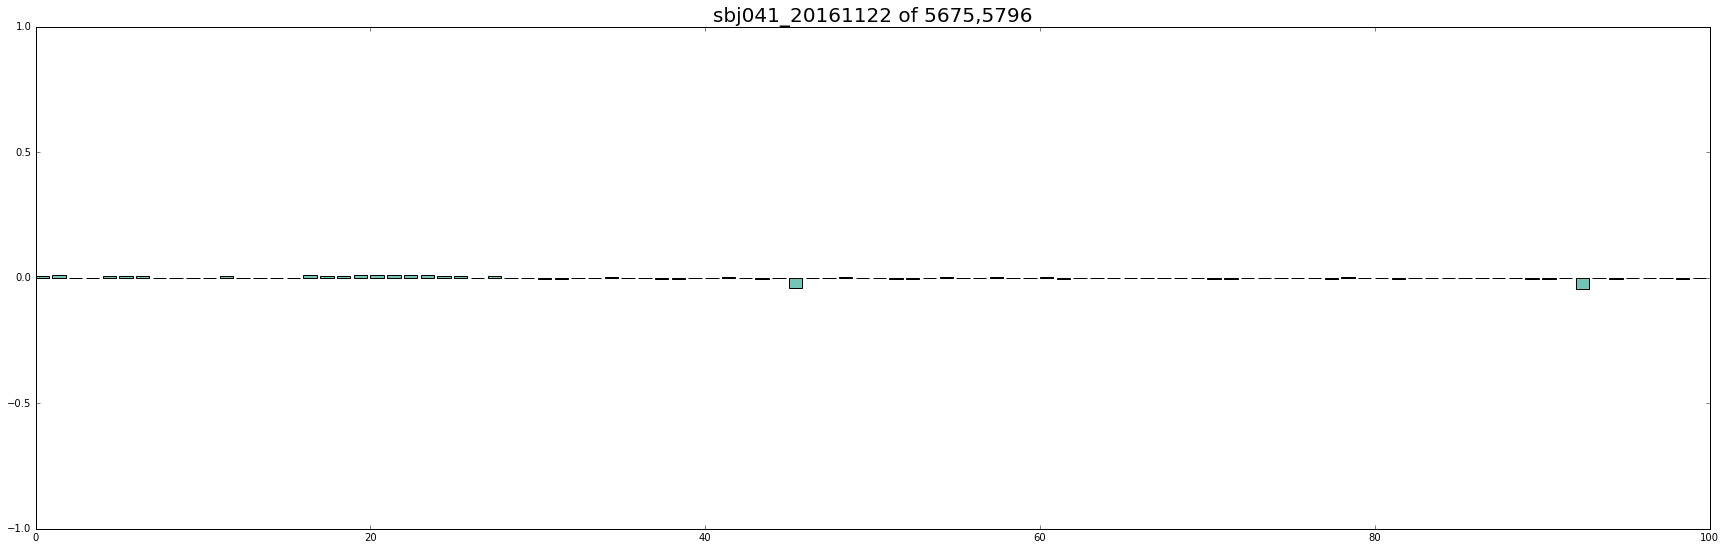

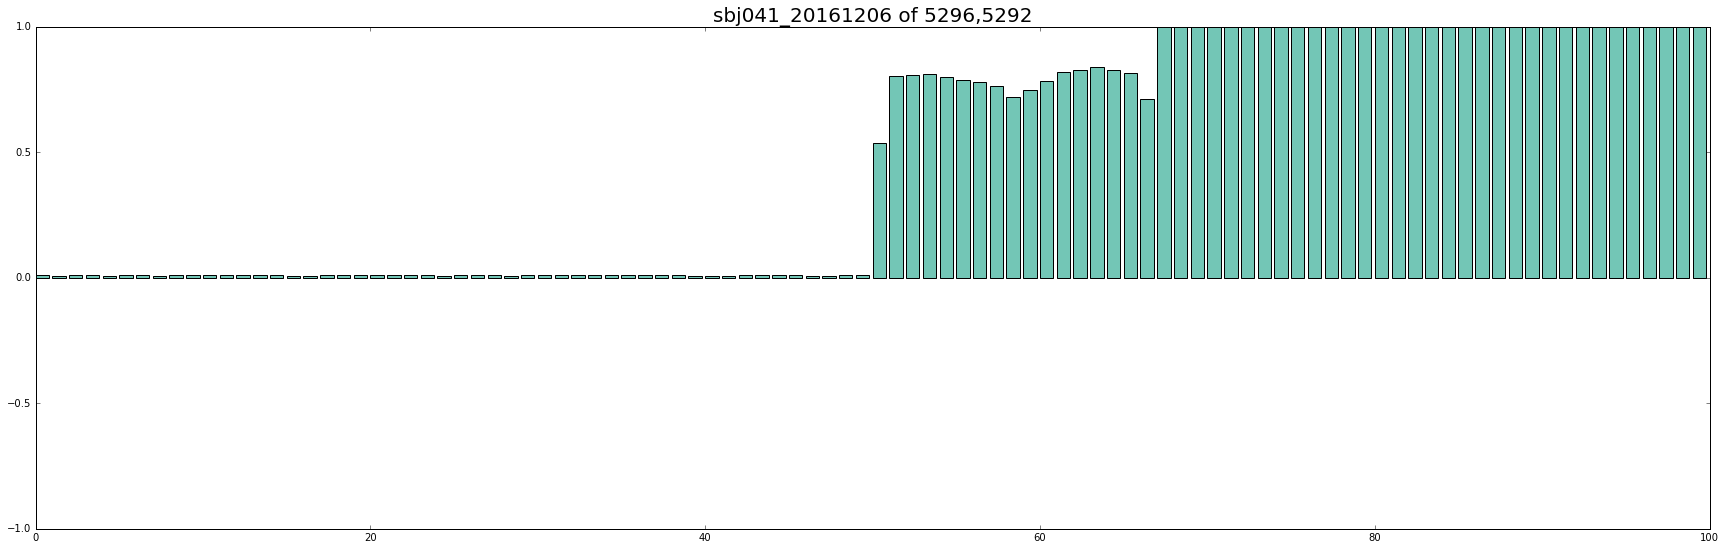

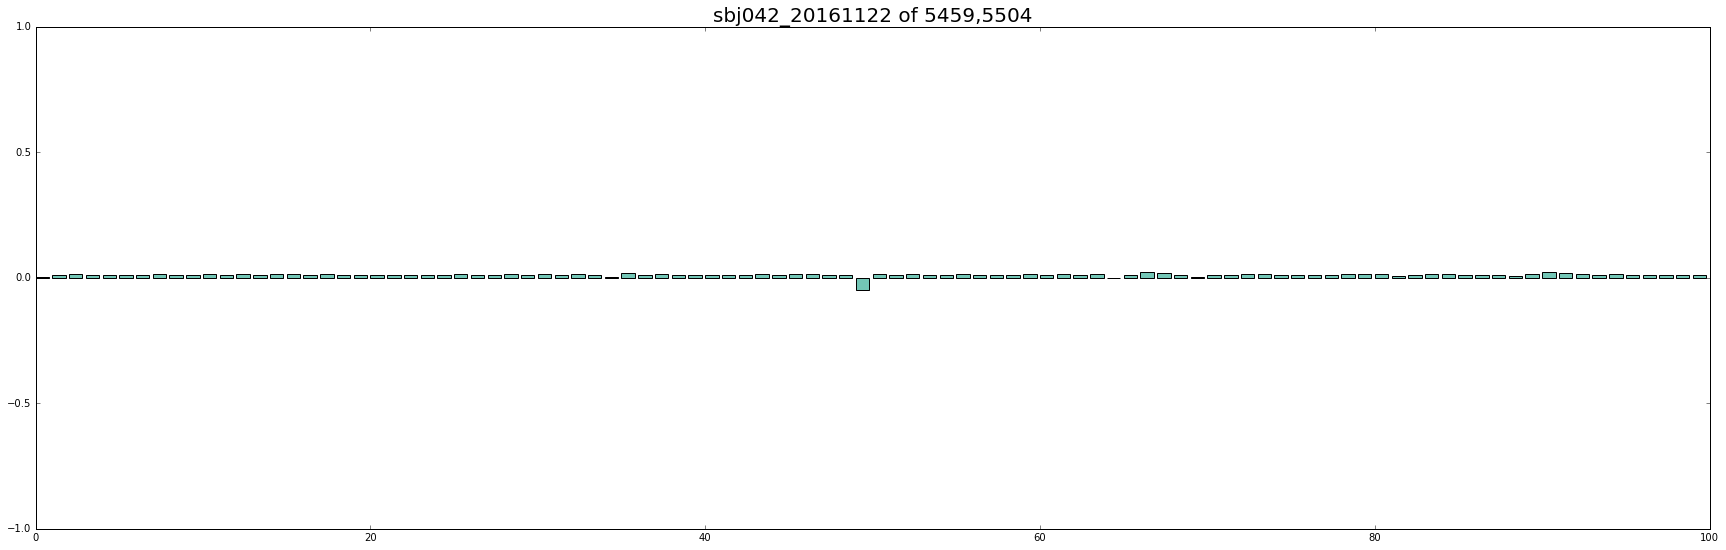

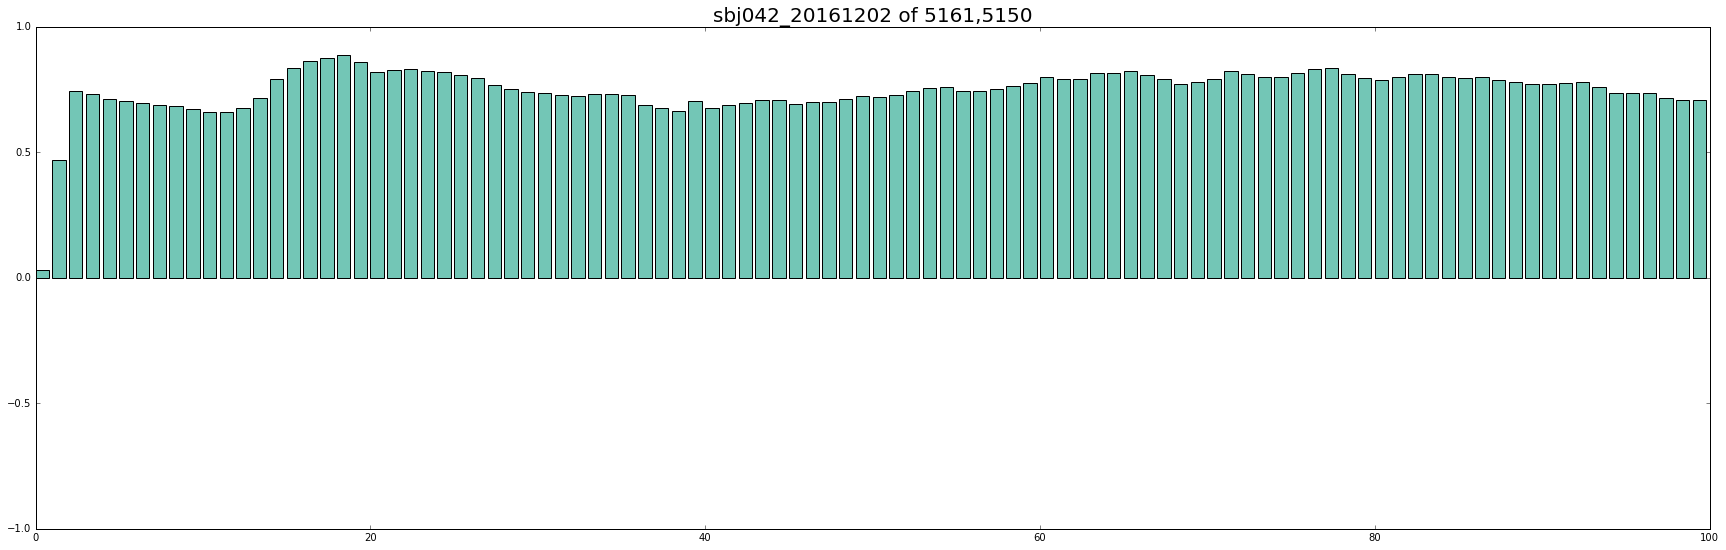

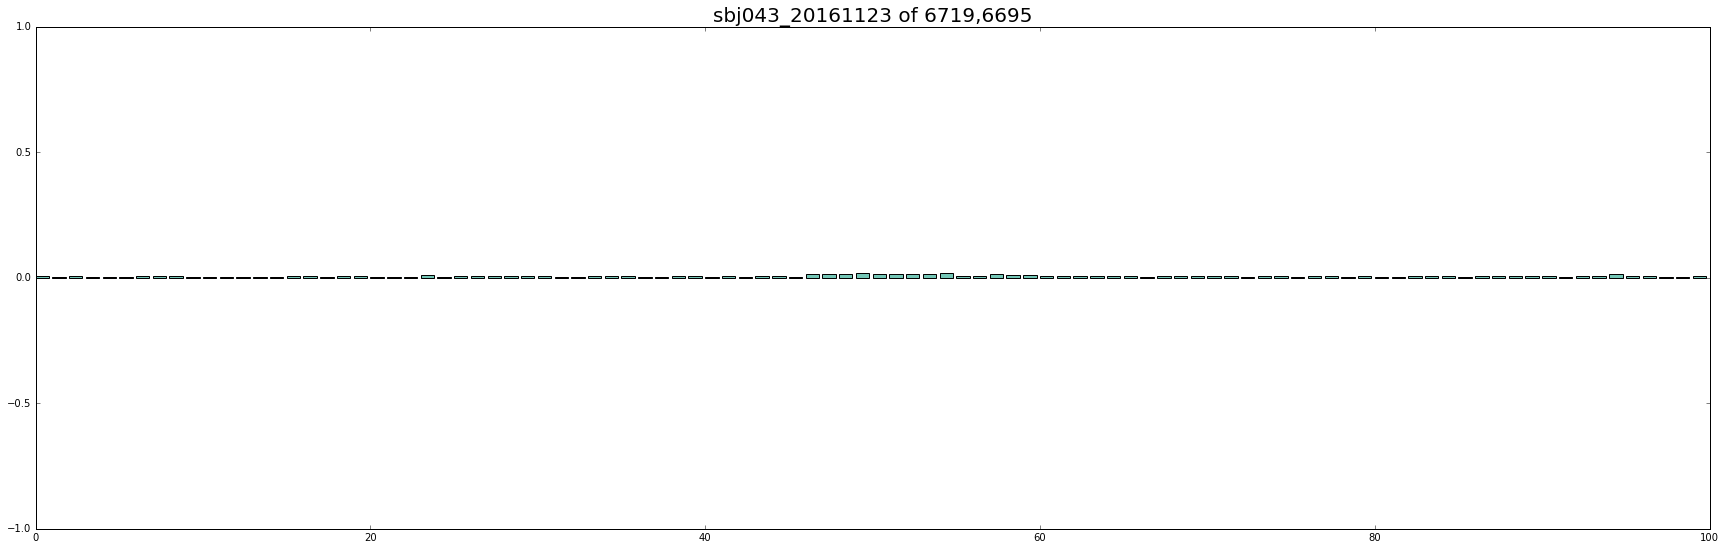

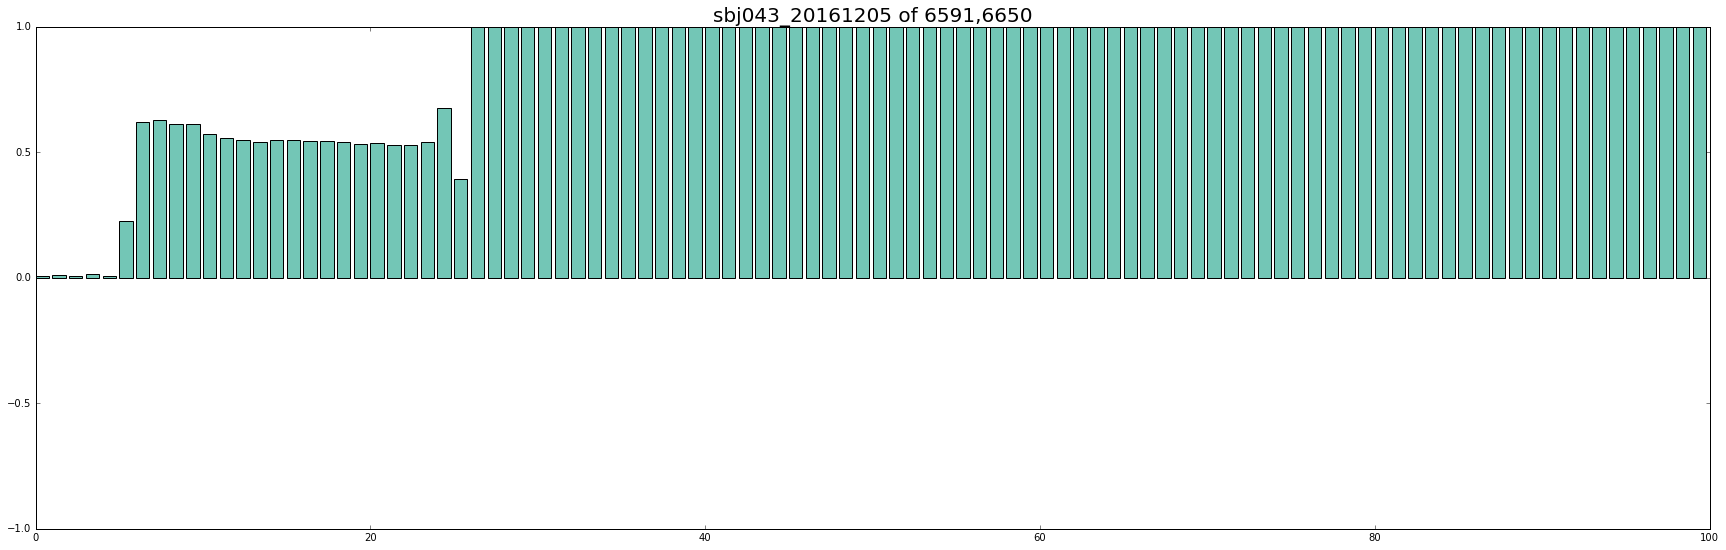

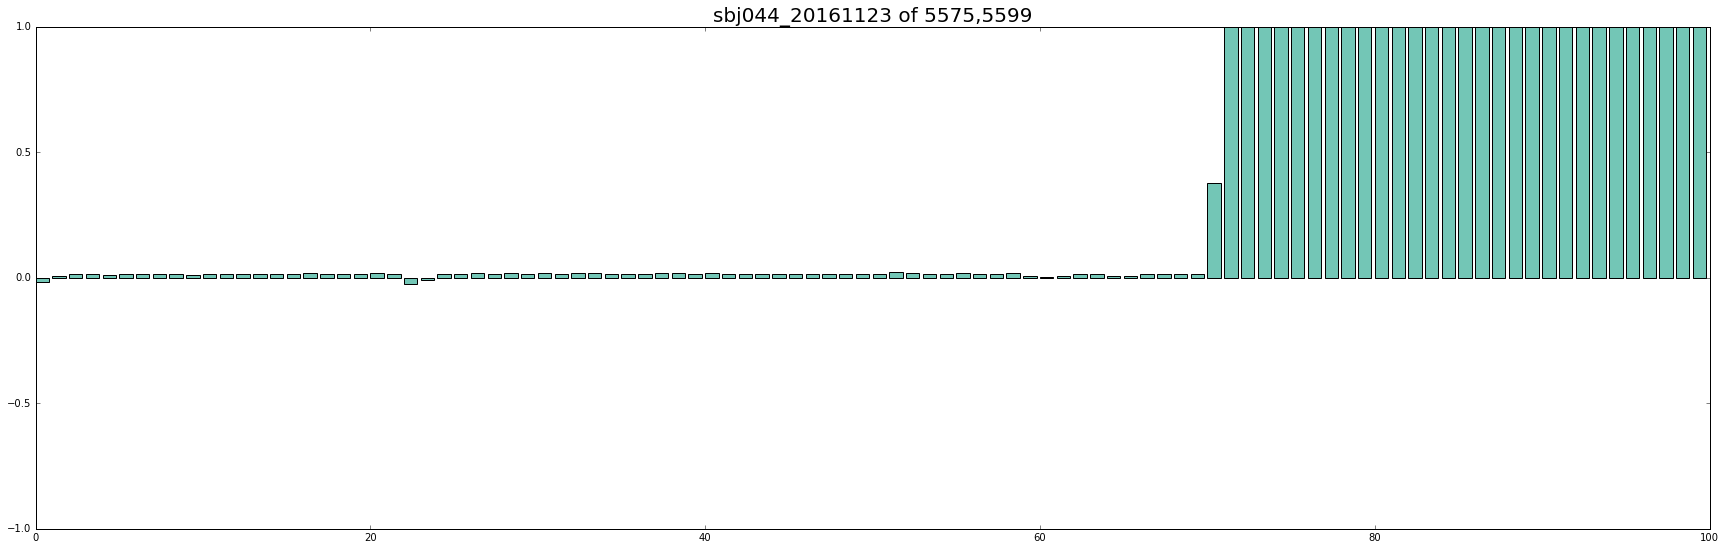

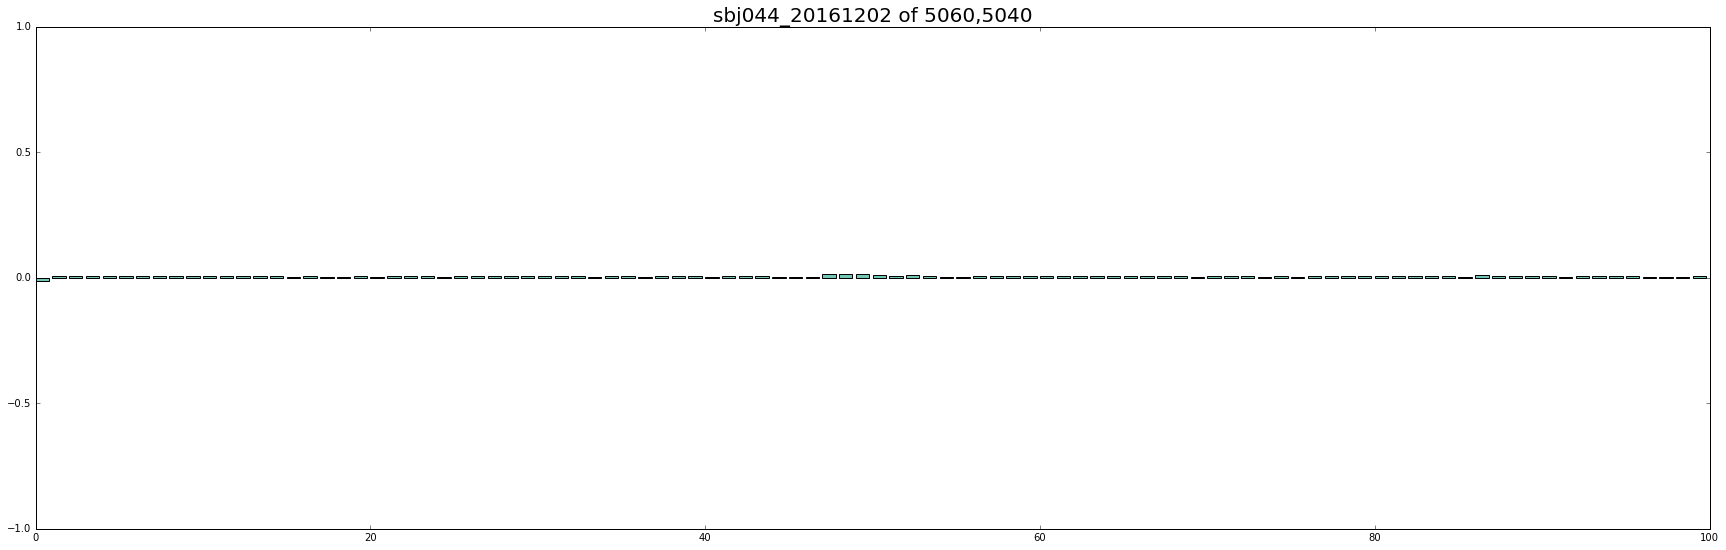

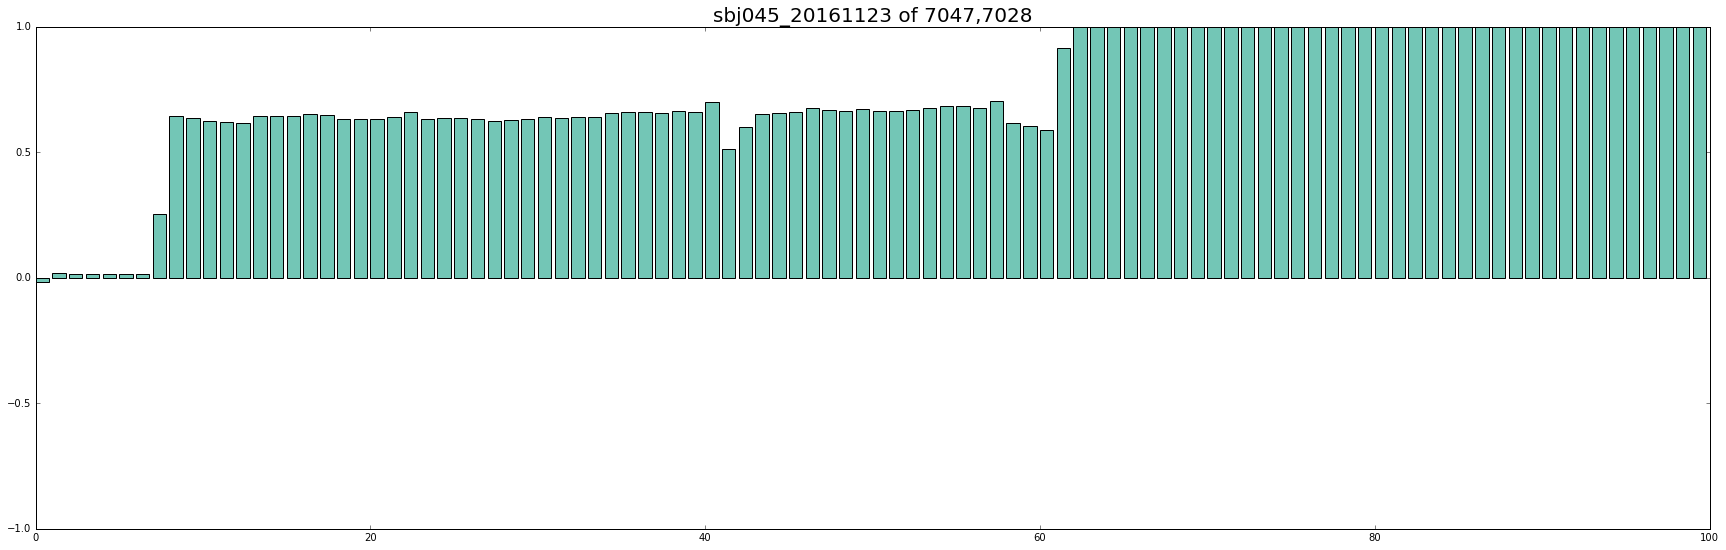

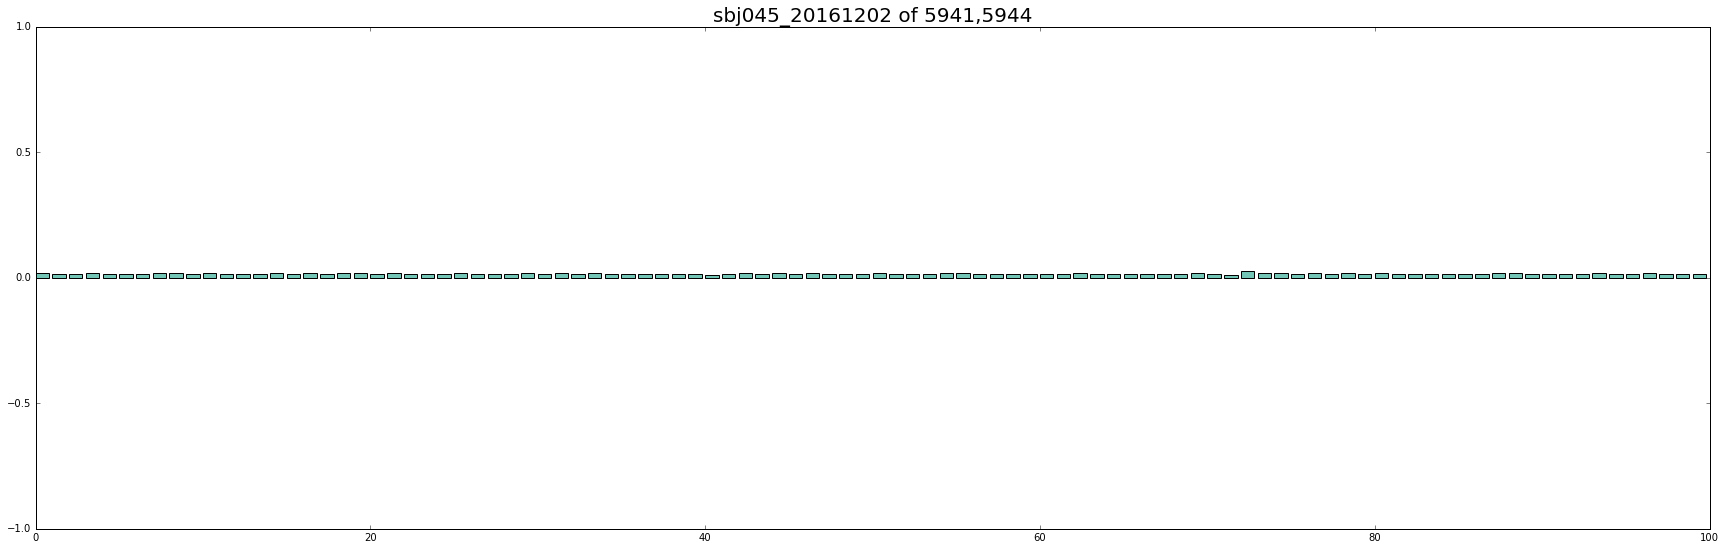

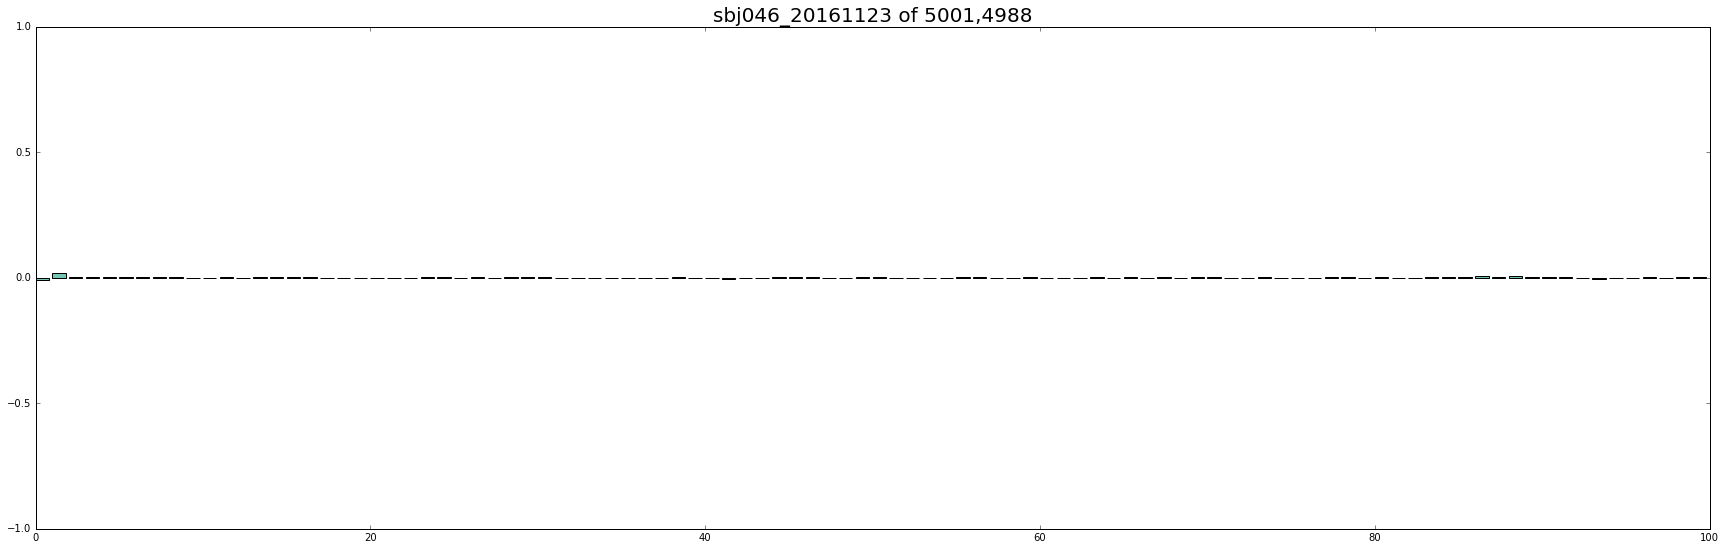

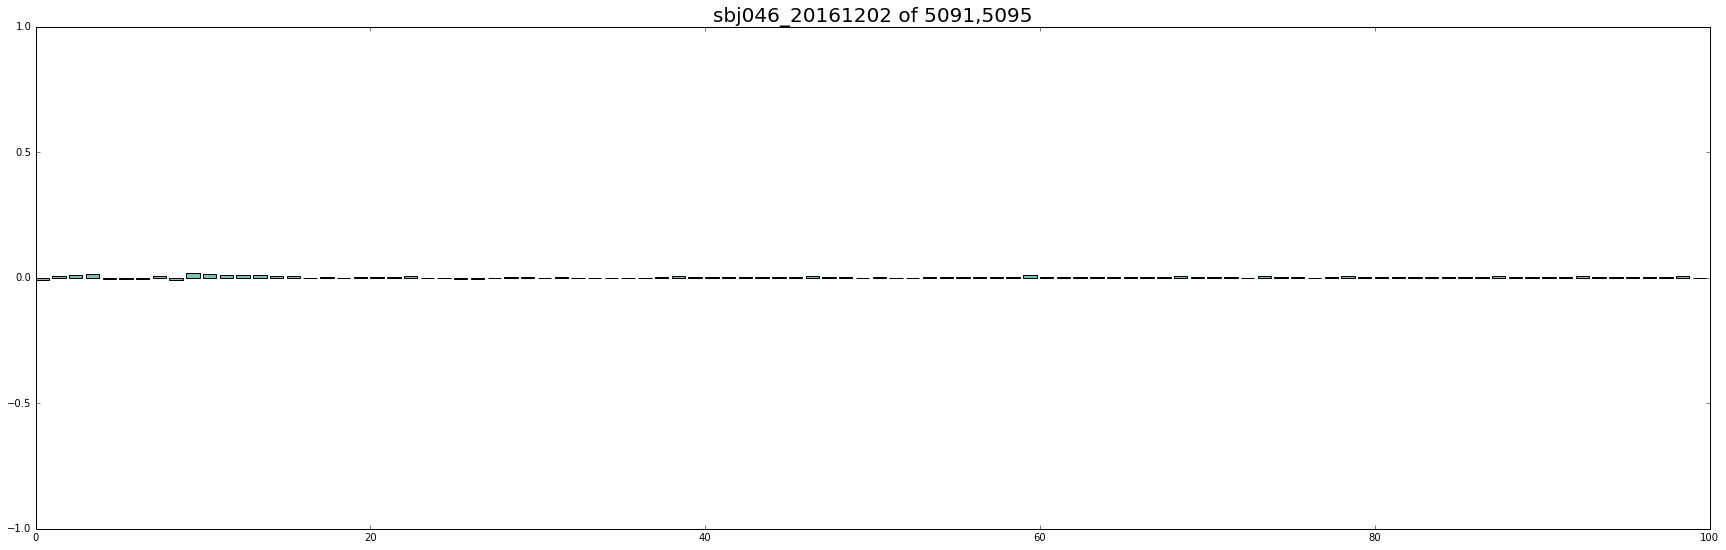

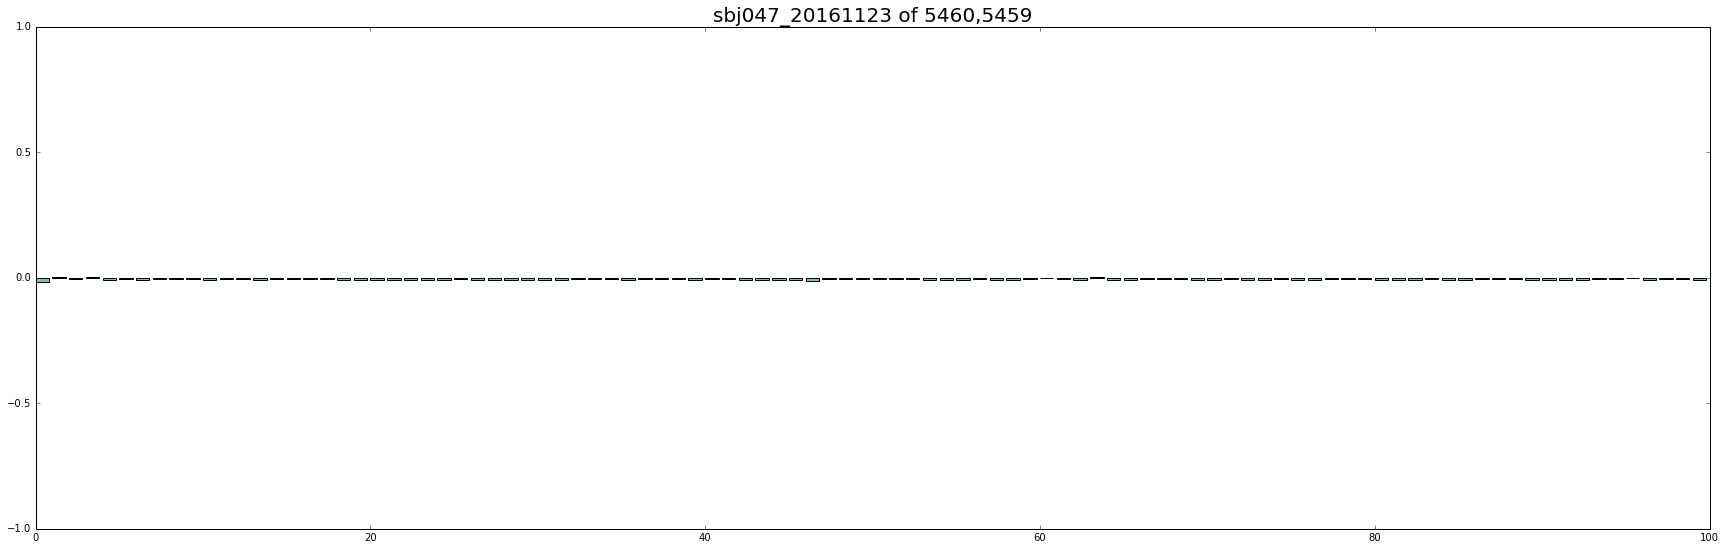

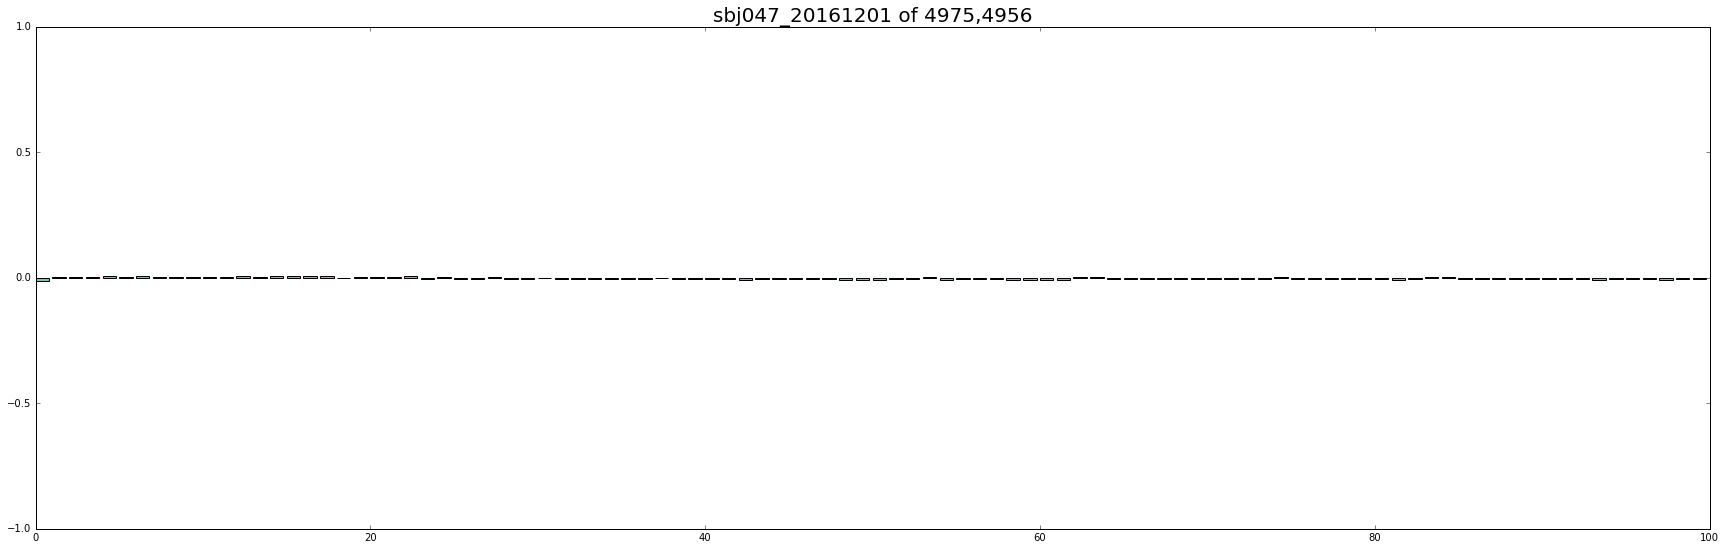

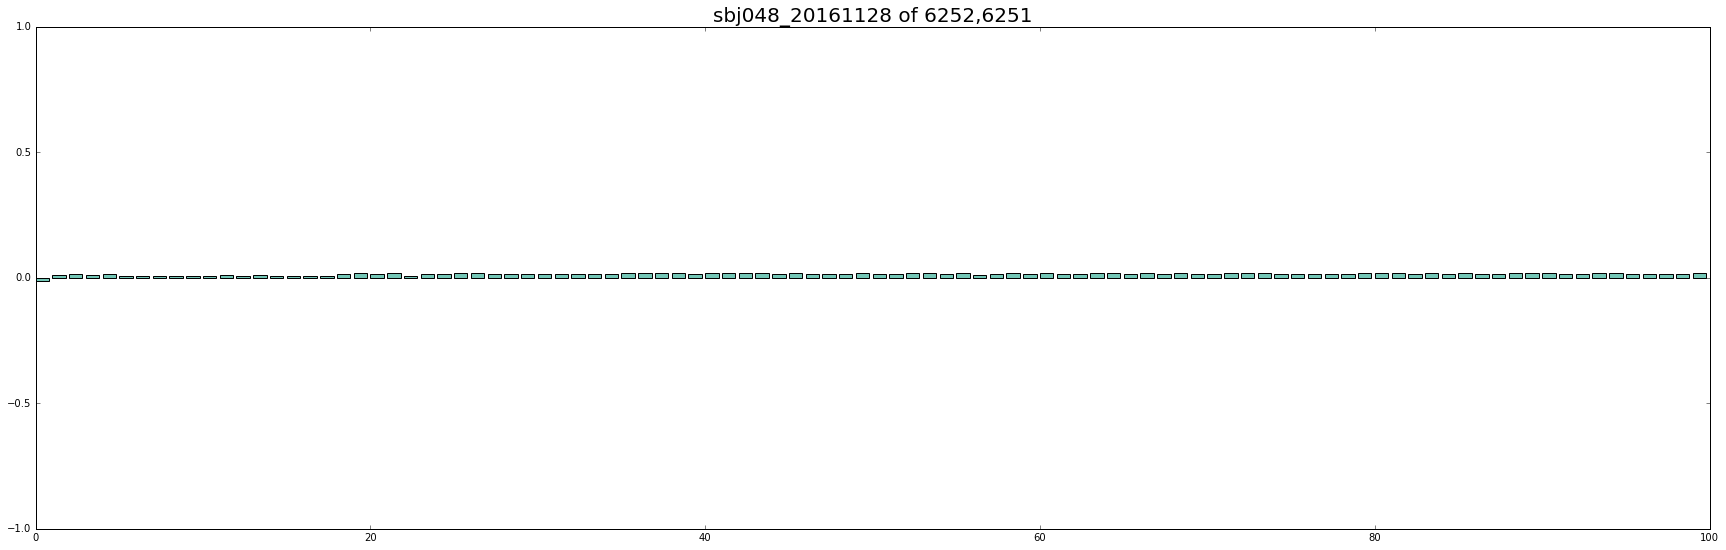

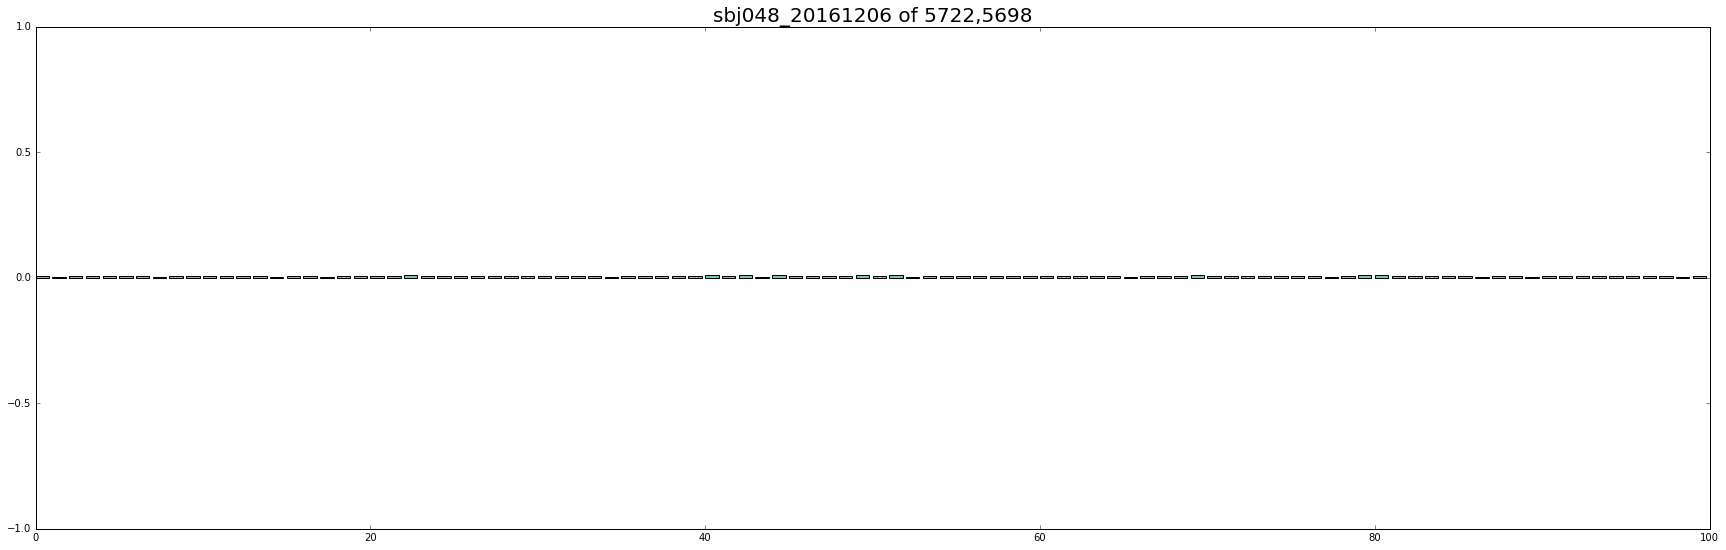

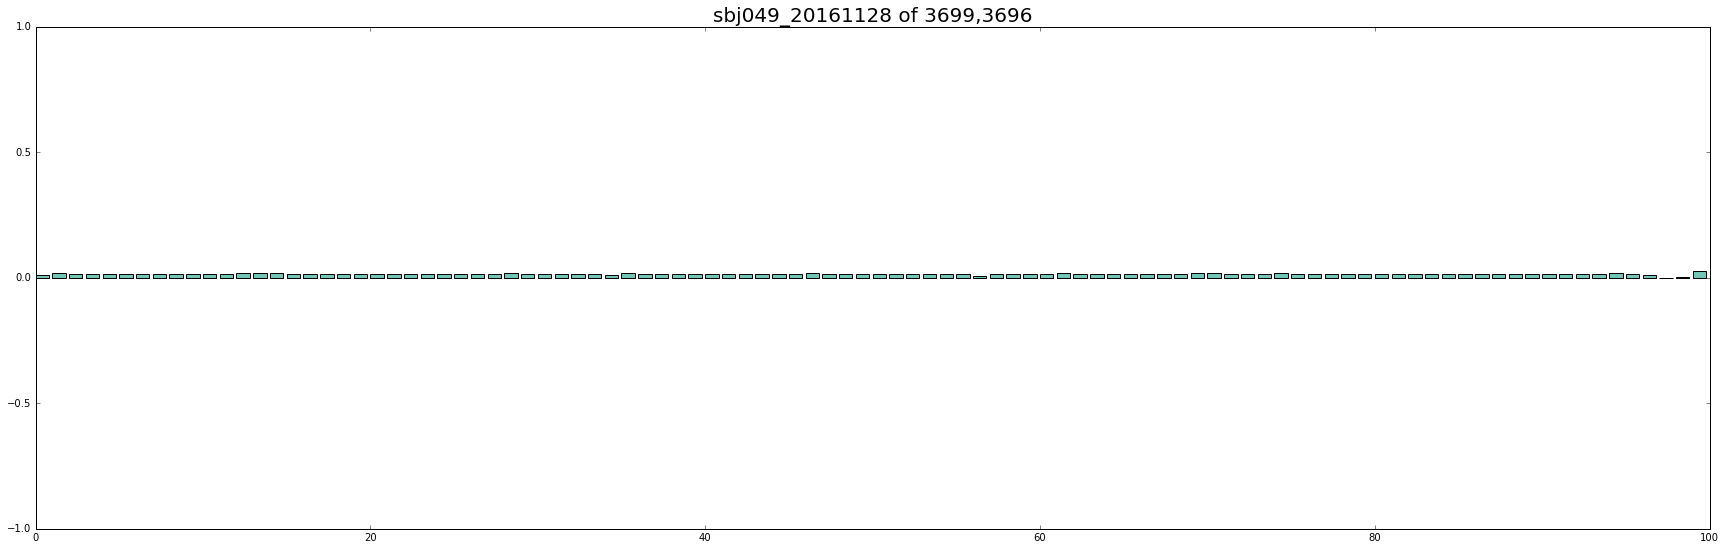

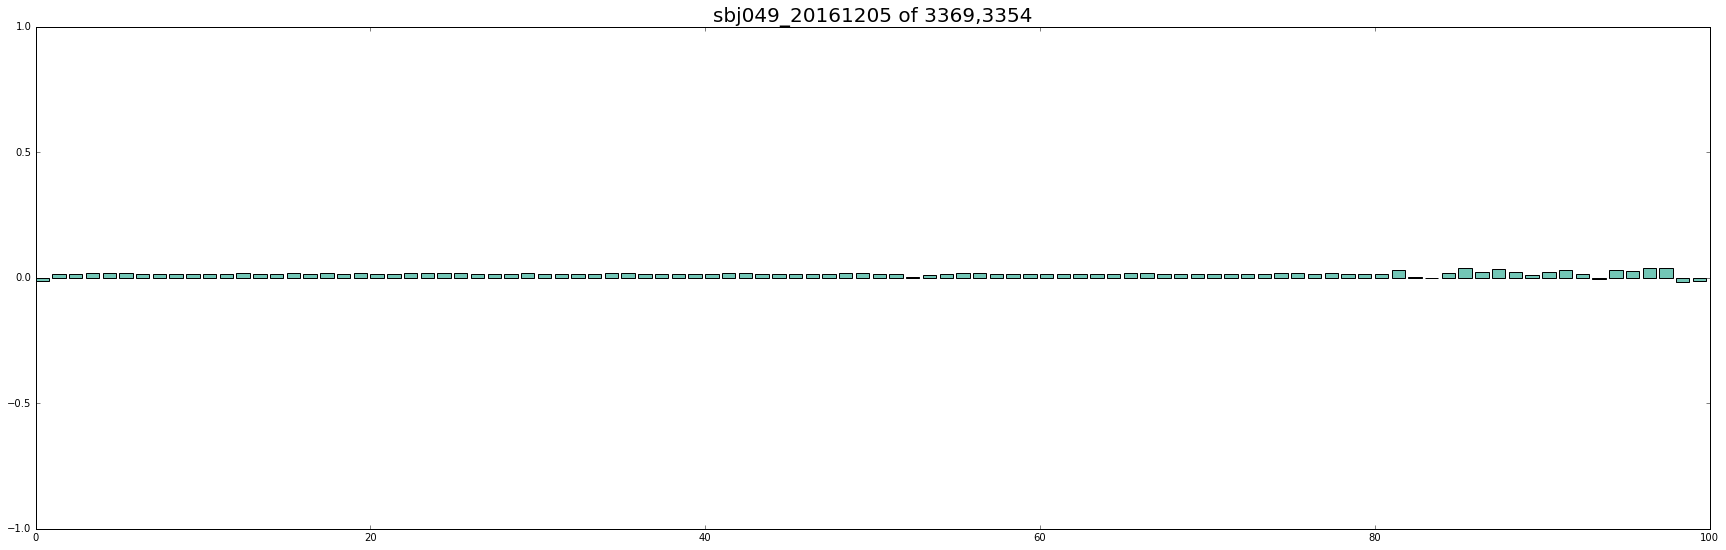

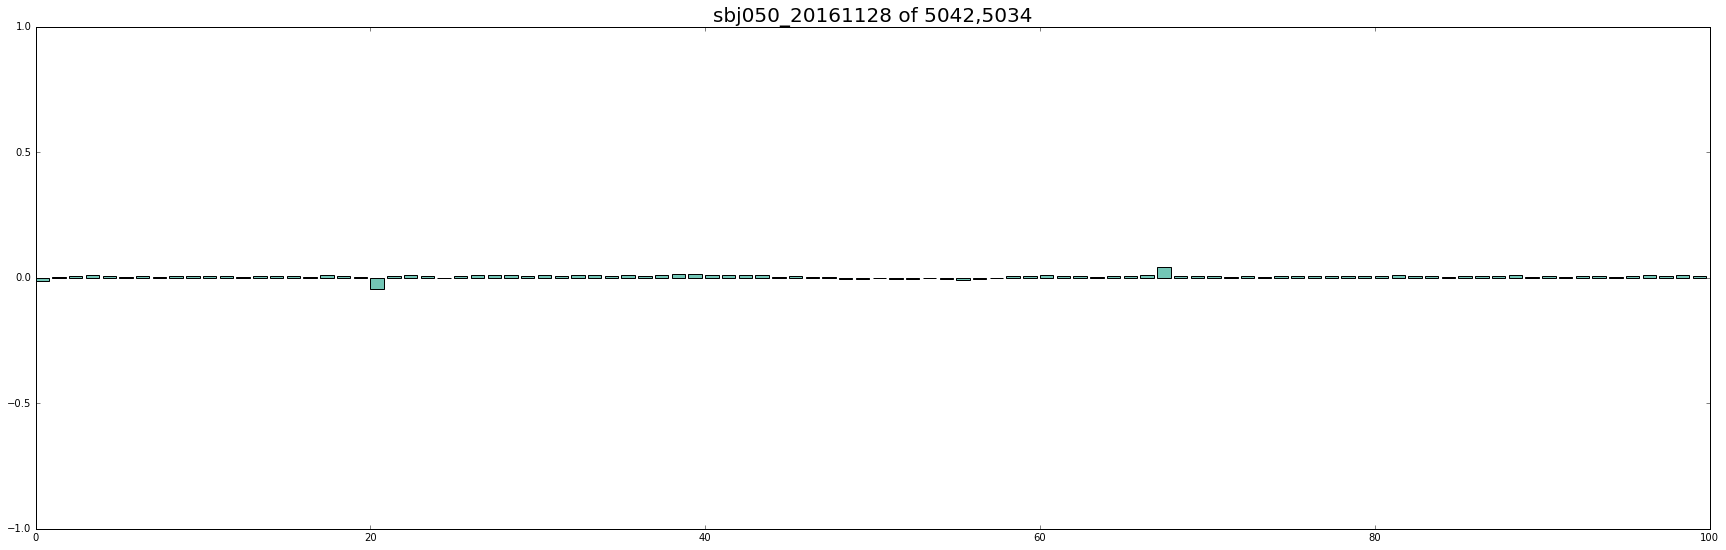

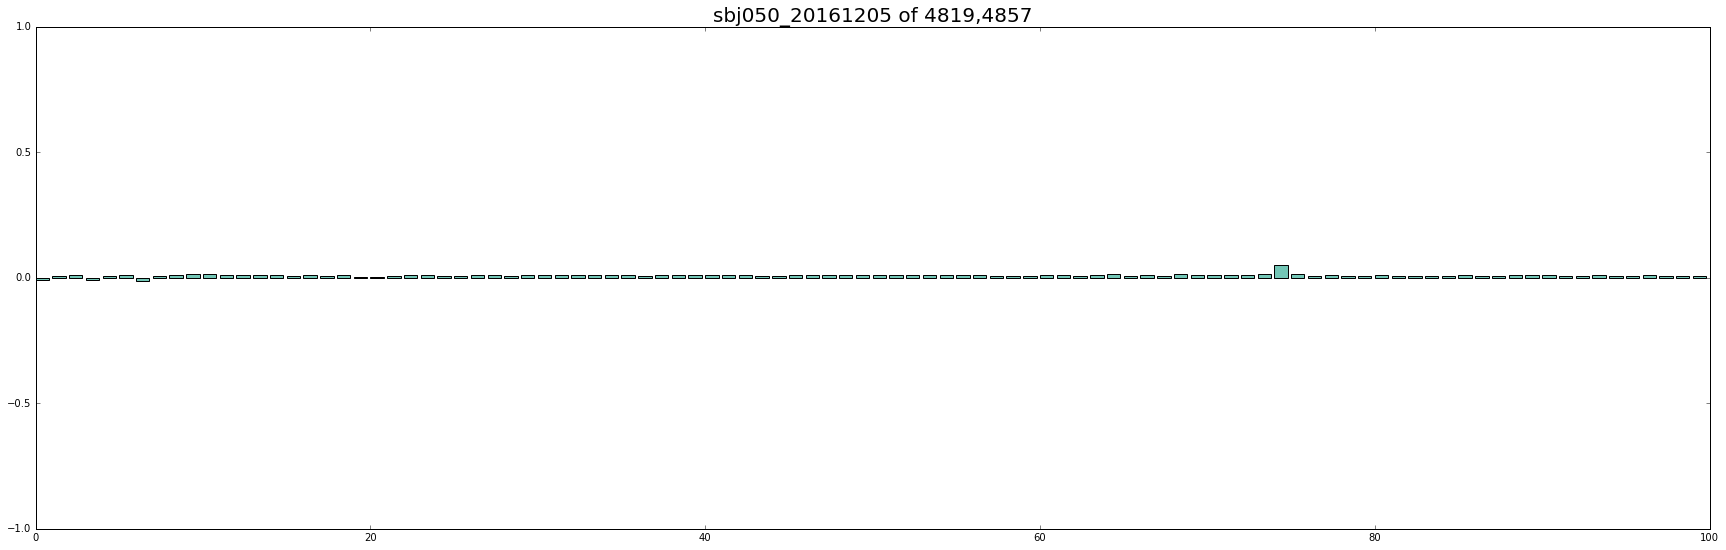

In [220]:
for sub_date in sd:
    n = 100
    showit(sub_date[0], sub_date[1], n)

### Investigating on RPeaks With Signal

In [82]:
sample = pd.read_csv("/Users/user/Downloads/20161129/sbj015 (CON)/20161129_1530_xpr-006-005_sbj015.txt", sep='\t', skiprows=11)

In [83]:
s = "CH13" if "CH13" in sample.columns else "CH9"
signal = sample[s][1:]

In [129]:
sig = signal

In [130]:
sig = sig.reset_index()

In [131]:
sig['s'] = sig['index']/2000.

In [132]:
sig.head()

,index,CH9,s
0,1,0.009766,0.0005
1,2,0.009460,0.0010
2,3,0.009460,0.0015
3,4,0.009460,0.0020
4,5,0.009766,0.0025


<IPython.core.display.Javascript object>


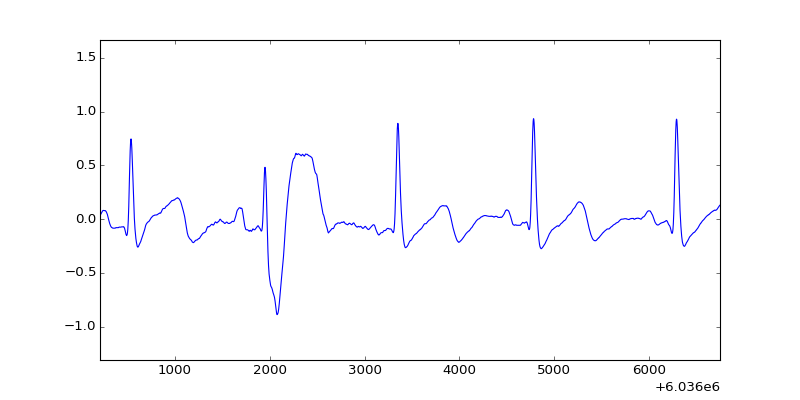

In [88]:
plt.figure(figsize=(10, 5))
#plt.xlabel(sig.s[:10000])
plt.plot(sig.CH9)

In [133]:
min(sig.s[:10000]), max(sig.s[:10000])

(0.00050000000000000001, 5.0)

In [134]:
sbjnum = "sbj015"
date = "20161129"
n = 200

In [138]:
r=rpds[(rpds["sbjnum"]==sbjnum) & (rpds["date"]==date)].values[0][5]*2000
a=acqs[(acqs["sbjnum"]==sbjnum) & (acqs["date"]==date)].values[0][5]*2000

In [139]:
r

array([   17253.,    18823.,    20323., ...,  8178832.,  8180569.,
        8182296.])

In [140]:
#df[df['A'].isin([3, 6])]
rs_ = sig[sig['index'].isin(r)]["CH9"]
as_ = sig[sig['index'].isin(a)]["CH9"]


In [145]:
r

array([   17253.,    18823.,    20323., ...,  8178832.,  8180569.,
        8182296.])

In [142]:
len(rs_.values)

4485

/Users/user/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


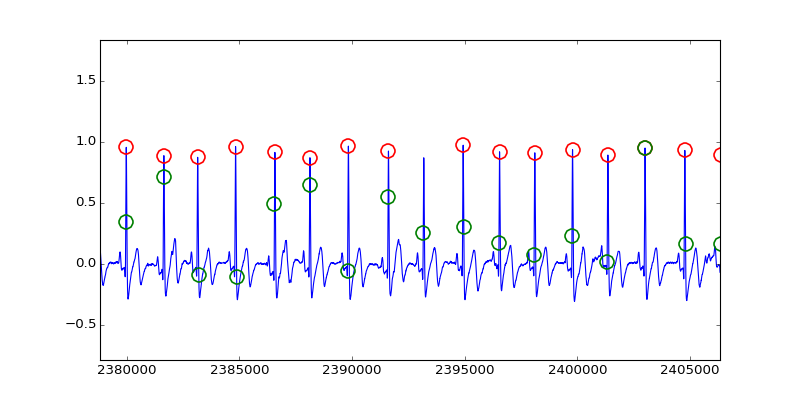

In [153]:
plt.figure(figsize=(10,5))
#plt.xlabel(sig.s[:10000])
#plt.plot(rp)

#plt.plot(r, rs_,'ro', a, as_, 'go', sig.s, sig.CH9)


#for i in r:
#    plt.axvline(i, lw=0.5, color='r')
#for i in a:
#    plt.axvline(i, lw=0.5, color='g')

plt.plot(sig.index, sig.CH9, color='b')

plt.plot(r, sig.CH9[r], marker='o', ms=12, mec='r', mew=1.5, mfc='none', lw=0)
plt.plot(a, sig.CH9[a], marker='o', ms=12, mec='g', mew=1.5, mfc='none', lw=0)